% --- Directed-Search HH–HH Housing with Quality (CT): HJB–KFE & Algorithm (brief) ---

\section*{Primitives \& States}
\begin{itemize}
\item Continuous time; discount $r>0$.
\item Type $\delta\in[\underline\delta,\overline\delta]$ with cdf $G$, pdf $g$ (positive support); resets at rate $\gamma$ to fresh draw from $G$.
\item Ownership $o\in\{0,1\}$; if owner, house quality $q\ge 0$ evolves with maintenance.
\item Meetings at rate $\rho$. Market is segmented by quality $q$: owners post at their $q$, buyers choose which $q$-segment to target.
\item Flow utility is risk-neutral: $u(C)=C$. Flow service if owner: $\delta\,\varphi(q)$ (baseline $\varphi(q)=q$).
\item Maintenance law (owner): $dq_t=a_t\,dt-\delta_q q_t\,dt$, $a_t\ge 0$ with convex cost $c(a_t,q_t)$. Define the convex conjugate $c^*(p,q)=\sup_{a\ge 0}\{pa-c(a,q)\}$ and $a^*$ s.t.\ $c_a(a^*,q)=p$.
\item Directed search cost for buyers (per targeted segment): $\psi(q)\ge 0$ (e.g., small convex penalty).
\item Wealth separation: $V(a,o,\delta,q)=a+v_o(\delta,q)$; define reservation value $\Delta V(\delta,q)=v_1(\delta,q)-v_0(\delta)$.
\end{itemize}

\section*{Price \& Trade in Segment $q$}
Trade in a match $(\delta_b,\delta_s,q)$ iff $\Delta V(\delta_b,q)>\Delta V(\delta_s,q)$.
Equal-split price:
\[
P(\delta_b,\delta_s,q)=\tfrac12\big[\Delta V(\delta_b,q)+\Delta V(\delta_s,q)\big].
\]

\section*{HJBs (directed search across quality)}
\paragraph{Owner $(\delta,q)$.}
\begin{align}
(r+\gamma)\,v_1(\delta,q)
&= \max_{a\ge 0}\Big\{\delta\,\varphi(q)-c(a,q)+v_{1,q}(\delta,q)\,(a-\delta_q q)\Big\} \nonumber\\
&\quad + \gamma\!\int v_1(\tilde\delta,q)\,g(\tilde\delta)\,d\tilde\delta \nonumber\\
&\quad + \rho\!\int_{x>\delta}\!\big[P(x,\delta,q)+v_0(\delta)-v_1(\delta,q)\big]\;h_0^{q}(x)\,dx. \nonumber
\end{align}

\paragraph{Non-owner (type $\delta$; chooses a segment $q$).}
\begin{align}
(r+\gamma)\,v_0(\delta)
&= \gamma\!\int v_0(\tilde\delta)\,g(\tilde\delta)\,d\tilde\delta \nonumber\\
&\quad + \rho\ \sup_{q\ge 0}\ \Bigg\{\int_{y<\delta}\!\big[v_1(\delta,q)-v_0(\delta)-P(\delta,y,q)\big]\;h_1(y,q)\,dy\ -\ \psi(q)\Bigg\}. \nonumber
\end{align}

\paragraph{Reservation-value form (with $c^*$ and drift $b$).}
With $v_{1,q}=\Delta V_q$, $a^*(\delta,q)$ solving $c_a(a^*,q)=\Delta V_q(\delta,q)$, and
$b(\delta,q)=a^*(\delta,q)-\delta_q q$,
\begin{align}
(r+\gamma)\,\Delta V(\delta,q)
&= \delta\,\varphi(q)\;+\;c^*\!\big(\Delta V_q(\delta,q),q\big)\;-\;\Delta V_q(\delta,q)\,\delta_q q \nonumber\\
&\quad + \gamma\!\int \Delta V(\tilde\delta,q)\,g(\tilde\delta)\,d\tilde\delta \nonumber\\
&\quad + \frac{\rho}{2}\!\left[\int_{x>\delta}\!(\Delta V(x,q)-\Delta V(\delta,q))\,h_0^{q}(x)\,dx
-\!\int_{y<\delta}\!(\Delta V(\delta,q)-\Delta V(y,q))\,h_1(y,q)\,dy\right]. \label{eq:HJB-Delta}
\end{align}

\section*{Generator \& Adjoint (KFEs)}
Define, for any $f$,
\begin{align}
(\mathcal A f)(\delta,q)
&= b(\delta,q)\,f_q(\delta,q)\ +\ \gamma\!\left(\int f(\tilde\delta,q)\,g(\tilde\delta)\,d\tilde\delta - f(\delta,q)\right) \nonumber\\
&\quad + \frac{\rho}{2}\!\left[\int_{x>\delta}\!(f(x,q)-f(\delta,q))\,h_0^q(x)\,dx
-\int_{y<\delta}\!(f(\delta,q)-f(y,q))\,h_1(y,q)\,dy\right]. \nonumber
\end{align}
Then \quad $(rI-\mathcal A)\,\Delta V=\delta\,\varphi(q)+c^*(\Delta V_q,q)$.
The stationary owners’ KFE is $\mathcal A^{\!*}h_1=0$ with no-flux in $q$:
\begin{align}
0
&= -\partial_q\!\big(b(\delta,q)\,h_1(\delta,q)\big)
+ \gamma\Big(S(q)\,g(\delta)-h_1(\delta,q)\Big) \nonumber\\
&\quad + \rho\,h_0^{q}(\delta)\,\underbrace{\int_{y<\delta} h_1(y,q)\,dy}_{H_1^{<}(\delta\mid q)}
- \rho\,h_1(\delta,q)\,\underbrace{\int_{x>\delta} h_0^{q}(x)\,dx}_{H_0^{>,q}(\delta)}, \label{eq:KFE-owners}
\end{align}
where $S(q)=\int h_1(\tilde\delta,q)\,d\tilde\delta$, $\iint h_1=s$, and $h_0(\delta)=g(\delta)-\int h_1(\delta,q)\,dq\ge 0$.
Segment buyer density $h_0^q(\delta)$ is induced by buyers’ directed-search policy and satisfies
$\int h_0^q(\delta)\,d\delta=B(q)$, $\int B(q)\,dq=1-s$.

\section*{Discretization (grids \& operators)}
Grids $\{\delta_i\}_{i=1}^{N_\delta}$ with trapezoid $w^\delta_i$ and pdf $g_i$ ($\sum_i g_i w^\delta_i=1$),
and $\{q_k\}_{k=1}^{N_q}$ with $w^q_k$.
Unknown arrays: $\Delta V_{i,k}$, $h_{1,i,k}$.
Derived: $h_{0,i}=g_i-\sum_k h_{1,i,k}w^q_k$ and segment buyers $h^{(k)}_{0,i}=h_0^q(\delta_i)$.

\paragraph{Reset (rank-one per $q$-slice).}
$(\Pi_G f)_{i,k}=\left(\sum_j g_j w^\delta_j f_{j,k}\right)$; \quad $\mathcal R=\gamma(\Pi_G-I)$.

\paragraph{Meetings in $\delta$ (per $q_k$).}
For any $f_{\cdot,k}$,
\[
\big(T^{(k)} f\big)_i=\sum_{j>i}(f_{j,k}-f_{i,k})\,h^{(k)}_{0,j}\,w^\delta_j
-\sum_{j<i}(f_{j,k}-f_{i,k})\,h^{(k)}_{1,j}\,w^\delta_j.
\]

\paragraph{Quality drift (HJB upwind; KFE conservative).}
Let $b_{i,k}=a^*_{i,k}-\delta_q q_k$.
HJB: $(B f)_{i,k}=b_{i,k}\,D_q^{\text{up}} f_{i,k}$ (choose backward/forward by $\mathrm{sign}(b_{i,k})$).
KFE adjoint: flux $F_{i,k+\frac12}=(b\,h_1)_{i,k}^{\text{upwind}}$ and
$(-\partial_q(b h_1))_{i,k}=(F_{i,k-\frac12}-F_{i,k+\frac12})/\Delta q_k$ with no-flux boundaries.

\paragraph{Generator (block-sparse).}
\[
A(h_1,h_0,b)=B\ +\ \gamma(\Pi_G-I)\ +\ \tfrac{\rho}{2}\,\mathrm{blkdiag}\!\big(T^{(1)},\dots,T^{(N_q)}\big).
\]
Right-hand side of \eqref{eq:HJB-Delta} (pointwise): 
\[
R(\Delta V)=\delta\otimes \varphi(q)\;+\;c^*(\Delta V_q,q)\;-\;(\Delta V_q)\,(\delta_q\,q).
\]

\section*{Implicit (backward) updates}
\paragraph{HJB (policy iteration in $a$; unconditionally stable).}
Given $(h_1,h_0^{(\cdot)})$ and current $\Delta V^n$:
\begin{align}
&\text{(i) } \Delta V_q^n \ \ \text{(upwind gradients);} \quad 
\text{(ii) } a^*:\ c_a(a^*,q)=\Delta V_q^n,\ \ b=a^*-\delta_q q; \nonumber\\
&\text{(iii) build } A=A(h_1,h_0,b);\qquad
\text{(iv) solve } \Big[(r+\tfrac{1}{\Delta\tau_V})I-A\Big]\Delta V^{n+1}
= R(\Delta V^{n}) + \tfrac{1}{\Delta\tau_V}\,\Delta V^{n}. \nonumber
\end{align}
Iterate (i)–(iv) until $\|\Delta V^{n+1}-\Delta V^{n}\|_\infty<\varepsilon_V$.
For $c(a,q)=\tfrac{\kappa}{2}a^2$ one has $a^*=\max\{0,\Delta V_q/\kappa\}$, $c^*=(\Delta V_q)^2/(2\kappa)$.

\paragraph{Buyer directed-search policy (with cost $\psi$).}
For each $(\delta_i,q_k)$ compute
\[
G_{i,k}=\sum_{j<i}\big[\Delta V_{i,k}-\Delta V_{j,k}\big]\ h_{1,j,k}\ w^\delta_j\ -\ \psi(q_k).
\]
Best response (no smoothing): $q^*(\delta_i)=\arg\max_k G_{i,k}$ and
$h^{(k)}_{0,i}=h_{0,i}$ if $k=q^*(\delta_i)$, else $0$.
(With smoothing, use a softmax over $k$.)

\paragraph{KFE (owners; implicit adjoint step, conservative).}
Given $A$ (from HJB drift and meeting/reset blocks), take a few backward-Euler steps:
\[
(I-\Delta\tau_H\,A^\top)\,\mathrm{vec}(h_1)^{\,m+1} = \mathrm{vec}(h_1)^{\,m}.
\]
Then project and renormalize: $h_1\leftarrow \max\{0,h_1\}$ and scale so $\sum_{i,k} h_{1,i,k}\,w^\delta_i w^q_k=s$;
update $h_{0,i}=g_i-\sum_k h_{1,i,k}w^q_k\ge 0$.
No-flux in $q$ holds via the conservative flux discretization.

\section*{Outer fixed point}
Initialize $h_1^{(0)}=s\,g(\delta)\,\tilde S(q)$, $h_0^{q,(0)}(\delta)$ proportional to $g(\delta)$, and
$\Delta V^{(0)}=\delta\,\varphi(q)/(r+\gamma+\delta_q)$.
Repeat:
\begin{enumerate}\itemsep0pt
\item HJB block: update $(\Delta V,a^*,b)$ by the implicit step to tolerance $\varepsilon_V$.
\item Buyer policy: update $h_0^{q}(\delta)$ via $q^*(\delta)$ (or softmax with $\psi$).
\item KFE block: a few implicit adjoint steps with projection/mass-fix to update $h_1$.
\end{enumerate}
Stop when both value and density changes are below tolerances.
Outputs: $\Delta V(\delta,q)$, $a^*(\delta,q)$, $b(\delta,q)$, $h_1(\delta,q)$, $h_0(\delta)$, price kernel $P(\delta_b,\delta_s,q)$, and trade volume (total and by segment).


In [1]:
# %%
# Core imports
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt


In [32]:
# %%
# Parameters

@dataclass
class Params:
    # Econ
    r: float = 0.05
    gamma: float = 0.20      # type reset rate
    rho: float = 0.50        # meeting rate
    s: float = 0.40          # housing stock share

    # Type (delta) grid
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 201

    beta_a: float = 2.0      # Beta(a,b) for G
    beta_b: float = 5.0

    # Quality (q) grid
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 81

    # Quality dynamics / costs
    delta_q: float = 0.12         # physical depreciation rate for q
    kappa: float = 0.6            # maintenance cost: c(a,q)=0.5*kappa*a^2
    phi_linear: float = 1.0       # ϕ(q)=phi_linear*q

    # Directed-search segment cost: psi(q)=0.5*eta*(q-q_star)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6
    softmax_tau: float = 0.0      # 0 => hard argmax; >0 => softmax temperature

    # Numerics
    dt_hjb: float = 30.0          # implicit step sizes (large = fast)
    dt_kfe: float = 30.0
    max_iter_inner: int = 12      # inner HJB policy iterations
    max_iter_outer: int = 600
    tol_V: float = 1e-8
    tol_h: float = 1e-8

    # Stabilizers (safe defaults)
    b_clip: float = 100.0         # clip for drift magnitude |b|
    p_clip: float = 1e3           # clip for slope p (for alpha in LF)


In [33]:
# %%
# Grid & Beta distribution on [dmin, dmax]

def make_grid(N, dmin=0.0, dmax=1.0):
    """Uniform grid with trapezoidal weights."""
    grid = np.linspace(dmin, dmax, N)
    h = (dmax - dmin) / (N - 1)
    w = np.full(N, h)
    w[0] *= 0.5
    w[-1] *= 0.5
    return grid, w

def beta_pdf_cdf_on_interval(grid, w, a=2.0, b=5.0, dmin=0.0, dmax=1.0):
    """Beta(a,b) on [dmin,dmax]; returns normalized pdf g and numerical cdf G."""
    x = (grid - dmin) / (dmax - dmin)
    x = np.clip(x, 1e-12, 1 - 1e-12)
    from math import gamma as Gamma
    B = Gamma(a) * Gamma(b) / Gamma(a + b)
    pdf_unit = (x**(a - 1) * (1 - x)**(b - 1)) / B
    g = pdf_unit / (dmax - dmin)
    g = g / (g @ w)     # normalize numerically
    G = np.cumsum(g * w)
    return g, G


In [34]:
# %%
def one_sided_slopes_q(DeltaV, qgrid):
    Nδ, Nq = DeltaV.shape
    p_minus = np.zeros_like(DeltaV)
    p_plus  = np.zeros_like(DeltaV)
    dq = np.diff(qgrid)
    # left/backward
    p_minus[:,1:] = (DeltaV[:,1:] - DeltaV[:,:-1]) / dq[None,:]
    p_minus[:,0]  = (DeltaV[:,1] - DeltaV[:,0]) / (qgrid[1]-qgrid[0])
    # right/forward
    p_plus[:,:-1] = (DeltaV[:,1:] - DeltaV[:,:-1]) / dq[None,:]
    p_plus[:,-1]  = (DeltaV[:,-1] - DeltaV[:,-2]) / (qgrid[-1]-qgrid[-2])
    return p_minus, p_plus


def numerical_hamiltonian_LF(DeltaV, qgrid, kappa, delta_q, qvec, p_clip=1e3):
    """
    Local Lax–Friedrichs (Rusanov) numerical Hamiltonian H^LF(p^-,p^+;q)
      H(p,q) = 0.5*(p^2)/kappa - delta_q*q*p
      alpha >= max |H_p| on [p^+,p^-], with H_p = p/kappa - delta_q*q
    Inputs:
      DeltaV: (Nδ,Nq), qgrid: (Nq,), qvec: (Nq,)
    Output:
      Hnum: (Nδ,Nq), and also return p_center and alpha if needed.
    """
    p_minus, p_plus = one_sided_slopes_q(DeltaV, qgrid)

    # clip slopes for stability in early iters
    if p_clip is not None:
        p_minus = np.clip(p_minus, -p_clip, p_clip)
        p_plus  = np.clip(p_plus,  -p_clip, p_clip)

    p_center = 0.5*(p_minus + p_plus)              # (Nδ,Nq)
    # alpha depends on local slope and q
    Hp_minus = (p_minus / max(kappa,1e-14)) - delta_q * qvec[None,:]
    Hp_plus  = (p_plus  / max(kappa,1e-14)) - delta_q * qvec[None,:]
    alpha = np.maximum(np.abs(Hp_minus), np.abs(Hp_plus))

    H_center = 0.5*(p_center**2) / max(kappa,1e-14) - (delta_q * qvec[None,:]) * p_center
    Hnum = H_center - 0.5*alpha*(p_plus - p_minus)
    return Hnum, p_minus, p_plus, alpha

def a_star_from_slope(p, kappa):
    return np.maximum(0.0, p / max(kappa,1e-14))

def drift_b_from_slope(p, qvec, delta_q, kappa, b_clip=100.0):
    a_star = a_star_from_slope(p, kappa)
    b = a_star - delta_q * qvec[None,:]
    if b_clip is not None:
        b = np.clip(b, -b_clip, b_clip)
    return b, a_star

def primal_cost_from_a(a, kappa):
    return 0.5 * kappa * (a**2)



In [35]:
# %%
def build_T_meetings_slice(h1_slice, h0q_slice, wδ):
    """
    Triangular meeting operator in δ for a fixed quality slice:
    (T f)_i = sum_{j>i} (f_j - f_i) h0q_j wδ_j - sum_{j<i} (f_j - f_i) h1_j wδ_j
    Returns CSR (Nδ x Nδ).
    """
    N = h1_slice.size
    h0w = h0q_slice * wδ
    h1w = h1_slice  * wδ

    rows, cols, data = [], [], []

    # off-diagonals
    for j in range(1, N):
        i_idx = np.arange(0, j)
        rows.extend(i_idx.tolist())
        cols.extend([j]*j)
        data.extend([+h0w[j]]*j)
    for j in range(0, N-1):
        i_idx = np.arange(j+1, N)
        rows.extend(i_idx.tolist())
        cols.extend([j]*(N-j-1))
        data.extend([-h1w[j]]*(N-j-1))

    # diagonal entries
    suffix_h0w = np.zeros(N); suffix_h0w[:-1] = np.cumsum(h0w[::-1])[-2::-1]
    prefix_h1w = np.zeros(N); prefix_h1w[1:]  = np.cumsum(h1w)[:-1]
    diag_T = -suffix_h0w + prefix_h1w
    rows.extend(range(N)); cols.extend(range(N)); data.extend(diag_T.tolist())

    T = sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()
    return T


In [51]:
# %%
def apply_upwind_drift_matrix(delta_grid, qgrid, b):
    """
    Build sparse matrix B for drift term b * ∂_q f using first-order upwind.
    b has shape (Nδ, Nq). Returns CSR (Nδ*Nq x Nδ*Nq).
    No-flux upwind at boundaries:
      - if b>0 at k=0  -> derivative = 0 (skip row contrib)
      - if b<0 at k=Nq-1 -> derivative = 0 (skip row contrib)
    """
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []
    def idx(i,k): return i*Nq + k

    dqL = np.empty(Nq); dqR = np.empty(Nq)
    dqL[0]   = qgrid[1]-qgrid[0]
    dqR[-1]  = qgrid[-1]-qgrid[-2]
    for k in range(1, Nq):
        dqL[k] = qgrid[k] - qgrid[k-1]
    for k in range(0, Nq-1):
        dqR[k] = qgrid[k+1] - qgrid[k]

    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i,k]
            r = idx(i,k)
            if bij > 0:
                # upwind backward: need k-1; if k==0, no-flux (skip)
                if k == 0:
                    continue
                rows.append(r); cols.append(r);          data.append( bij / dqL[k])
                rows.append(r); cols.append(idx(i,k-1)); data.append(-bij / dqL[k])
            elif bij < 0:
                # upwind forward: need k+1; if k==Nq-1, no-flux (skip)
                if k == Nq-1:
                    continue
                rows.append(r); cols.append(r);          data.append(-bij / dqR[k])
                rows.append(r); cols.append(idx(i,k+1)); data.append( bij / dqR[k])
            else:
                # bij == 0: no contribution
                pass

    B = sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()
    return B


def build_A_matrix_2d(h1, h0q, g, wδ, qgrid, rho, gamma, b):
    """
    A = quality drift (B) + gamma(Π_G - I) (block diag in q) + (rho/2)*blkdiag(T_k)
    Shapes:
      h1, h0q: (Nδ, Nq)
      g, wδ: (Nδ,)
      qgrid: (Nq,)
      b: (Nδ, Nq)
    Returns CSR (Nδ*Nq x Nδ*Nq)
    """
    Nδ, Nq = h1.shape
    # --- block-diagonal reset operator per q-slice: gamma(Π_G - I)
    one = np.ones(Nδ)
    gw = (g * wδ)  # length Nδ
    Pi_slice = sp.csr_matrix(np.outer(one, gw))   # (Nδ x Nδ), rank-one
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    R = sp.block_diag([R_slice]*Nq, format='csr')

    # --- block-diagonal meetings T_k
    T_blocks = []
    for k in range(Nq):
        T_k = build_T_meetings_slice(h1[:,k], h0q[:,k], wδ)
        T_blocks.append(T_k)
    Tblk = sp.block_diag(T_blocks, format='csr')
    Meet = (rho/2.0) * Tblk

    # --- quality drift matrix (couples q-levels for each δ)
    B = apply_upwind_drift_matrix(np.arange(Nδ), qgrid, b)  # (Nδ*Nq x Nδ*Nq)

    A = B + R + Meet
    return A


In [52]:
# %%
def psi_of_q(qgrid, eta, qstar):
    return 0.5 * eta * (qgrid - qstar)**2

def buyer_policy_update_using_DeltaV(DeltaV, h1, h0, delta_grid, qgrid, wδ,
                                     psi_eta, psi_qstar, softmax_tau=0.0):
    """
    G_{i,k} = ∑_{j<i} [ΔV_{i,k}-ΔV_{j,k}] h1_{j,k} wδ_j  - ψ(q_k)
            = ΔV_{i,k} * mass_below_{k}(i) - value_below_{k}(i) - ψ(q_k)
    """
    Nδ, Nq = DeltaV.shape
    ψ = psi_of_q(qgrid, psi_eta, psi_qstar)

    # Cumsums per k
    Hcum  = np.cumsum(h1 * wδ[:,None], axis=0)              # mass below including i
    HVcum = np.cumsum(h1 * DeltaV * wδ[:,None], axis=0)     # value below including i

    G = np.empty((Nδ, Nq))
    for i in range(Nδ):
        mass_below = Hcum[i-1,:] if i>0 else 0.0
        v_below    = HVcum[i-1,:] if i>0 else 0.0
        G[i,:] = DeltaV[i,:] * mass_below - v_below - ψ

    # Map G to h0^q by argmax/softmax across k for each i
    h0q = np.zeros((Nδ, Nq))
    if softmax_tau is None or softmax_tau <= 1e-12:
        kstar = np.argmax(G, axis=1)
        for i in range(Nδ):
            if h0[i] > 0:
                h0q[i, kstar[i]] = h0[i]
    else:
        expG = np.exp((G - G.max(axis=1, keepdims=True)) / softmax_tau)
        weights = expG / np.sum(expG, axis=1, keepdims=True)
        h0q = (h0[:,None] * weights)
    return h0q, G


In [65]:
# %%
def project_h1_nonneg_and_rowcaps(h1, g, wq, tol=1e-12):
    """
    Ensure h1 >= 0 and for each δ-row: ∑_k h1_{i,k} wq <= g_i.
    Only scales rows that exceed the cap by more than `tol`.
    """
    h1 = np.maximum(h1, 0.0)
    row_mass = h1 @ wq  # length Nδ

    # scale rows only if they strictly exceed cap beyond tol
    scale = np.ones_like(row_mass)
    mask_over = row_mass > (g + tol)
    # avoid division by 0; if row_mass is tiny and over mask true (rare), set scale to 1
    safe_mass = np.maximum(row_mass, 1e-16)
    scale[mask_over] = g[mask_over] / safe_mass[mask_over]

    h1 = (h1.T * scale).T
    return h1

def renormalize_total_owners(h1, wδ, wq, s, tol=1e-12):
    mass = np.sum(h1 * (wδ[:,None] * wq[None,:]))
    if not np.isfinite(mass):
        return h1
    if abs(mass - s) <= tol or mass <= 1e-16:
        return h1
    h1 *= (s / mass)
    return h1

def renormalize_total_owners_with_caps(h1, g, wδ, wq, s, tol=1e-12, max_iter=60):
    """
    Project h1 onto: h1 >= 0, row masses <= g, and total mass = s.
    Uses one-parameter row scaling m'_i(λ)=min(g_i, λ m_i) and bisection on λ.
    """
    # 1) nonnegativity
    h1 = np.maximum(h1, 0.0)

    # 2) current row masses and total mass
    m = h1 @ wq                     # shape (Nδ,)
    M = np.sum(m * wδ)
    if not np.isfinite(M):
        return h1

    # quick exit if already feasible within tol
    if np.max(m - g) <= tol and abs(M - s) <= tol:
        return h1

    # 3) Check feasibility under row-only scaling:
    # max achievable mass with rows that have positive mass is sum_{i: m_i>0} g_i wδ
    mask_pos = (m > 0.0)
    M_max = np.sum(g[mask_pos] * wδ[mask_pos])
    if s > M_max + tol:
        # Not enough row support to carry mass s without redistributing across δ.
        # Best we can do: put those rows at caps (λ→∞ on supported rows).
        scale_rows = np.ones_like(m)
        with np.errstate(divide='ignore', invalid='ignore'):
            scale_rows[mask_pos] = np.minimum(1.0, g[mask_pos] / (m[mask_pos] + 1e-16))
            scale_rows[~mask_pos] = 0.0
        h1c = (h1.T * scale_rows).T
        return h1c  # total mass < s, but this is the closest feasible given row-only scaling

    # 4) Bisection to find λ with ∑_i min(g_i, λ m_i) wδ = s
    def total_mass_at(lmbd):
        return np.sum(np.minimum(g, lmbd * m) * wδ)

    # lower/upper bounds
    λ_lo, λ_hi = 0.0, 1.0
    # grow hi until M(λ_hi) >= s (guaranteed since s ≤ M_max ≤ ∑ g_i wδ)
    while total_mass_at(λ_hi) < s:
        λ_hi *= 2.0
        if λ_hi > 1e12:
            break

    for _ in range(max_iter):
        λ_mid = 0.5 * (λ_lo + λ_hi)
        M_mid = total_mass_at(λ_mid)
        if abs(M_mid - s) <= tol:
            λ = λ_mid
            break
        if M_mid < s:
            λ_lo = λ_mid
        else:
            λ_hi = λ_mid
    else:
        λ = 0.5 * (λ_lo + λ_hi)

    # 5) Row scaling and rescale
    s_row = np.zeros_like(m)
    with np.errstate(divide='ignore', invalid='ignore'):
        s_row[mask_pos] = np.minimum(λ, g[mask_pos] / np.maximum(m[mask_pos], 1e-16))
        s_row[~mask_pos] = 0.0
    h1_new = (h1.T * s_row).T
    h1_new[h1_new < 0.0] = 0.0

    # Final safeguards (assertions to catch bugs during development)
    m_new = h1_new @ wq
    M_new = np.sum(m_new * wδ)
    assert np.max(m_new - g) <= 1e-8 + 10*tol, "row caps violated after joint projection"
    assert abs(M_new - s) <= 1e-8 + 10*tol, "total mass ≠ s after joint projection"

    return h1_new


def kfe_implicit_step_2d(A, h1, g, wδ, wq, s, dt, tol=1e-12):
    """
    (I - dt A^T) h1^{new} = h1.
    Idempotent when A=0; otherwise, project to {h1>=0, row caps, total mass s} in one shot.
    """
    Ndof = h1.size

    # Fast exit: identity step
    if dt == 0 or (hasattr(A, "nnz") and A.nnz == 0):
        return h1

    M = sp.eye(Ndof, format='csr') - dt * A.transpose()
    h1_lin = spla.spsolve(M, h1.reshape(-1)).reshape(h1.shape)

    # If linear step produced no meaningful change, keep input (idempotent)
    if np.max(np.abs(h1_lin - h1)) <= tol:
        return h1

    # Single projection that respects both caps and total mass
    h1_new = renormalize_total_owners_with_caps(h1_lin, g, wδ, wq, s, tol=tol)
    return h1_new





In [66]:
def hjb_implicit_solve_2d(A_builder, params, delta_grid, qgrid,
                          DeltaV_init, b_init,
                          tol=1e-10, max_iter=12):
    """
    [(r + 1/dt) I - A(b^n)] ΔV^{n+1}
      = δ⊗ϕ(q) + (1/dt)ΔV^n  - c(a^*(p_upwind^n))
    where A(b) has upwind transport in q, reset, and meetings.
    """
    Nδ = delta_grid.size; Nq = qgrid.size; Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(delta_grid, phi_q)

    ΔV = DeltaV_init.copy()
    b = b_init.copy()

    for _ in range(max_iter):
        # Build operator with current drift b
        A = A_builder(b)
        M = (params.r + 1.0/params.dt_hjb) * I - A

        # Upwind slopes for control (match the transport direction)
        p_minus, p_plus = one_sided_slopes_q(ΔV, qgrid)
        p_up = np.where(b >= 0.0, p_minus, p_plus)

        # Control and primal cost
        a_star = a_star_from_slope(p_up, params.kappa)
        cost   = primal_cost_from_a(a_star, params.kappa)

        # RHS assembly (explicit)
        rhs = RHS_base + (1.0/params.dt_hjb)*ΔV - cost
        rhs_vec = rhs.reshape(-1)

        # Solve linear system
        ΔV_new = spla.spsolve(M, rhs_vec).reshape(Nδ, Nq)

        # Update drift from new slopes (policy update)
        p_minus_new, p_plus_new = one_sided_slopes_q(ΔV_new, qgrid)
        p_up_new = np.where(b >= 0.0, p_minus_new, p_plus_new)  # keep direction selector
        b_new, a_star_new = drift_b_from_slope(p_up_new, qgrid, params.delta_q, params.kappa, b_clip=params.b_clip)

        # Convergence
        if np.max(np.abs(ΔV_new - ΔV)) < tol:
            return ΔV_new, a_star_new, b_new
        ΔV, b = ΔV_new, b_new

    return ΔV, a_star_new, b_new


In [86]:
# %%
def build_A_matrix_2d_nodrift(h1, h0q, g, wδ, qgrid, rho, gamma):
    """
    A_no_drift = gamma(Π_G - I) (block diag in q) + (rho/2)*blkdiag(T_k).
    No quality drift term. CSR (Nδ*Nq x Nδ*Nq).
    """
    Nδ, Nq = h1.shape
    one = np.ones(Nδ)
    gw = (g * wδ)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    R = sp.block_diag([R_slice]*Nq, format='csr')

    T_blocks = []
    for k in range(Nq):
        T_k = build_T_meetings_slice(h1[:,k], h0q[:,k], wδ)
        T_blocks.append(T_k)
    Tblk = sp.block_diag(T_blocks, format='csr')
    Meet = (rho/2.0) * Tblk

    return (R + Meet).tocsr()
# %%
def _safe_linear_solve(M, rhs_vec, shape, ridge=0.0):
    """
    Solve (M + ridge*I) x = rhs robustly. Returns x and a flag 'ok'.
    """
    Ndof = shape[0] * shape[1]
    if ridge > 0.0:
        M = M + ridge * sp.eye(Ndof, format='csr')

    try:
        x = spla.spsolve(M, rhs_vec)
        ok = np.isfinite(x).all()
    except Exception:
        ok = False
        x = np.full(Ndof, np.nan)
    return x.reshape(shape), ok


In [87]:
# %%
def hjb_implicit_solve_2d(A_nodrift_builder, params, delta_grid, qgrid,
                          DeltaV_init, tol=1e-10, max_iter=12,
                          ridge0=1e-12, max_backoffs=6):
    """
    Monotone HJB with adaptive damping:
      [(r + 1/dt) I - A_no_drift] ΔV^{n+1}
        = δ⊗ϕ(q) + (1/dt)ΔV^n  - H^{LF}(∂_q ΔV^n, q)

    We adapt dt (halve it) and add a tiny ridge to the diagonal if the linear
    solve is ill-conditioned or returns non-finite ΔV^{n+1}.
    After convergence, return (ΔV, a*, b) where b is used in KFE.
    """
    Nδ = delta_grid.size; Nq = qgrid.size; Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(delta_grid, phi_q)

    ΔV = DeltaV_init.copy()

    # local, adaptive pseudo-time step
    dt = float(params.dt_hjb)
    ridge = float(ridge0)

    for it in range(max_iter):
        # conservative, drift-free operator on LHS
        A0 = A_nodrift_builder()

        # LF numerical Hamiltonian at current ΔV (explicit), with slope clipping
        Hnum, _, _, _ = numerical_hamiltonian_LF(
            ΔV, qgrid, params.kappa, params.delta_q, qgrid, p_clip=params.p_clip
        )

        # try to solve with backoff if needed
        solved = False
        for _try in range(max_backoffs+1):
            M = (params.r + 1.0/dt) * I - A0
            rhs = RHS_base + (1.0/dt)*ΔV - Hnum
            rhs_vec = rhs.reshape(-1)

            ΔV_new, ok = _safe_linear_solve(M, rhs_vec, (Nδ, Nq), ridge=ridge)

            if ok:
                # sanity: clip extreme values to keep slopes finite next round
                if params.p_clip is not None and params.p_clip > 0:
                    # implied slope scale ~ ΔV/Δq; catch absurd magnitudes
                    clipV = 1e6 * (abs(delta_grid).max() + abs(phi_q).max() + 1.0)
                    ΔV_new = np.clip(ΔV_new, -clipV, clipV)
                solved = True
                break
            # backoff: shrink dt (stronger damping) and/or bump ridge
            dt *= 0.5
            ridge *= 10.0

        if not solved:
            # last resort: return current ΔV (will fail tests, but avoids NaNs cascade)
            return ΔV, np.zeros_like(ΔV), np.zeros_like(ΔV)

        # check convergence
        if np.max(np.abs(ΔV_new - ΔV)) < tol:
            ΔV = ΔV_new
            break

        ΔV = ΔV_new

    # policy update for KFE: compute slopes and drift
    p_minus, p_plus = one_sided_slopes_q(ΔV, qgrid)
    p_up = np.where(p_minus >= p_plus, p_minus, p_plus)  # consistent for a*≥0

    # clip slopes before control mapping to avoid numerical spikes
    if params.p_clip is not None:
        p_up = np.clip(p_up, -params.p_clip, params.p_clip)

    a_star = a_star_from_slope(p_up, params.kappa)
    b, _   = drift_b_from_slope(p_up, qgrid, params.delta_q, params.kappa, b_clip=params.b_clip)

    return ΔV, a_star, b


In [88]:
# %%
def solve_stationary_quality(params: Params, warm=None, verbose=True):
    # --- Grids & distributions
    δ_grid, wδ = make_grid(params.N, params.dmin, params.dmax)
    q_grid, wq = make_grid(params.Nq, params.qmin, params.qmax)
    g, G = beta_pdf_cdf_on_interval(
        δ_grid, wδ, a=params.beta_a, b=params.beta_b, dmin=params.dmin, dmax=params.dmax
    )
    phi_q = params.phi_linear * q_grid

    # --- Initial guesses
    if warm is not None and all(k in warm for k in ["h1", "DeltaV"]):
        h1 = np.maximum(warm["h1"].copy(), 0.0)
        h1 = project_h1_nonneg_and_rowcaps(h1, g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, params.s)
        ΔV = warm["DeltaV"].copy()
    else:
        # owners mass proportional to g across δ and uniform in q
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (params.s * np.outer(g, S0))  # integrates to s with weights
        ΔV = (δ_grid[:, None] * phi_q[None, :]) / (params.r + params.gamma + params.delta_q)

    # Non-owners marginal (>=0)
    h0 = np.maximum(g - (h1 @ wq), 1e-14)

    # default A_mat (for return even if early exit) — no-drift at start
    h0q_default = np.outer(h0, np.ones_like(q_grid)/np.sum(wq))
    A_mat = build_A_matrix_2d_nodrift(
        h1=h1, h0q=h0q_default, g=g, wδ=wδ, qgrid=q_grid, rho=params.rho, gamma=params.gamma
    )

    # --- Outer loop
    for it in range(1, params.max_iter_outer + 1):

        # (1) Buyer directed search (given ΔV and h1)
        h0 = np.maximum(g - (h1 @ wq), 0.0)
        h0q, Gmap = buyer_policy_update_using_DeltaV(
            ΔV, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=params.psi_eta, psi_qstar=params.psi_qstar, softmax_tau=params.softmax_tau
        )

        # (2) HJB with drift-free LHS and LF Hamiltonian on RHS (adaptive)
        A0_builder = lambda: build_A_matrix_2d_nodrift(
            h1=h1, h0q=h0q, g=g, wδ=wδ, qgrid=q_grid, rho=params.rho, gamma=params.gamma
        )
        ΔV_new, a_star_new, b = hjb_implicit_solve_2d(
            A_nodrift_builder=A0_builder,
            params=params,
            delta_grid=δ_grid,
            qgrid=q_grid,
            DeltaV_init=ΔV,
            tol=params.tol_V,
            max_iter=params.max_iter_inner
        )

        # (3) KFE with *drifted* generator using b from HJB
        A_mat = build_A_matrix_2d(
            h1=h1, h0q=h0q, g=g, wδ=wδ, qgrid=q_grid,
            rho=params.rho, gamma=params.gamma, b=b
        )
        h1_new = h1.copy()
        for _ in range(3):
            h1_new = kfe_implicit_step_2d(
                A=A_mat, h1=h1_new, g=g, wδ=wδ, wq=wq, s=params.s, dt=params.dt_kfe
            )

        # (4) Convergence diagnostics
        dv = np.max(np.abs(ΔV_new - ΔV))
        dh = np.max(np.abs(h1_new - h1))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")

        ΔV, h1 = ΔV_new, h1_new

        if dv < params.tol_V and dh < params.tol_h:
            if verbose:
                print(f"Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # Final aggregates at the fixed point
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap = buyer_policy_update_using_DeltaV(
        ΔV, h1, h0, δ_grid, q_grid, wδ,
        psi_eta=params.psi_eta, psi_qstar=params.psi_qstar, softmax_tau=params.softmax_tau
    )

    out = {
        "delta_grid": δ_grid, "q_grid": q_grid,
        "wδ": wδ, "wq": wq,
        "g": g, "G": G,
        "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": ΔV, "A": A_mat, "params": params,
        "a_star": a_star_new if 'a_star_new' in locals() else np.zeros_like(h1),
        "Gmap": Gmap,
    }
    return out


In [89]:
# %%
def price_kernel_by_q(DeltaV):
    # Returns P_k matrices stacked by q: for each k, P_k[i,j]=0.5(ΔV[i,k]+ΔV[j,k])
    return 0.5*(DeltaV[:,None,:] + DeltaV[None,:,:])  # shape (Nδ, Nδ, Nq)

def trade_volume_total(params: Params, h1, h0q, wδ):
    """
    κ_total = ρ * sum_k sum_{i<j} (h1_i,k wδ_i) * (h0q_j,k wδ_j)
    """
    Nδ, Nq = h1.shape
    κ = 0.0
    for k in range(Nq):
        a = h1[:,k] * wδ
        b = h0q[:,k] * wδ
        b_above = np.cumsum(b[::-1])[::-1]
        κ += np.sum(a[:-1] * b_above[:-1])
    return params.rho * κ


In [90]:
# %%
def plot_results(out):
    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]
    g  = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]; Gmap = out["Gmap"]

    fig = plt.figure(figsize=(13,9))
    gs = fig.add_gridspec(2,3)

    ax0 = fig.add_subplot(gs[0,0])
    im0 = ax0.imshow(ΔV.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax0.set_title("Reservation value ΔV(δ,q)")
    ax0.set_xlabel("δ"); ax0.set_ylabel("q")
    fig.colorbar(im0, ax=ax0, fraction=0.046)

    ax1 = fig.add_subplot(gs[0,1])
    im1 = ax1.imshow(h1.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax1.set_title("Owners density h1(δ,q)")
    ax1.set_xlabel("δ"); ax1.set_ylabel("q")
    fig.colorbar(im1, ax=ax1, fraction=0.046)

    ax2 = fig.add_subplot(gs[0,2])
    # marginal densities over δ
    h1_δ = h1 @ wq
    h0   = g - h1_δ
    ax2.plot(δ, g, lw=2, label='g(δ)')
    ax2.plot(δ, h1_δ, lw=2, label='∫ h1(δ,q) dq')
    ax2.plot(δ, h0, lw=2, label='h0(δ)')
    ax2.set_title("Cross-sectional δ-densities")
    ax2.legend(); ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[1,0])
    # buyer targeting map: for each δ, best q via argmax of Gmap
    q_star_idx = np.argmax(Gmap, axis=1)
    ax3.plot(δ, q[q_star_idx], lw=2)
    ax3.set_title("Buyer targeted quality q*(δ)")
    ax3.set_xlabel("δ"); ax3.set_ylabel("q*")

    ax4 = fig.add_subplot(gs[1,1])
    # selected q-slices of ΔV
    q_sel = np.linspace(q[0], q[-1], 4)
    for qq in q_sel:
        k = np.argmin(np.abs(q-qq))
        ax4.plot(δ, ΔV[:,k], lw=1.8, label=f"q≈{q[k]:.2f}")
    ax4.set_title("ΔV(δ, q-slices)")
    ax4.legend(); ax4.grid(alpha=0.3)

    ax5 = fig.add_subplot(gs[1,2])
    # selected δ-slices of ΔV vs q
    δ_sel = np.linspace(δ[0], δ[-1], 4)
    for dd in δ_sel:
        i = np.argmin(np.abs(δ-dd))
        ax5.plot(q, ΔV[i,:], lw=1.8, label=f"δ≈{δ[i]:.2f}")
    ax5.set_title("ΔV(q, δ-slices)")
    ax5.legend(); ax5.grid(alpha=0.3)

    plt.tight_layout(); plt.show()


[nodrift iter   1] dV=1.422e+01  dh=9.132e-01
[nodrift iter  10] dV=7.372e-04  dh=1.189e-02
[nodrift iter  20] dV=1.799e-05  dh=6.889e-04
[nodrift iter  30] dV=1.051e-06  dh=4.296e-05
[nodrift iter  40] dV=4.080e-08  dh=2.682e-06
[nodrift iter  50] dV=4.087e-09  dh=1.684e-07
[nodrift] Converged in 52 iterations: dV=4.240e-09, dh=9.711e-08
[nodrift] Solve time = 51.958 s
[nodrift] Mass owners = 0.600000 (target 0.6) ; non-owners = 0.400000


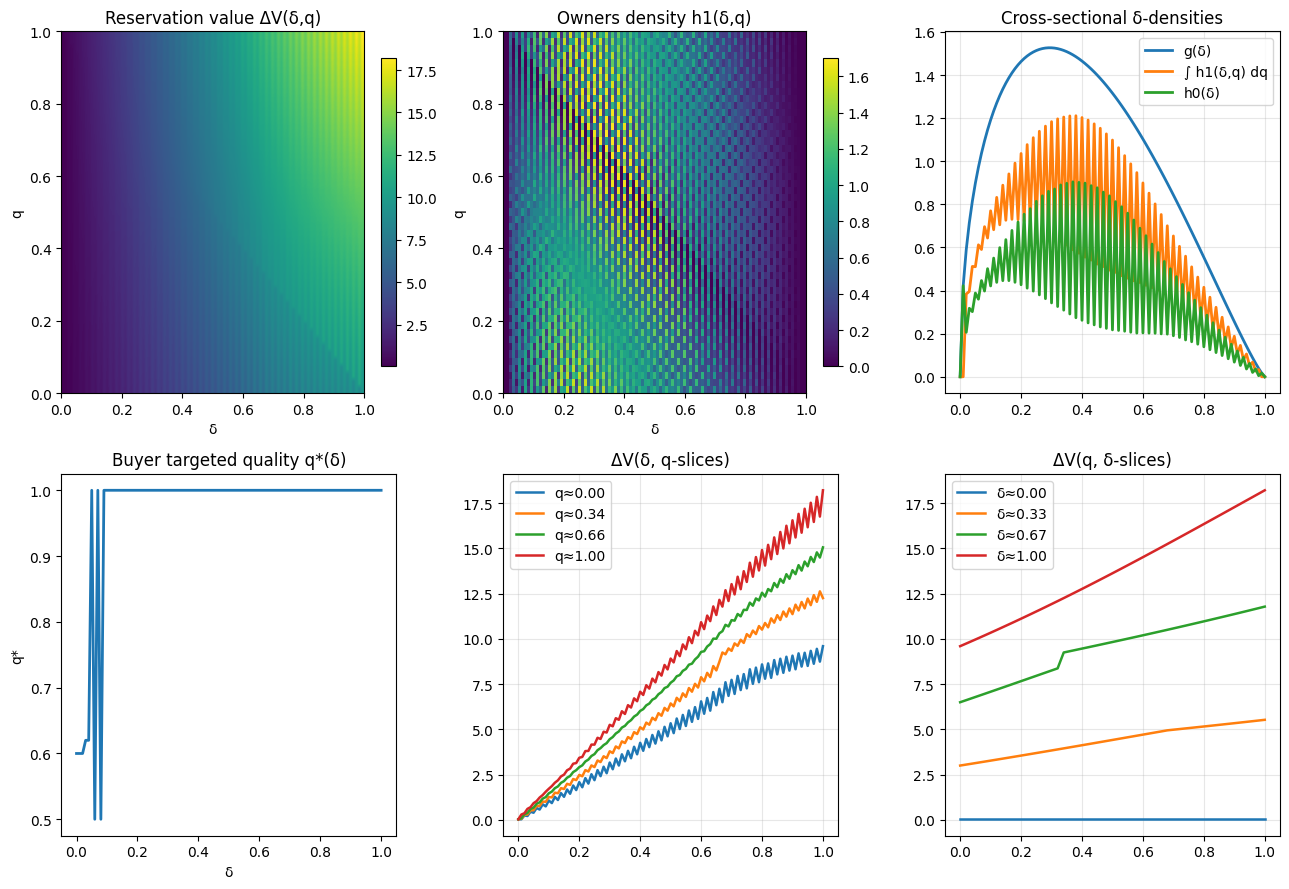

In [104]:
# %%
# Diagnostic: run the same outer loop but with drift forcibly off (b ≡ 0)
import copy, time
# %%
def hjb_implicit_solve_2d_nodrift(A_builder,
                                  params: Params,
                                  delta_grid,
                                  qgrid,
                                  DeltaV_init,
                                  tol=1e-10,
                                  max_iter=20):
    """
    No-drift HJB (b ≡ 0) and no control cost on RHS.
    Solves:
        [(r + 1/dt) I - A(b=0)] ΔV^{n+1} = δ⊗ϕ(q) + (1/dt) ΔV^n
    Notes:
      - A_builder() must build the operator with b=0.
      - This is a damped fixed-point: one solve is usually enough, but we
        iterate for numerical robustness.
    """
    Nδ = delta_grid.size; Nq = qgrid.size
    Ndof = Nδ * Nq
    I = sp.eye(Ndof, format='csr')

    # base RHS term
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(delta_grid, phi_q)  # (Nδ, Nq)

    ΔV = DeltaV_init.copy()
    A = A_builder()                         # must be built with b = 0
    M = (params.r + 1.0/params.dt_hjb) * I - A

    for _ in range(max_iter):
        rhs = RHS_base + (1.0/params.dt_hjb) * ΔV
        rhs_vec = rhs.reshape(-1)

        ΔV_new = spla.spsolve(M, rhs_vec).reshape(Nδ, Nq)

        if np.max(np.abs(ΔV_new - ΔV)) < tol:
            return ΔV_new
        ΔV = ΔV_new

    return ΔV

def solve_stationary_quality_nodrift(params: Params, warm=None, verbose=True):
    # copy params so we can keep your original object intact
    p = copy.deepcopy(params)

    # Grids & G
    δ_grid, wδ = make_grid(p.N, p.dmin, p.dmax)
    q_grid, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g, G = beta_pdf_cdf_on_interval(δ_grid, wδ, a=p.beta_a, b=p.beta_b, dmin=p.dmin, dmax=p.dmax)
    phi_q = p.phi_linear * q_grid

    # Initial guesses
    if warm is not None and all(k in warm for k in ["h1","DeltaV"]):
        h1 = project_h1_nonneg_and_rowcaps(np.maximum(warm["h1"].copy(),0.0), g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, p.s)
        ΔV = warm["DeltaV"].copy()
    else:
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (p.s * np.outer(g, S0))
        ΔV = (δ_grid[:,None] * phi_q[None,:]) / (p.r + p.gamma + p.delta_q)

    # No-drift builder (b ≡ 0)
    A_builder_nodrift = lambda: build_A_matrix_2d(h1, h0q, g, wδ, q_grid, rho=p.rho, gamma=p.gamma, b=np.zeros_like(h1))

    for it in range(1, p.max_iter_outer + 1):
        # Buyers’ policy
        h0 = np.maximum(g - (h1 @ wq), 0.0)
        h0q, _ = buyer_policy_update_using_DeltaV(
            ΔV, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=p.psi_eta, psi_qstar=p.psi_qstar, softmax_tau=p.softmax_tau
        )

        # HJB with *no-drift* (stable LF Hamiltonian on RHS, zero b on LHS)
        ΔV_new = hjb_implicit_solve_2d_nodrift(
            A_builder=(lambda: build_A_matrix_2d(h1, h0q, g, wδ, q_grid, rho=p.rho, gamma=p.gamma, b=np.zeros_like(h1))),
            params=p, delta_grid=δ_grid, qgrid=q_grid,
            DeltaV_init=ΔV, tol=p.tol_V, max_iter=p.max_iter_inner
        )

        # KFE step with b=0
        A_mat = A_builder_nodrift()
        h1_new = h1.copy()
        for _ in range(3):
            h1_new = kfe_implicit_step_2d(A=A_mat, h1=h1_new, g=g, wδ=wδ, wq=wq, s=p.s, dt=p.dt_kfe)

        dv = np.max(np.abs(ΔV_new - ΔV))
        dh = np.max(np.abs(h1_new - h1))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[nodrift iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")

        ΔV, h1 = ΔV_new, h1_new
        if dv < p.tol_V and dh < p.tol_h:
            if verbose:
                print(f"[nodrift] Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # Final buyer map & outputs
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap = buyer_policy_update_using_DeltaV(
        ΔV, h1, h0, δ_grid, q_grid, wδ, psi_eta=p.psi_eta, psi_qstar=p.psi_qstar, softmax_tau=p.softmax_tau
    )
    A_mat = build_A_matrix_2d(h1, h0q, g, wδ, q_grid, rho=p.rho, gamma=p.gamma, b=np.zeros_like(h1))

    return {
        "delta_grid": δ_grid, "q_grid": q_grid, "wδ": wδ, "wq": wq,
        "g": g, "G": G, "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": ΔV, "A": A_mat, "params": p, "Gmap": Gmap
    }

# --- run the no-drift diagnostic on the same (safer) parameter set
if __name__ == "__main__":
    p2 = Params(
        r=0.0362, gamma=0.15, rho=0.25, s=0.60,
        dmin=0.0, dmax=1.0, N=101,
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=51,
        delta_q=0.08, kappa=1.0, phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6, softmax_tau=0.2,
        dt_hjb=40.0, dt_kfe=40.0,
        max_iter_inner=100, max_iter_outer=400,
        tol_V=1e-7, tol_h=1e-7,
        b_clip=20.0, p_clip=200.0
    )

    t0 = time.perf_counter()
    out_nd = solve_stationary_quality_nodrift(p2, verbose=True)
    print(f"[nodrift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out_nd["delta_grid"]; q = out_nd["q_grid"]
    wδ = out_nd["wδ"]; wq = out_nd["wq"]; g = out_nd["g"]
    h1 = out_nd["h1"]; ΔV = out_nd["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:,None]*wq[None,:]))
    print(f"[nodrift] Mass owners = {mass_owners:.6f} (target {p2.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    plot_results(out_nd)


[nodrift iter   1] dV=1.250e+01  dh=0.000e+00
[nodrift] Converged in 3 iterations: dV=2.958e-08, dh=0.000e+00
[nodrift] Solve time = 1.595 s
[nodrift] Mass owners = 0.688400 (target 0.6884) ; non-owners = 0.311600
[nodrift] Total trade volume κ = 0.044867


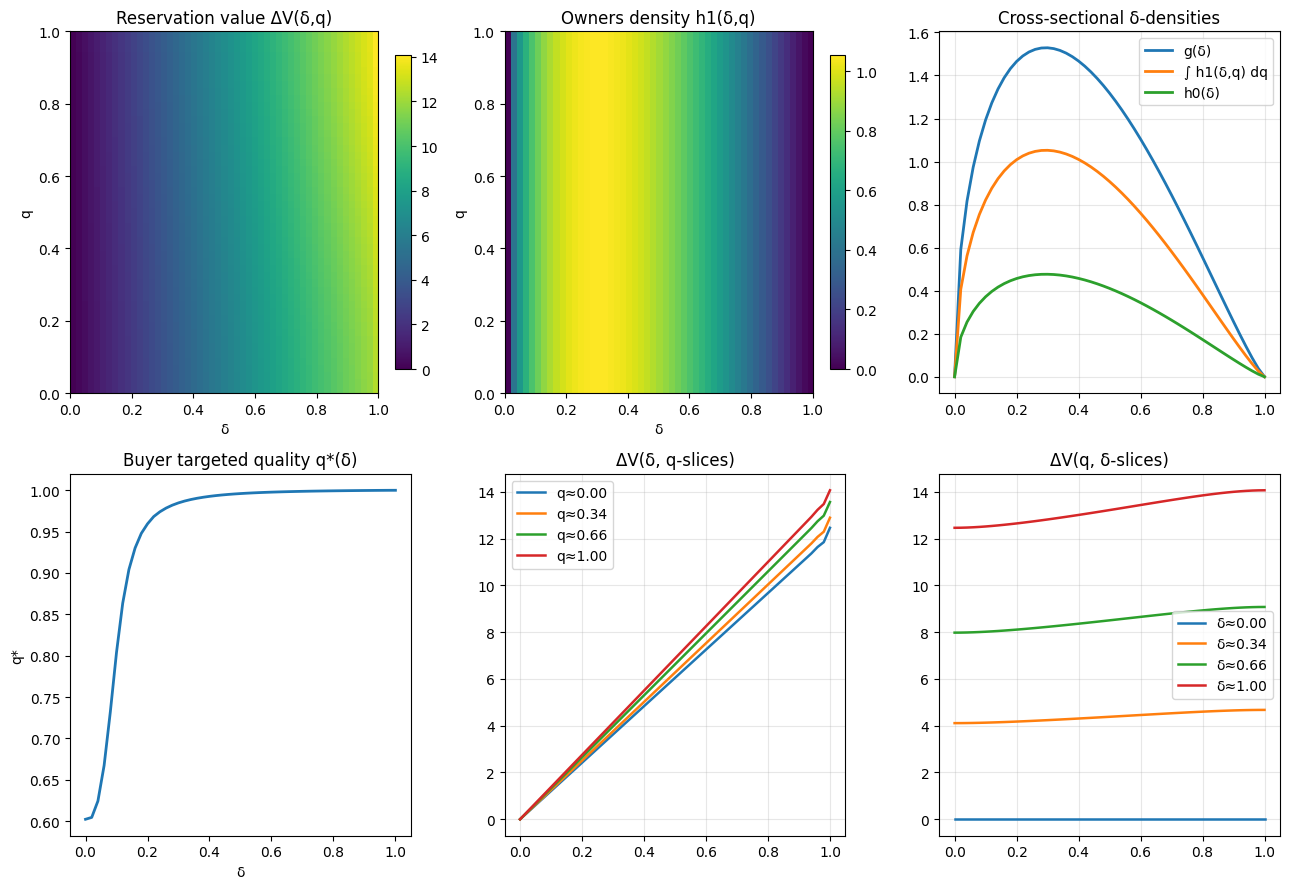

In [1]:
# =========================
# One-cell no-drift solver (continuous buyer q*, conservative mapping)
# =========================

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt
import copy, time

# -----------------
# Parameters
# -----------------
@dataclass
class Params:
    # Econ
    r: float = 0.05
    gamma: float = 0.20      # type reset rate
    rho: float = 0.50        # meeting rate
    s: float = 0.40          # housing stock share

    # Type (delta) grid
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 201

    beta_a: float = 2.0      # Beta(a,b) for G
    beta_b: float = 5.0

    # Quality (q) grid
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 81

    # Flow payoff ϕ(q) = phi_linear * q
    phi_linear: float = 1.0

    # Directed-search cost ψ(q)=0.5*eta*(q-q_star)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6

    # Buyer choice smoothing / mode
    softmax_tau: float = 0.0   # if >0, softmax policy
    policy_mode: str = "parabolic"  # "parabolic" or "softmax"

    # Numerics
    dt_hjb: float = 40.0
    dt_kfe: float = 40.0
    kfe_substeps: int = 4
    max_iter_inner: int = 60
    max_iter_outer: int = 200
    tol_V: float = 1e-8
    tol_h: float = 1e-8

    # Tiny viscosity in δ (Neumann), conservative (A·1=0)
    nu_delta: float = 1e-3

# -----------------
# Grids & Beta PDF
# -----------------
def make_grid(N, dmin=0.0, dmax=1.0):
    grid = np.linspace(dmin, dmax, N)
    h = (dmax - dmin) / (N - 1)
    w = np.full(N, h)
    w[0] *= 0.5
    w[-1] *= 0.5
    return grid, w

def beta_pdf_cdf_on_interval(grid, w, a=2.0, b=5.0, dmin=0.0, dmax=1.0):
    x = (grid - dmin) / max(dmax - dmin, 1e-14)
    x = np.clip(x, 1e-12, 1 - 1e-12)
    from math import gamma as Gamma
    B = Gamma(a) * Gamma(b) / Gamma(a + b)
    pdf_unit = (x**(a - 1) * (1 - x)**(b - 1)) / B
    g = pdf_unit / max(dmax - dmin, 1e-14)
    g = g / (g @ w)
    G = np.cumsum(g * w)
    return g, G

# -----------------
# Meeting operator in δ (triangular) — exact row-sum zero
# -----------------
def build_T_meetings_slice(h1_slice, h0q_slice, wδ):
    N = h1_slice.size
    h0w = h0q_slice * wδ
    h1w = h1_slice  * wδ

    rows, cols, data = [], [], []
    for j in range(1, N):
        i_idx = np.arange(0, j)
        rows.extend(i_idx.tolist()); cols.extend([j]*j); data.extend([+h0w[j]]*j)
    for j in range(0, N-1):
        i_idx = np.arange(j+1, N)
        rows.extend(i_idx.tolist()); cols.extend([j]*(N-j-1)); data.extend([-h1w[j]]*(N-j-1))

    T_off = sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()
    off_row_sum = np.array(T_off.sum(axis=1)).ravel()

    rows += list(range(N)); cols += list(range(N)); data += (-off_row_sum).tolist()
    return sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()

# -----------------
# δ-Laplacian with Neumann BC
# -----------------
def build_neumann_laplacian_delta(delta_grid):
    N = delta_grid.size
    if N == 1: return sp.csr_matrix((1,1))
    h = delta_grid[1] - delta_grid[0]
    invh2 = 1.0/(h*h)

    rows, cols, data = [], [], []
    rows += [0,0]; cols += [0,1]; data += [-2*invh2, 2*invh2]
    for i in range(1,N-1):
        rows += [i,i,i]; cols += [i-1,i,i+1]; data += [invh2,-2*invh2,invh2]
    rows += [N-1,N-1]; cols += [N-2,N-1]; data += [2*invh2,-2*invh2]
    return sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()

# -----------------
# Drift in q (not used here)
# -----------------
def apply_upwind_drift_matrix(delta_grid, qgrid, b):
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []
    def idx(i,k): return i*Nq + k
    dqL = np.empty(Nq); dqR = np.empty(Nq)
    dqL[0] = qgrid[1]-qgrid[0]; dqR[-1] = qgrid[-1]-qgrid[-2]
    for k in range(1,Nq): dqL[k] = qgrid[k] - qgrid[k-1]
    for k in range(0,Nq-1): dqR[k] = qgrid[k+1] - qgrid[k]
    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i,k]; r = idx(i,k)
            if bij > 0:
                rows.append(r); cols.append(r); data.append(bij/dqL[k])
                if k-1>=0: rows.append(r); cols.append(idx(i,k-1)); data.append(-bij/dqL[k])
            elif bij < 0:
                rows.append(r); cols.append(r); data.append(-bij/dqR[k])
                if k+1<Nq: rows.append(r); cols.append(idx(i,k+1)); data.append(bij/dqR[k])
    return sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()

# -----------------
# Generator A(h1,h0q,b)
# -----------------
def build_A_matrix_2d(h1, h0q, g, wδ, qgrid, rho, gamma, b, nu_delta=0.0, delta_grid=None):
    Nδ, Nq = h1.shape
    one = np.ones(Nδ)
    gw = g*wδ; gw = gw/np.sum(gw)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    Reset = sp.block_diag([R_slice]*Nq, format='csr')

    T_blocks = [build_T_meetings_slice(h1[:,k], h0q[:,k], wδ) for k in range(Nq)]
    Meet = (rho/2.0)*sp.block_diag(T_blocks, format='csr')

    if b is None:
        B = sp.csr_matrix((Nδ*Nq, Nδ*Nq))
    else:
        B = apply_upwind_drift_matrix(np.arange(Nδ), qgrid, b)

    A = B + Reset + Meet
    if nu_delta and nu_delta>0.0:
        assert delta_grid is not None
        Lδ = build_neumann_laplacian_delta(delta_grid)
        A = A + nu_delta*sp.kron(sp.eye(Nq,format='csr'), Lδ, format='csr')
    return A.tocsr()

# -----------------
# Buyer objective and continuous q* (parabolic)
# -----------------
def psi_of_q(qgrid, eta, qstar):
    return 0.5*eta*(qgrid - qstar)**2

def _parabolic_vertex(qm, q0, qp, Gm, G0, Gp):
    denom = (Gm - 2.0*G0 + Gp)
    if abs(denom) < 1e-14:
        return q0
    return q0 + 0.5*(Gm - Gp) * ( (q0 - qm)*(qp - q0) / denom ) / ( (qp - qm)/2.0 )

def _continuous_q_star_and_weights(G_row, qgrid):
    """
    Given G_i(q_k) along k, compute a continuous q* using a sign-change
    in dG/dq and a local parabola; return (qstar, kL, kR, wL, wR).
    """
    Nq = qgrid.size
    # central diff derivative
    dG = np.zeros(Nq)
    dG[1:-1] = (G_row[2:] - G_row[:-2]) / (qgrid[2:] - qgrid[:-2])
    dG[0] = (G_row[1]-G_row[0]) / (qgrid[1]-qgrid[0])
    dG[-1] = (G_row[-1]-G_row[-2]) / (qgrid[-1]-qgrid[-2])

    # find interior sign change from + to -
    k0 = None
    for k in range(1, Nq-1):
        if dG[k-1] >= 0.0 and dG[k] <= 0.0:
            k0 = k
            break

    if k0 is not None and 1 <= k0 <= Nq-2:
        qm,q0,qp = qgrid[k0-1], qgrid[k0], qgrid[k0+1]
        Gm,G0,Gp = G_row[k0-1], G_row[k0], G_row[k0+1]
        qstar = _parabolic_vertex(qm,q0,qp,Gm,G0,Gp)
        # clamp to [qm,qp]
        qstar = min(max(qstar, qm), qp)
        # barycentric split
        t = (qstar - qm) / (qp - qm + 1e-15)
        kL, kR = k0-1, k0+1
        wL, wR = (1.0 - t), t
        return qstar, kL, kR, wL, wR

    # boundary fallback: choose the larger of ends, with one-sided parabola if possible
    if G_row[0] >= G_row[-1]:
        # try forward parabola (0,1,2) if available
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[0], qgrid[1], qgrid[2], G_row[0], G_row[1], G_row[2])
            qstar = min(max(qstar, qgrid[0]), qgrid[2])
            t = (qstar - qgrid[0]) / (qgrid[2] - qgrid[0] + 1e-15)
            return qstar, 0, 2, (1.0 - t), t
        else:
            return qgrid[0], 0, 0, 1.0, 0.0
    else:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[-3], qgrid[-2], qgrid[-1], G_row[-3], G_row[-2], G_row[-1])
            qstar = min(max(qstar, qgrid[-3]), qgrid[-1])
            t = (qstar - qgrid[-3]) / (qgrid[-1] - qgrid[-3] + 1e-15)
            return qstar, Nq-3, Nq-1, (1.0 - t), t
        else:
            return qgrid[-1], Nq-1, Nq-1, 1.0, 0.0

def buyer_policy_update_using_DeltaV(DeltaV, h1, h0, delta_grid, qgrid, wδ,
                                     psi_eta, psi_qstar,
                                     softmax_tau=0.0, smooth_G_passes=1,
                                     policy_mode="parabolic"):
    """
    Compute buyer policy h0^q from G(δ,q). Two modes:
      - "parabolic": continuous q* with quadratic vertex + barycentric split
      - "softmax":   standard softmax over q
    Returns (h0q, G, qstar_cont) where qstar_cont is the smooth curve for plotting.
    """
    Nδ, Nq = DeltaV.shape
    ψ = 0.5*psi_eta*(qgrid - psi_qstar)**2

    Hcum  = np.cumsum(h1 * wδ[:,None], axis=0)
    HVcum = np.cumsum(h1 * DeltaV * wδ[:,None], axis=0)

    G = np.empty((Nδ, Nq))
    for i in range(Nδ):
        mass_below = Hcum[i-1,:] if i>0 else 0.0
        v_below    = HVcum[i-1,:] if i>0 else 0.0
        G[i,:] = DeltaV[i,:] * mass_below - v_below - ψ

    if smooth_G_passes and smooth_G_passes>0:
        for _ in range(smooth_G_passes):
            G[1:-1,:] = 0.25*G[:-2,:] + 0.5*G[1:-1,:] + 0.25*G[2:,:]
            G[0,:]    = 0.5*G[0,:] + 0.5*G[1,:]
            G[-1,:]   = 0.5*G[-1,:] + 0.5*G[-2,:]

    h0q = np.zeros_like(DeltaV)
    qstar_cont = np.zeros(Nδ)

    if policy_mode == "softmax" and softmax_tau>1e-12:
        expG = np.exp((G - G.max(axis=1, keepdims=True))/softmax_tau)
        weights = expG / np.maximum(expG.sum(axis=1, keepdims=True), 1e-300)
        h0q = (h0[:,None] * weights)
        # expected q for plotting
        qstar_cont = (weights * qgrid[None,:]).sum(axis=1)
        return h0q, G, qstar_cont

    # Parabolic continuous argmax + barycentric split (conservative and smooth)
    for i in range(Nδ):
        if h0[i] <= 0:
            qstar_cont[i] = qgrid[0]
            continue
        qstar, kL, kR, wL, wR = _continuous_q_star_and_weights(G[i,:], qgrid)
        qstar_cont[i] = qstar
        if kL == kR:
            h0q[i, kL] += h0[i]
        else:
            h0q[i, kL] += h0[i]*wL
            h0q[i, kR] += h0[i]*wR

    return h0q, G, qstar_cont

# -----------------
# Projections & KFE
# -----------------
def project_h1_nonneg_and_rowcaps(h1, g, wq, tol=1e-12):
    h1 = np.maximum(h1, 0.0)
    row_mass = h1 @ wq
    scale = np.ones_like(row_mass)
    mask_over = row_mass > (g + tol)
    safe_mass = np.maximum(row_mass, 1e-16)
    scale[mask_over] = g[mask_over] / safe_mass[mask_over]
    return (h1.T * scale).T

def renormalize_total_owners(h1, wδ, wq, s, tol=1e-12):
    mass = np.sum(h1 * (wδ[:,None]*wq[None,:]))
    if not np.isfinite(mass) or abs(mass - s) <= tol or mass <= 1e-16:
        return h1
    return h1 * (s / mass)

def renormalize_total_owners_with_caps(h1, g, wδ, wq, s, tol=1e-12, max_iter=60):
    h1 = np.maximum(h1, 0.0)
    m = h1 @ wq
    G_cap = np.sum(g * wδ)
    assert G_cap >= s - 1e-14, "Infeasible: total mass target exceeds caps."
    M = np.sum(m * wδ)
    if np.max(m - g) <= tol and abs(M - s) <= tol:
        return h1
    def total_mass_at(lmb): return np.sum(np.minimum(g, lmb*m) * wδ)
    lo, hi = 0.0, 1.0
    while total_mass_at(hi) < s:
        hi *= 2.0
        if hi > 1e16:
            h1_cap = (h1.T * np.where(m>0, g/np.maximum(m,1e-16), 0.0)).T
            return renormalize_total_owners(h1_cap, wδ, wq, s)
    for _ in range(max_iter):
        mid = 0.5*(lo+hi)
        M_mid = total_mass_at(mid)
        if abs(M_mid - s) <= tol: break
        if M_mid < s: lo = mid
        else:         hi = mid
    s_row = np.minimum(0.5*(lo+hi), g/np.maximum(m,1e-16))
    h1_new = (h1.T * s_row).T
    h1_new[h1_new<0.0] = 0.0
    return renormalize_total_owners(h1_new, wδ, wq, s)

def kfe_implicit_substeps(A, h1, g, wδ, wq, s, dt, n_sub=4):
    Ndof = h1.size
    if dt==0 or (hasattr(A,"nnz") and A.nnz==0) or n_sub<=0:
        return h1
    dts = dt / n_sub
    M = sp.eye(Ndof, format='csr') - dts * A.transpose()
    x = h1.reshape(-1)
    for _ in range(n_sub):
        x = spla.spsolve(M, x)
    h1_lin = x.reshape(h1.shape)
    return renormalize_total_owners_with_caps(h1_lin, g, wδ, wq, s, tol=1e-12)

# -----------------
# HJB implicit (no drift)
# -----------------
def hjb_implicit_solve_2d_nodrift(A_builder, params, delta_grid, qgrid,
                                  DeltaV_init, tol=1e-10, max_iter=20):
    Nδ = delta_grid.size; Nq = qgrid.size
    Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(delta_grid, phi_q)
    ΔV = DeltaV_init.copy()
    A = A_builder()
    M = (params.r + 1.0/params.dt_hjb) * I - A
    for _ in range(max_iter):
        rhs = RHS_base + (1.0/params.dt_hjb) * ΔV
        ΔV_new = spla.spsolve(M, rhs.reshape(-1)).reshape(Nδ, Nq)
        if np.max(np.abs(ΔV_new - ΔV)) < tol: return ΔV_new
        ΔV = ΔV_new
    return ΔV

# -----------------
# Outer loop
# -----------------
def solve_stationary_quality_nodrift(params: Params, warm=None, verbose=True):
    p = copy.deepcopy(params)
    δ_grid, wδ = make_grid(p.N, p.dmin, p.dmax)
    q_grid, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g, G = beta_pdf_cdf_on_interval(δ_grid, wδ, a=p.beta_a, b=p.beta_b,
                                    dmin=p.dmin, dmax=p.dmax)
    phi_q = p.phi_linear * q_grid

    if warm is not None and all(k in warm for k in ["h1","DeltaV"]):
        h1 = project_h1_nonneg_and_rowcaps(np.maximum(warm["h1"].copy(),0.0), g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, p.s)
        ΔV = warm["DeltaV"].copy()
    else:
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (p.s * np.outer(g, S0))
        ΔV = (δ_grid[:,None] * phi_q[None,:]) / (p.r + p.gamma + 0.08)  # same as before

    def A_builder_given(h1_now, h0q_now):
        return build_A_matrix_2d(h1_now, h0q_now, g, wδ, q_grid, p.rho, p.gamma,
                                 b=None, nu_delta=p.nu_delta, delta_grid=δ_grid)

    for it in range(1, p.max_iter_outer+1):
        h0 = np.maximum(g - (h1 @ wq), 0.0)
        h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
            ΔV, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
            softmax_tau=p.softmax_tau, smooth_G_passes=1,
            policy_mode=p.policy_mode
        )

        A_now = A_builder_given(h1, h0q)
        h1_new = kfe_implicit_substeps(A_now, h1, g, wδ, wq, p.s, dt=p.dt_kfe, n_sub=p.kfe_substeps)

        ΔV_new = hjb_implicit_solve_2d_nodrift(
            A_builder=(lambda: A_builder_given(h1_new, h0q)),
            params=p, delta_grid=δ_grid, qgrid=q_grid,
            DeltaV_init=ΔV, tol=p.tol_V, max_iter=p.max_iter_inner
        )

        dv = np.max(np.abs(ΔV_new - ΔV))
        dh = np.max(np.abs(h1_new - h1))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[nodrift iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")
        ΔV, h1 = ΔV_new, h1_new

        if dv < p.tol_V and dh < p.tol_h:
            if verbose:
                print(f"[nodrift] Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # final policy & operator at the fixed point
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
        ΔV, h1, h0, δ_grid, q_grid, wδ,
        psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
        softmax_tau=p.softmax_tau, smooth_G_passes=1,
        policy_mode=p.policy_mode
    )
    A_mat = A_builder_given(h1, h0q)

    return {
        "delta_grid": δ_grid, "q_grid": q_grid, "wδ": wδ, "wq": wq,
        "g": g, "G": G, "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": ΔV, "A": A_mat, "params": p, "Gmap": Gmap,
        "qstar_cont": qstar_cont
    }

# -----------------
# Reporting
# -----------------
def price_kernel_by_q(DeltaV):
    return 0.5*(DeltaV[:,None,:] + DeltaV[None,:,:])

def trade_volume_total(params: Params, h1, h0q, wδ):
    Nδ, Nq = h1.shape; κ = 0.0
    for k in range(Nq):
        a = h1[:,k]*wδ; b = h0q[:,k]*wδ
        b_above = np.cumsum(b[::-1])[::-1]
        κ += np.sum(a[:-1]*b_above[:-1])
    return params.rho * κ

def plot_results(out):
    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]
    g  = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]; Gmap = out["Gmap"]
    qstar_cont = out.get("qstar_cont", None)

    fig = plt.figure(figsize=(13,9))
    gs = fig.add_gridspec(2,3)

    ax0 = fig.add_subplot(gs[0,0])
    im0 = ax0.imshow(ΔV.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax0.set_title("Reservation value ΔV(δ,q)")
    ax0.set_xlabel("δ"); ax0.set_ylabel("q")
    fig.colorbar(im0, ax=ax0, fraction=0.046)

    ax1 = fig.add_subplot(gs[0,1])
    im1 = ax1.imshow(h1.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax1.set_title("Owners density h1(δ,q)")
    ax1.set_xlabel("δ"); ax1.set_ylabel("q")
    fig.colorbar(im1, ax=ax1, fraction=0.046)

    ax2 = fig.add_subplot(gs[0,2])
    h1_δ = h1 @ wq
    h0   = g - h1_δ
    ax2.plot(δ, g, lw=2, label='g(δ)')
    ax2.plot(δ, h1_δ, lw=2, label='∫ h1(δ,q) dq')
    ax2.plot(δ, h0, lw=2, label='h0(δ)')
    ax2.set_title("Cross-sectional δ-densities")
    ax2.legend(); ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[1,0])
    if qstar_cont is None:
        q_star_idx = np.argmax(Gmap, axis=1)
        ax3.plot(δ, q[q_star_idx], lw=2)
    else:
        ax3.plot(δ, qstar_cont, lw=2)
    ax3.set_title("Buyer targeted quality q*(δ)")
    ax3.set_xlabel("δ"); ax3.set_ylabel("q*")

    ax4 = fig.add_subplot(gs[1,1])
    q_sel = np.linspace(q[0], q[-1], 4)
    for qq in q_sel:
        k = np.argmin(np.abs(q-qq))
        ax4.plot(δ, ΔV[:,k], lw=1.8, label=f"q≈{q[k]:.2f}")
    ax4.set_title("ΔV(δ, q-slices)")
    ax4.legend(); ax4.grid(alpha=0.3)

    ax5 = fig.add_subplot(gs[1,2])
    δ_sel = np.linspace(δ[0], δ[-1], 4)
    for dd in δ_sel:
        i = np.argmin(np.abs(δ-dd))
        ax5.plot(q, ΔV[i,:], lw=1.8, label=f"δ≈{δ[i]:.2f}")
    ax5.set_title("ΔV(q, δ-slices)")
    ax5.legend(); ax5.grid(alpha=0.3)

    plt.tight_layout(); plt.show()

# -----------------
# Example
# -----------------
if __name__ == "__main__":
    p = Params(
        r=0.0362, gamma=0.468305, rho=0.408321, s=0.6884,
        dmin=0.0, dmax=1.0, N=51,
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=51,
        phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6,
        softmax_tau=0.0, policy_mode="parabolic",
        dt_hjb=40.0, dt_kfe=40.0, kfe_substeps=0,
        max_iter_inner=100, max_iter_outer=80,
        tol_V=1e-7, tol_h=1e-7,
        nu_delta=1e-2
    )

    t0 = time.perf_counter()
    out = solve_stationary_quality_nodrift(p, verbose=True)
    print(f"[nodrift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]; g = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:,None]*wq[None,:]))
    print(f"[nodrift] Mass owners = {mass_owners:.6f} (target {p.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    h0 = g - (h1 @ wq)
    κ_total = trade_volume_total(p, h1, out["h0q"], wδ)
    print(f"[nodrift] Total trade volume κ = {κ_total:.6f}")

    plot_results(out)


In [5]:
def compute_moments_quality(out, params, qtiles=(0.10, 0.50, 0.90)):
    δ      = out["delta_grid"]; q = out["q_grid"]
    wδ     = out["wδ"]; wq = out["wq"]
    g      = out["g"]
    h1     = out["h1"]          # (Nδ × Nq)
    h0q    = out["h0q"]         # (Nδ × Nq)
    ΔV     = out["DeltaV"]      # (Nδ × Nq)

    Nδ, Nq = h1.shape

    # --- per-quality slice moments ---
    def _slice_trade_moments(delta, wδ, ΔV_k, h1_k, h0q_k, rho):
        a = h1_k * wδ
        b = h0q_k * wδ
        B_above   = np.cumsum(b[::-1])[::-1]
        BV_above  = np.cumsum((b * ΔV_k)[::-1])[::-1]
        BV2_above = np.cumsum((b * (ΔV_k**2))[::-1])[::-1]
        Bδ_above  = np.cumsum((b * delta)[::-1])[::-1]
        κ_k = rho * np.sum(a * B_above)
        if not (np.isfinite(κ_k) and κ_k > 0):
            return (0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)
        num_mean   = (rho/2.0) * np.sum(a * (ΔV_k * B_above + BV_above))
        mean_price = num_mean / κ_k
        num_second = (rho/4.0) * np.sum(a * ((ΔV_k**2)*B_above + 2.0*ΔV_k*BV_above + BV2_above))
        var_price  = max(num_second/κ_k - mean_price**2, 0.0)
        mΔV_b  = (rho * np.sum(a * BV_above)) / κ_k
        mΔV_s  = (rho * np.sum(a * (ΔV_k * B_above))) / κ_k
        mδ_b   = (rho * np.sum(a * Bδ_above)) / κ_k
        mδ_s   = (rho * np.sum(a * (delta * B_above))) / κ_k
        return (κ_k, mean_price, var_price, mΔV_b, mΔV_s, mδ_b, mδ_s)

    κ_k = np.zeros(Nq)
    mean_price_k  = np.full(Nq, np.nan)
    var_price_k   = np.full(Nq, np.nan)
    mΔV_b_k = np.full(Nq, np.nan); mΔV_s_k = np.full(Nq, np.nan)
    mδ_b_k  = np.full(Nq, np.nan); mδ_s_k  = np.full(Nq, np.nan)

    for k in range(Nq):
        (κ_k[k], mean_price_k[k], var_price_k[k],
         mΔV_b_k[k], mΔV_s_k[k], mδ_b_k[k], mδ_s_k[k]) = _slice_trade_moments(
            δ, wδ, ΔV[:,k], h1[:,k], h0q[:,k], params.rho
        )

    κ_total = float(np.sum(κ_k))

    # mask to keep only informative slices
    valid_price = (κ_k > 0) & np.isfinite(mean_price_k) & np.isfinite(var_price_k)

    # --- overall price mean/std ---
    if κ_total > 0 and np.any(valid_price):
        W = κ_k[valid_price]
        mp = mean_price_k[valid_price]
        vp = var_price_k[valid_price]
        mean_price = np.sum(W * mp) / np.sum(W)
        E_p2       = np.sum(W * (vp + mp**2)) / np.sum(W)
        std_price  = np.sqrt(max(E_p2 - mean_price**2, 0.0))
    else:
        mean_price = np.nan; std_price = np.nan

    # --- trade-weighted “slice-mean” price quantiles ---
    def _wq(x, w, qs):
        W = np.sum(w)
        if not np.isfinite(W) or W <= 0: return [np.nan]*len(qs)
        order = np.argsort(x)
        xv, wv = x[order], w[order]
        cw = np.cumsum(wv); cw /= cw[-1]
        return np.interp(qs, cw, xv).tolist()

    if np.any(valid_price):
        p10, p50, p90 = _wq(mean_price_k[valid_price], κ_k[valid_price], list(qtiles))
    else:
        p10 = p50 = p90 = np.nan

    # --- selection in trades (aggregate) ---
    valid_sel = (κ_k > 0) & np.isfinite(mΔV_b_k) & np.isfinite(mΔV_s_k) & np.isfinite(mδ_b_k) & np.isfinite(mδ_s_k)
    if κ_total > 0 and np.any(valid_sel):
        W = κ_k[valid_sel]
        mean_ΔV_buyer  = np.sum(W * mΔV_b_k[valid_sel]) / np.sum(W)
        mean_ΔV_seller = np.sum(W * mΔV_s_k[valid_sel]) / np.sum(W)
        mean_δ_buyer   = np.sum(W * mδ_b_k[valid_sel])  / np.sum(W)
        mean_δ_seller  = np.sum(W * mδ_s_k[valid_sel])  / np.sum(W)
        mean_total_surplus = mean_ΔV_buyer - mean_ΔV_seller
    else:
        mean_ΔV_buyer = mean_ΔV_seller = mean_δ_buyer = mean_δ_seller = np.nan
        mean_total_surplus = np.nan

    # --- arrival rates ---
    H1_k    = np.cumsum(h1 * wδ[:,None], axis=0)
    H0sup_k = np.cumsum((h0q * wδ[:,None])[::-1,:], axis=0)[::-1,:]
    mass0 = 1.0 - params.s
    mass1 = params.s
    avg_success_buyer  = np.sum((H1_k * h0q) * (wδ[:,None]*wq[None,:])) / max(mass0, 1e-300)
    avg_success_seller = np.sum((H0sup_k * h1)  * (wδ[:,None]*wq[None,:])) / max(mass1, 1e-300)
    λ_b = params.rho * avg_success_buyer  if np.isfinite(avg_success_buyer)  else np.nan
    λ_s = params.rho * avg_success_seller if np.isfinite(avg_success_seller) else np.nan
    mean_time_to_buy  = (1.0/λ_b) if (np.isfinite(λ_b) and λ_b > 0) else np.nan
    mean_time_to_sell = (1.0/λ_s) if (np.isfinite(λ_s) and λ_s > 0) else np.nan

    # --- quality distributions (owners, buyers, trades) ---
    S_q = np.sum(h1  * wδ[:,None], axis=0)   # owners by q
    B_q = np.sum(h0q * wδ[:,None], axis=0)   # buyers by q
    def _mean_var_grid(x, w):
        W = np.sum(w)
        if not np.isfinite(W) or W <= 0: return np.nan, np.nan
        m  = np.sum(x*w)/W; m2 = np.sum((x**2)*w)/W
        return m, max(m2 - m**2, 0.0)
    mean_q_owners, var_q_owners = _mean_var_grid(q, S_q)
    mean_q_buyers, var_q_buyers = _mean_var_grid(q, B_q)
    valid_kappa = (κ_k > 0) & np.isfinite(κ_k)
    mean_q_trades, var_q_trades = _mean_var_grid(q[valid_kappa], κ_k[valid_kappa])

    # HHI of owners across q
    S_share = S_q / max(np.sum(S_q), 1e-300)
    HHI_q_owners = np.sum(S_share**2)

    # share of trades in top-⅓ quality
    cut_hi = q[int(np.floor(2*Nq/3))]
    share_trades_highq = (np.sum(κ_k[q >= cut_hi]) / np.sum(κ_k)) if κ_total > 0 else np.nan

    # Corr(δ,q) among owners
    W_owner = h1 * (wδ[:,None]*wq[None,:])
    Wsum = np.sum(W_owner)
    if Wsum > 0:
        Eδ  = np.sum(δ[:,None]  * W_owner) / Wsum
        Eq  = np.sum(q[None,:]  * W_owner) / Wsum
        Eδq = np.sum(δ[:,None]*q[None,:]*W_owner) / Wsum
        Eδ2 = np.sum((δ[:,None]**2) * W_owner) / Wsum
        Eq2 = np.sum((q[None,:]**2) * W_owner) / Wsum
        varδ = max(Eδ2 - Eδ**2, 0.0); varq = max(Eq2 - Eq**2, 0.0)
        corr_dq_owners = ( (Eδq - Eδ*Eq) / np.sqrt(varδ*varq) ) if varδ>0 and varq>0 else np.nan
    else:
        corr_dq_owners = np.nan

    # Corr between slice quality and average δ involved in trades (proxy)
    valid_corr = valid_sel  # same mask is fine
    if np.any(valid_corr):
        W = κ_k[valid_corr]
        mδ_trade = 0.5*(mδ_b_k[valid_corr] + mδ_s_k[valid_corr])
        qv = q[valid_corr]
        Wsum = np.sum(W)
        Eq  = np.sum(qv*W)/Wsum; Emδ = np.sum(mδ_trade*W)/Wsum
        Eqmδ = np.sum(qv*mδ_trade*W)/Wsum
        var_q = max(np.sum((qv**2)*W)/Wsum - Eq**2, 0.0)
        var_mδ = max(np.sum((mδ_trade**2)*W)/Wsum - Emδ**2, 0.0)
        corr_q_delta_in_trades = ( (Eqmδ - Eq*Emδ) / np.sqrt(var_q*var_mδ) ) if var_q>0 and var_mδ>0 else np.nan
    else:
        corr_q_delta_in_trades = np.nan

    return {
        "trade_volume": κ_total,
        "mean_price": mean_price,
        "std_price": std_price,
        "p10": p10, "p50": p50, "p90": p90,
        "mean_delta_buyer_in_trades":  mean_δ_buyer if np.any(valid_sel) else np.nan,
        "mean_delta_seller_in_trades": mean_δ_seller if np.any(valid_sel) else np.nan,
        "mean_DeltaV_buyer_in_trades":  mean_ΔV_buyer if np.any(valid_sel) else np.nan,
        "mean_DeltaV_seller_in_trades": mean_ΔV_seller if np.any(valid_sel) else np.nan,
        "mean_total_surplus": mean_total_surplus if np.any(valid_sel) else np.nan,
        "buyer_arrival_rate":  λ_b,
        "seller_arrival_rate": λ_s,
        "mean_time_to_buy":  mean_time_to_buy,
        "mean_time_to_sell": mean_time_to_sell,
        "mean_q_owners": mean_q_owners, "std_q_owners": np.sqrt(var_q_owners) if np.isfinite(var_q_owners) else np.nan,
        "mean_q_buyers": mean_q_buyers, "std_q_buyers": np.sqrt(var_q_buyers) if np.isfinite(var_q_buyers) else np.nan,
        "mean_q_trades": mean_q_trades, "std_q_trades": np.sqrt(var_q_trades) if np.isfinite(var_q_trades) else np.nan,
        "hhi_q_owners": HHI_q_owners,
        "share_trades_highq": share_trades_highq,
        "corr_delta_q_owners": corr_dq_owners,
        "corr_q_delta_in_trades": corr_q_delta_in_trades,
        "by_q": {
            "q": q,
            "kappa_q": κ_k,
            "mean_price_q": mean_price_k,
            "std_price_q": np.sqrt(np.maximum(var_price_k, 0.0)),
            "mean_delta_buyer_q": mδ_b_k,
            "mean_delta_seller_q": mδ_s_k,
        }
    }


In [6]:
out = solve_stationary_quality_nodrift(p, verbose=True)
mom = compute_moments_quality(out, p)
print_moments_quality(mom)

# Optional: per-quality panels for a table/plot
byq = mom["by_q"]  # contains arrays: q, kappa_q, mean_price_q, std_price_q, mean_delta_buyer_q, mean_delta_seller_q


[nodrift iter   1] dV=1.250e+01  dh=0.000e+00
[nodrift] Converged in 3 iterations: dV=2.958e-08, dh=0.000e+00
=== Moments (Quality Model) ===
Trade volume κ                          : 0.044867
Price mean / std                        : 5.575354 / 2.209255
Price quantiles p10 | p50 | p90         : 2.797546 | 4.832504 | 5.838747
Mean δ (buyer / seller) in trades       : 0.531726 / 0.279343
Mean ΔV (buyer / seller) in trades      : 7.310359 / 3.840350
Mean total surplus per trade            : 3.470009
Buyer arrival λ_b / Seller arrival λ_s  : 0.001711 / 0.000775
Mean time to buy / sell                 : 584.415545 / 1291.115729
Owners' quality mean / std              : 0.500000 / 0.294392
Buyers' targeted quality mean / std     : 0.955267 / 0.089897
Trades' quality mean / std              : 0.988760 / 0.033561
HHI (owners across quality)             : 0.019608
Share of trades in top-⅓ quality        : 0.997354
Corr(δ,q) among owners                  : 0.000000
Corr(q, avg δ in trades acros

/var/folders/_n/lf7z72357kvgwqy6s_k_2x640000ks/T/ipykernel_7640/3782827945.py:396: RuntimeWarning: overflow encountered in square
  return 0.5 * (p**2) / (kappa_q[None,:] + 1e-300)


[drift iter   1] dV=nan  dh=7.604e+00
[drift iter  10] dV=1.618e+39  dh=6.881e+01
[drift iter  20] dV=2.855e+34  dh=7.155e+01
[drift iter  30] dV=5.372e+36  dh=6.464e+01
[drift iter  40] dV=7.558e+37  dh=2.581e+01
[drift iter  50] dV=3.679e+154  dh=5.449e+01
[drift iter  60] dV=1.257e+293  dh=4.737e+01
[drift iter  70] dV=9.727e+36  dh=3.650e+01
[drift iter  80] dV=5.552e+62  dh=8.433e+01
[drift] Solve time = 11783.737 s
[drift] Mass owners = 0.688400 (target 0.6884) ; non-owners = 0.311600
[drift] Total trade volume κ = 0.004908


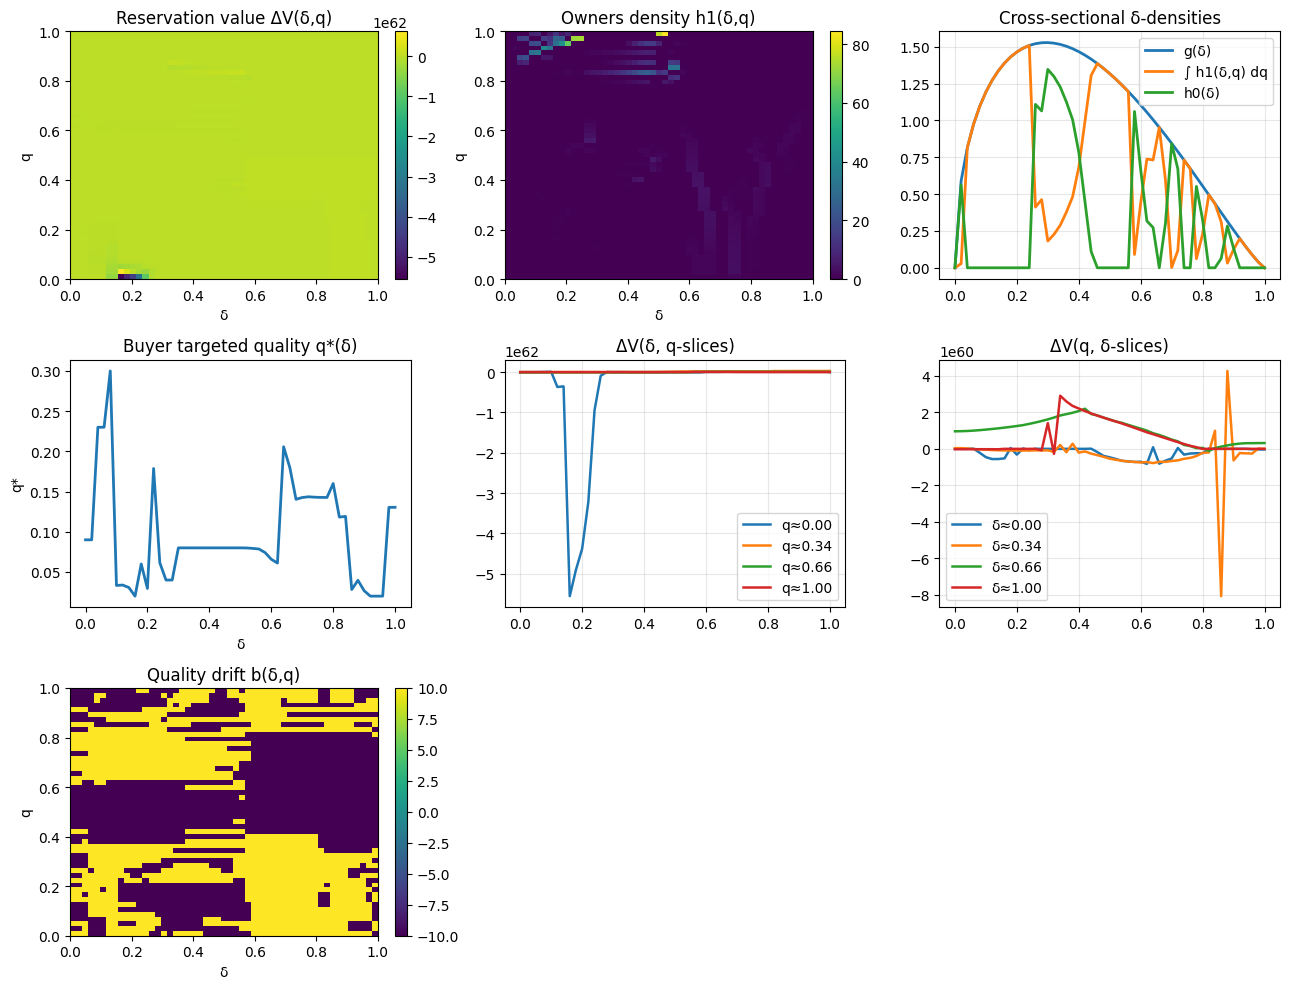

In [5]:
# =========================
# Model 3: Directed search with endogenous quality drift
# (Nests Model 2 when use_drift=False or kappa_const -> ∞)
# =========================

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt
import copy, time

# -----------------
# Parameters
# -----------------
@dataclass
class Params:
    # Econ
    r: float = 0.05
    gamma: float = 0.20      # type reset rate
    rho: float = 0.50        # meeting rate
    s: float = 0.40          # housing stock share

    # Type (delta) grid
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 201

    beta_a: float = 2.0      # Beta(a,b) for G
    beta_b: float = 5.0

    # Quality (q) grid
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 81

    # Flow payoff ϕ(q) = phi_linear * q
    phi_linear: float = 1.0

    # Directed-search cost ψ(q)=0.5*eta*(q-q_star)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6

    # Buyer choice smoothing / mode
    softmax_tau: float = 0.0   # if >0, softmax policy
    policy_mode: str = "parabolic"  # "parabolic" or "softmax"

    # Quality drift / maintenance
    use_drift: bool = True          # False -> Model 2
    delta_q: float = 0.00           # depreciation in q (set >0 for drift down)
    kappa_const: float = 1.0        # c(a,q)=0.5*kappa*a^2, can be scalar or array len Nq
    bmax: float = 10.0              # NEW: clamp |b| <= bmax

    # Numerics
    dt_hjb: float = 40.0
    dt_kfe: float = 40.0
    kfe_substeps: int = 4
    max_iter_inner: int = 60
    max_iter_outer: int = 200
    tol_V: float = 1e-8
    tol_h: float = 1e-8

    # Tiny viscosity in δ (Neumann), conservative (A·1=0)
    nu_delta: float = 1e-3
    # NEW: tiny viscosity in q (Neumann) to condition solves
    nu_q: float = 1e-3

    # HJB Picard for drift/c*
    hjb_picard_iters: int = 3

    # NEW: safety epsilons
    h0_floor: float = 1e-12
    kfe_diag_eps: float = 1e-12
    hjb_diag_eps: float = 1e-12

# -----------------
# Grids & Beta PDF
# -----------------
def make_grid(N, dmin=0.0, dmax=1.0):
    grid = np.linspace(dmin, dmax, N)
    h = (dmax - dmin) / (N - 1) if N > 1 else 1.0
    w = np.full(N, h)
    if N > 1:
        w[0] *= 0.5
        w[-1] *= 0.5
    return grid, w

def beta_pdf_cdf_on_interval(grid, w, a=2.0, b=5.0, dmin=0.0, dmax=1.0):
    x = (grid - dmin) / max(dmax - dmin, 1e-14)
    x = np.clip(x, 1e-12, 1 - 1e-12)
    from math import gamma as Gamma
    B = Gamma(a) * Gamma(b) / Gamma(a + b)
    pdf_unit = (x**(a - 1) * (1 - x)**(b - 1)) / B
    g = pdf_unit / max(dmax - dmin, 1e-14)
    g = g / (g @ w)
    G = np.cumsum(g * w)
    return g, G

# -----------------
# Neumann Laplacians
# -----------------
def build_neumann_laplacian_1d(grid):
    N = grid.size
    if N <= 1:
        return sp.csr_matrix((N, N))
    h = grid[1] - grid[0]
    invh2 = 1.0/(h*h)
    rows, cols, data = [], [], []
    # left
    rows += [0,0]; cols += [0,1]; data += [-2*invh2, 2*invh2]
    for i in range(1,N-1):
        rows += [i,i,i]; cols += [i-1,i,i+1]; data += [invh2,-2*invh2,invh2]
    # right
    rows += [N-1,N-1]; cols += [N-2,N-1]; data += [2*invh2,-2*invh2]
    return sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()

# -----------------
# q-derivatives & upwind drift in q
# -----------------
def Dq_centered(F, qgrid):
    Nδ, Nq = F.shape
    D = np.zeros_like(F)
    if Nq == 1:
        return D
    D[:,1:-1] = (F[:,2:] - F[:,:-2]) / (qgrid[2:] - qgrid[:-2])
    D[:,0]  = (F[:,1] - F[:,0]) / (qgrid[1]-qgrid[0])
    D[:,-1] = (F[:,-1] - F[:,-2]) / (qgrid[-1]-qgrid[-2])
    return D

def apply_upwind_drift_matrix(qgrid, b):
    """
    Build sparse matrix B so that (B f)_{i,k} ≈ b_{i,k} ∂_q f|_{i,k}
    Stacking is q-major: (i,k) -> k*Nδ + i.
    """
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []
    def idx(i,k): return k*Nδ + i

    dqL = np.empty(Nq); dqR = np.empty(Nq)
    if Nq == 1:
        dqL[0] = dqR[-1] = 1.0
    else:
        dqL[0] = qgrid[1] - qgrid[0]
        dqR[-1] = qgrid[-1] - qgrid[-2]
        for k in range(1, Nq):   dqL[k] = qgrid[k]   - qgrid[k-1]
        for k in range(0, Nq-1): dqR[k] = qgrid[k+1] - qgrid[k]

    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i,k]; r = idx(i,k)
            if bij > 0:
                # backward in q
                rows.append(r); cols.append(r);              data.append( bij/dqL[k])
                if k-1 >= 0:
                    rows.append(r); cols.append(idx(i,k-1)); data.append(-bij/dqL[k])
            elif bij < 0:
                # forward in q
                rows.append(r); cols.append(r);              data.append(-bij/dqR[k])
                if k+1 < Nq:
                    rows.append(r); cols.append(idx(i,k+1)); data.append( bij/dqR[k])
            # bij == 0 -> nothing
    return sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()

# -----------------
# Meeting operator in δ (triangular) — exact row-sum zero
# -----------------
def build_T_meetings_slice(h1_slice, h0q_slice, wδ):
    N = h1_slice.size
    h0w = h0q_slice * wδ
    h1w = h1_slice  * wδ

    rows, cols, data = [], [], []
    # inflows (buyers above)
    for j in range(1, N):
        i_idx = np.arange(0, j)
        rows.extend(i_idx.tolist()); cols.extend([j]*j); data.extend([+h0w[j]]*j)
    # outflows (owners sell to buyers above)
    for j in range(0, N-1):
        i_idx = np.arange(j+1, N)
        rows.extend(i_idx.tolist()); cols.extend([j]*(N-j-1)); data.extend([-h1w[j]]*(N-j-1))

    T_off = sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()
    off_row_sum = np.array(T_off.sum(axis=1)).ravel()
    rows += list(range(N)); cols += list(range(N)); data += (-off_row_sum).tolist()
    return sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()

# -----------------
# Generator A(h1,h0q,b)
# -----------------
def build_A_matrix_2d(h1, h0q, g, wδ, qgrid, rho, gamma, b=None,
                      nu_delta=0.0, delta_grid=None, nu_q=0.0):
    """
    A = B(b) + Reset + (rho/2)*Meet  + nu_delta*Δ_δ + nu_q*Δ_q
    """
    Nδ, Nq = h1.shape
    one = np.ones(Nδ)
    gw = g*wδ; gw = gw/np.sum(gw)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    Reset = sp.block_diag([R_slice]*Nq, format='csr')

    T_blocks = [build_T_meetings_slice(h1[:,k], h0q[:,k], wδ) for k in range(Nq)]
    Meet = (rho/2.0)*sp.block_diag(T_blocks, format='csr')

    if b is None:
        B = sp.csr_matrix((Nδ*Nq, Nδ*Nq))
    else:
        B = apply_upwind_drift_matrix(qgrid, b)

    A = B + Reset + Meet

    if nu_delta and nu_delta>0.0:
        assert delta_grid is not None
        Lδ = build_neumann_laplacian_1d(delta_grid)
        A = A + nu_delta*sp.kron(sp.eye(Nq,format='csr'), Lδ, format='csr')

    if nu_q and nu_q>0.0:
        Lq = build_neumann_laplacian_1d(qgrid)
        A = A + nu_q*sp.kron(Lq, sp.eye(Nδ,format='csr'), format='csr')

    return A.tocsr()

# -----------------
# Buyer objective and continuous q*
# -----------------
def psi_of_q(qgrid, eta, qstar):
    return 0.5*eta*(qgrid - qstar)**2

def _parabolic_vertex(qm, q0, qp, Gm, G0, Gp):
    denom = (Gm - 2.0*G0 + Gp)
    if abs(denom) < 1e-14:
        return q0
    return q0 + 0.5*(Gm - Gp) * ( (q0 - qm)*(qp - q0) / denom ) / ( (qp - qm)/2.0 )

def _continuous_q_star_and_weights(G_row, qgrid):
    Nq = qgrid.size
    dG = np.zeros(Nq)
    if Nq >= 3:
        dG[1:-1] = (G_row[2:] - G_row[:-2]) / (qgrid[2:] - qgrid[:-2])
        dG[0] = (G_row[1]-G_row[0]) / (qgrid[1]-qgrid[0])
        dG[-1] = (G_row[-1]-G_row[-2]) / (qgrid[-1]-qgrid[-2])

    k0 = None
    for k in range(1, Nq-1):
        if dG[k-1] >= 0.0 and dG[k] <= 0.0:
            k0 = k
            break

    if k0 is not None and 1 <= k0 <= Nq-2:
        qm,q0,qp = qgrid[k0-1], qgrid[k0], qgrid[k0+1]
        Gm,G0,Gp = G_row[k0-1], G_row[k0], G_row[k0+1]
        qstar = _parabolic_vertex(qm,q0,qp,Gm,G0,Gp)
        qstar = min(max(qstar, qm), qp)
        t = (qstar - qm) / (qp - qm + 1e-15)
        kL, kR = k0-1, k0+1
        wL, wR = (1.0 - t), t
        return qstar, kL, kR, wL, wR

    # boundary fallback
    if G_row[0] >= G_row[-1]:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[0], qgrid[1], qgrid[2], G_row[0], G_row[1], G_row[2])
            qstar = min(max(qstar, qgrid[0]), qgrid[2])
            t = (qstar - qgrid[0]) / (qgrid[2] - qgrid[0] + 1e-15)
            return qstar, 0, 2, (1.0 - t), t
        else:
            return qgrid[0], 0, 0, 1.0, 0.0
    else:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[-3], qgrid[-2], qgrid[-1], G_row[-3], G_row[-2], G_row[-1])
            qstar = min(max(qstar, qgrid[-3]), qgrid[-1])
            t = (qstar - qgrid[-3]) / (qgrid[-1] - qgrid[-3] + 1e-15)
            return qstar, Nq-3, Nq-1, (1.0 - t), t
        else:
            return qgrid[-1], Nq-1, Nq-1, 1.0, 0.0

def buyer_policy_update_using_DeltaV(DeltaV, h1, h0, delta_grid, qgrid, wδ,
                                     psi_eta, psi_qstar,
                                     softmax_tau=0.0, smooth_G_passes=1,
                                     policy_mode="parabolic",
                                     h0_floor=1e-12):
    Nδ, Nq = DeltaV.shape
    ψ = 0.5*psi_eta*(qgrid - psi_qstar)**2

    Hcum  = np.cumsum(h1 * wδ[:,None], axis=0)
    HVcum = np.cumsum(h1 * DeltaV * wδ[:,None], axis=0)

    G = np.empty((Nδ, Nq))
    for i in range(Nδ):
        mass_below = Hcum[i-1,:] if i>0 else 0.0
        v_below    = HVcum[i-1,:] if i>0 else 0.0
        G[i,:] = DeltaV[i,:] * mass_below - v_below - ψ

    if smooth_G_passes and smooth_G_passes>0:
        for _ in range(smooth_G_passes):
            G[1:-1,:] = 0.25*G[:-2,:] + 0.5*G[1:-1,:] + 0.25*G[2:,:]
            G[0,:]    = 0.5*G[0,:] + 0.5*G[1,:]
            G[-1,:]   = 0.5*G[-1,:] + 0.5*G[-2,:]

    # num stability
    G = np.nan_to_num(G, copy=False)

    h0q = np.zeros_like(DeltaV)
    qstar_cont = np.zeros(Nδ)

    if policy_mode == "softmax" and softmax_tau>1e-12:
        expG = np.exp((G - G.max(axis=1, keepdims=True))/softmax_tau)
        weights = expG / np.maximum(expG.sum(axis=1, keepdims=True), 1e-300)
        h0_safe = np.maximum(h0, h0_floor)
        h0q = (h0_safe[:,None] * weights)
        qstar_cont = (weights * qgrid[None,:]).sum(axis=1)
        return h0q, G, qstar_cont

    for i in range(Nδ):
        h0i = max(h0[i], h0_floor)
        qstar, kL, kR, wL, wR = _continuous_q_star_and_weights(G[i,:], qgrid)
        qstar_cont[i] = qstar
        if kL == kR:
            h0q[i, kL] += h0i
        else:
            h0q[i, kL] += h0i*wL
            h0q[i, kR] += h0i*wR

    return h0q, G, qstar_cont

# -----------------
# Projections & KFE
# -----------------
def project_h1_nonneg_and_rowcaps(h1, g, wq, tol=1e-12):
    h1 = np.maximum(h1, 0.0)
    row_mass = h1 @ wq
    scale = np.ones_like(row_mass)
    mask_over = row_mass > (g + tol)
    safe_mass = np.maximum(row_mass, 1e-16)
    scale[mask_over] = g[mask_over] / safe_mass[mask_over]
    return (h1.T * scale).T

def renormalize_total_owners(h1, wδ, wq, s, tol=1e-12):
    mass = np.sum(h1 * (wδ[:,None]*wq[None,:]))
    if not np.isfinite(mass) or abs(mass - s) <= tol or mass <= 1e-16:
        return h1
    return h1 * (s / mass)

def renormalize_total_owners_with_caps(h1, g, wδ, wq, s, tol=1e-12, max_iter=60):
    h1 = np.maximum(h1, 0.0)
    m = h1 @ wq
    G_cap = np.sum(g * wδ)
    assert G_cap >= s - 1e-14, "Infeasible: total mass target exceeds caps."
    M = np.sum(m * wδ)
    if np.max(m - g) <= tol and abs(M - s) <= tol:
        return h1
    def total_mass_at(lmb): return np.sum(np.minimum(g, lmb*m) * wδ)
    lo, hi = 0.0, 1.0
    while total_mass_at(hi) < s:
        hi *= 2.0
        if hi > 1e16:
            h1_cap = (h1.T * np.where(m>0, g/np.maximum(m,1e-16), 0.0)).T
            return renormalize_total_owners(h1_cap, wδ, wq, s)
    for _ in range(max_iter):
        mid = 0.5*(lo+hi)
        M_mid = total_mass_at(mid)
        if abs(M_mid - s) <= tol: break
        if M_mid < s: lo = mid
        else:         hi = mid
    s_row = np.minimum(0.5*(lo+hi), g/np.maximum(m,1e-16))
    h1_new = (h1.T * s_row).T
    h1_new[h1_new<0.0] = 0.0
    return renormalize_total_owners(h1_new, wδ, wq, s)

def kfe_implicit_substeps(A, h1, g, wδ, wq, s, dt, n_sub=4, diag_eps=1e-12):
    Ndof = h1.size
    if dt==0 or (hasattr(A,"nnz") and A.nnz==0) or n_sub<=0:
        return h1
    dts = dt / n_sub
    I = sp.eye(Ndof, format='csr')
    M = I - dts * A.transpose()
    if diag_eps and diag_eps>0.0:
        M = M + diag_eps*I
    x = h1.reshape(-1)
    for _ in range(n_sub):
        x = spla.spsolve(M, x)
    h1_lin = x.reshape(h1.shape)
    return renormalize_total_owners_with_caps(h1_lin, g, wδ, wq, s, tol=1e-12)

# -----------------
# Cost / conjugate / drift helpers (quadratic baseline)
# -----------------
def kappa_vector(params: Params, qgrid):
    if np.isscalar(params.kappa_const):
        return np.full(qgrid.size, float(params.kappa_const))
    v = np.asarray(params.kappa_const, float)
    assert v.size == qgrid.size, "kappa_const must be scalar or size Nq."
    return v

def c_star_quadratic(p, kappa_q):
    return 0.5 * (p**2) / (kappa_q[None,:] + 1e-300)

def b_from_Delta(DeltaV, qgrid, params: Params):
    if not params.use_drift:
        return np.zeros_like(DeltaV), np.zeros_like(DeltaV)
    p = Dq_centered(DeltaV, qgrid)             # shadow value wrt q
    kq = kappa_vector(params, qgrid)
    a_star = p / (kq[None,:] + 1e-300)
    b = a_star - params.delta_q * qgrid[None,:]
    # clamp drift
    if params.bmax is not None and params.bmax > 0:
        b = np.clip(b, -params.bmax, params.bmax)
    return b, p

# -----------------
# HJB implicit with drift & c*(Δ_q) - Δ_q δ_q q  (Picard inner loop)
# -----------------
def hjb_implicit_solve_2d_with_drift(A_builder, params, delta_grid, qgrid,
                                     DeltaV_init, h1_for_A, h0q_for_A,
                                     tol=1e-10, max_iter=20, picard_iters=3):
    Nδ = delta_grid.size; Nq = qgrid.size
    Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(delta_grid, phi_q)

    ΔV = DeltaV_init.copy()

    for _outer in range(max_iter):
        Δ_prev = ΔV.copy()
        for _ in range(max(1, picard_iters)):
            b, p = b_from_Delta(ΔV, qgrid, params)
            A = A_builder(h1_for_A, h0q_for_A, b)
            M = (params.r + 1.0/params.dt_hjb) * I - A
            if params.hjb_diag_eps and params.hjb_diag_eps>0.0:
                M = M + params.hjb_diag_eps*I
            kq = kappa_vector(params, qgrid)
            cstar = c_star_quadratic(p, kq) if params.use_drift else 0.0
            drift_term = (- params.delta_q) * (p * qgrid[None,:]) if params.use_drift else 0.0
            rhs = RHS_base + cstar + drift_term + (1.0/params.dt_hjb)*ΔV
            rhs = np.nan_to_num(rhs, copy=False)
            ΔV = spla.spsolve(M, rhs.reshape(-1)).reshape(Nδ, Nq)

        if np.max(np.abs(ΔV - Δ_prev)) < tol:
            return ΔV
    return ΔV

# -----------------
# Outer loop
# -----------------
def solve_stationary_quality_with_drift(params: Params, warm=None, verbose=True):
    p = copy.deepcopy(params)
    δ_grid, wδ = make_grid(p.N, p.dmin, p.dmax)
    q_grid, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g, G = beta_pdf_cdf_on_interval(δ_grid, wδ, a=p.beta_a, b=p.beta_b,
                                    dmin=p.dmin, dmax=p.dmax)
    phi_q = p.phi_linear * q_grid

    if warm is not None and all(k in warm for k in ["h1","DeltaV"]):
        h1 = project_h1_nonneg_and_rowcaps(np.maximum(warm["h1"].copy(),0.0), g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, p.s)
        ΔV = warm["DeltaV"].copy()
    else:
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (p.s * np.outer(g, S0))
        ΔV = (δ_grid[:,None] * phi_q[None,:]) / (p.r + p.gamma + 0.08)

    def A_builder_given(h1_now, h0q_now, b_now=None):
        return build_A_matrix_2d(h1_now, h0q_now, g, wδ, q_grid, p.rho, p.gamma,
                                 b=b_now if p.use_drift else None,
                                 nu_delta=p.nu_delta, delta_grid=δ_grid,
                                 nu_q=p.nu_q)

    for it in range(1, p.max_iter_outer+1):
        # Buyer policy
        h1_row = h1 @ wq
        h0 = np.maximum(g - h1_row, 0.0)
        h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
            ΔV, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
            softmax_tau=p.softmax_tau, smooth_G_passes=1,
            policy_mode=p.policy_mode,
            h0_floor=p.h0_floor
        )

        # KFE step(s)
        b_now, _p_now = b_from_Delta(ΔV, q_grid, p)
        A_now = A_builder_given(h1, h0q, b_now)
        h1_new = kfe_implicit_substeps(A_now, h1, g, wδ, wq, p.s,
                                       dt=p.dt_kfe, n_sub=p.kfe_substeps,
                                       diag_eps=p.kfe_diag_eps)

        # HJB
        ΔV_new = hjb_implicit_solve_2d_with_drift(
            A_builder=A_builder_given, params=p, delta_grid=δ_grid, qgrid=q_grid,
            DeltaV_init=ΔV, h1_for_A=h1_new, h0q_for_A=h0q,
            tol=p.tol_V, max_iter=p.max_iter_inner, picard_iters=p.hjb_picard_iters
        )

        dv = np.max(np.abs(ΔV_new - ΔV))
        dh = np.max(np.abs(h1_new - h1))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[drift iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")
        ΔV, h1 = ΔV_new, h1_new

        if dv < p.tol_V and dh < p.tol_h:
            if verbose:
                print(f"[drift] Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # final policy & operator
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
        ΔV, h1, h0, δ_grid, q_grid, wδ,
        psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
        softmax_tau=p.softmax_tau, smooth_G_passes=1,
        policy_mode=p.policy_mode, h0_floor=p.h0_floor
    )
    b_final, p_shadow = b_from_Delta(ΔV, q_grid, p)
    A_mat = A_builder_given(h1, h0q, b_final)

    return {
        "delta_grid": δ_grid, "q_grid": q_grid, "wδ": wδ, "wq": wq,
        "g": g, "G": G, "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": ΔV, "A": A_mat, "params": p, "Gmap": Gmap,
        "qstar_cont": qstar_cont, "b": b_final, "p_q": p_shadow
    }

# -----------------
# Reporting
# -----------------
def price_kernel_by_q(DeltaV):
    return 0.5*(DeltaV[:,None,:] + DeltaV[None,:,:])

def trade_volume_total(params: Params, h1, h0q, wδ):
    Nδ, Nq = h1.shape; κ = 0.0
    for k in range(Nq):
        a = h1[:,k]*wδ; b = h0q[:,k]*wδ
        b_above = np.cumsum(b[::-1])[::-1]
        κ += np.sum(a[:-1]*b_above[:-1])
    return params.rho * κ

def plot_results(out):
    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]
    g  = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]; Gmap = out["Gmap"]
    qstar_cont = out.get("qstar_cont", None)
    b = out.get("b", None)

    fig = plt.figure(figsize=(13,10))
    gs = fig.add_gridspec(3,3)

    ax0 = fig.add_subplot(gs[0,0])
    im0 = ax0.imshow(ΔV.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax0.set_title("Reservation value ΔV(δ,q)")
    ax0.set_xlabel("δ"); ax0.set_ylabel("q")
    fig.colorbar(im0, ax=ax0, fraction=0.046)

    ax1 = fig.add_subplot(gs[0,1])
    im1 = ax1.imshow(h1.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax1.set_title("Owners density h1(δ,q)")
    ax1.set_xlabel("δ"); ax1.set_ylabel("q")
    fig.colorbar(im1, ax=ax1, fraction=0.046)

    ax2 = fig.add_subplot(gs[0,2])
    h1_δ = h1 @ wq
    h0   = g - h1_δ
    ax2.plot(δ, g, lw=2, label='g(δ)')
    ax2.plot(δ, h1_δ, lw=2, label='∫ h1(δ,q) dq')
    ax2.plot(δ, h0, lw=2, label='h0(δ)')
    ax2.set_title("Cross-sectional δ-densities")
    ax2.legend(); ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[1,0])
    if qstar_cont is None:
        q_star_idx = np.argmax(Gmap, axis=1)
        ax3.plot(δ, q[q_star_idx], lw=2)
    else:
        ax3.plot(δ, qstar_cont, lw=2)
    ax3.set_title("Buyer targeted quality q*(δ)")
    ax3.set_xlabel("δ"); ax3.set_ylabel("q*")

    ax4 = fig.add_subplot(gs[1,1])
    q_sel = np.linspace(q[0], q[-1], 4)
    for qq in q_sel:
        k = np.argmin(np.abs(q-qq))
        ax4.plot(δ, ΔV[:,k], lw=1.8, label=f"q≈{q[k]:.2f}")
    ax4.set_title("ΔV(δ, q-slices)")
    ax4.legend(); ax4.grid(alpha=0.3)

    ax5 = fig.add_subplot(gs[1,2])
    δ_sel = np.linspace(δ[0], δ[-1], 4)
    for dd in δ_sel:
        i = np.argmin(np.abs(δ-dd))
        ax5.plot(q, ΔV[i,:], lw=1.8, label=f"δ≈{δ[i]:.2f}")
    ax5.set_title("ΔV(q, δ-slices)")
    ax5.legend(); ax5.grid(alpha=0.3)

    ax6 = fig.add_subplot(gs[2,0])
    if b is not None:
        im2 = ax6.imshow(b.T, origin='lower', aspect='auto',
                         extent=[δ[0], δ[-1], q[0], q[-1]])
        ax6.set_title("Quality drift b(δ,q)")
        ax6.set_xlabel("δ"); ax6.set_ylabel("q")
        fig.colorbar(im2, ax=ax6, fraction=0.046)
    else:
        ax6.axis('off')

    plt.tight_layout(); plt.show()

# -----------------
# Example
# -----------------
if __name__ == "__main__":
    p = Params(
        r=0.0362, gamma=0.468305, rho=0.408321, s=0.6884,
        dmin=0.0, dmax=1.0, N=51,
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=51,
        phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6,
        softmax_tau=0.0, policy_mode="parabolic",
        dt_hjb=40.0, dt_kfe=10.0, kfe_substeps=4,
        max_iter_inner=200, max_iter_outer=80,
        tol_V=1e-7, tol_h=1e-7,
        nu_delta=1e-2,
        nu_q=1e-3,                # NEW
        use_drift=True,
        delta_q=0.10,
        kappa_const=1.0,
        bmax=10.0,                # NEW
        hjb_picard_iters=3,
        h0_floor=1e-12,           # NEW
        kfe_diag_eps=1e-10,       # NEW
        hjb_diag_eps=1e-10        # NEW
    )

    t0 = time.perf_counter()
    out = solve_stationary_quality_with_drift(p, verbose=True)
    print(f"[drift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]; g = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:,None]*wq[None,:]))
    print(f"[drift] Mass owners = {mass_owners:.6f} (target {p.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    κ_total = trade_volume_total(p, h1, out["h0q"], wδ)
    print(f"[drift] Total trade volume κ = {κ_total:.6f}")

    plot_results(out)


/var/folders/_n/lf7z72357kvgwqy6s_k_2x640000ks/T/ipykernel_5691/238650043.py:200: RuntimeWarning: overflow encountered in scalar add
  v = (w1*v1 + w2*v2)/(w1+w2)


ValueError: operands could not be broadcast together with shapes (55,) (401,) 

In [16]:
# =========================
# Model 3 (clean): Directed search with endogenous quality drift
# q-major stacking, upwind advection, simple regularization
# (HJB RHS cleansed: no extra drift term; b*∂qΔ is only in A)
# =========================

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt
import copy, time

# -----------------
# Parameters
# -----------------
@dataclass
class Params:
    # Econ
    r: float = 0.05
    gamma: float = 0.20       # type reset rate
    rho: float = 0.50         # meeting rate
    s: float = 0.40           # housing stock share

    # δ grid
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 201

    beta_a: float = 2.0
    beta_b: float = 5.0

    # q grid
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 81

    # Flows
    phi_linear: float = 1.0   # φ(q) = phi_linear * q

    # Directed search cost ψ(q)=0.5*eta*(q-q_star)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6

    # Buyer choice
    softmax_tau: float = 0.0          # if >0 -> softmax
    policy_mode: str = "parabolic"    # "parabolic" or "softmax"

    # Quality dynamics (owner’s control)
    use_drift: bool = True
    delta_q: float = 0.10             # depreciation in q
    kappa_const: float = 1.0          # c(a,q)=0.5*kappa a^2
    a_max: float = 3.0                # cap on |a*| (keeps things tame)

    # Numerics
    dt_hjb: float = 40.0
    dt_kfe: float = 10.0
    kfe_substeps: int = 4
    max_iter_inner: int = 60
    max_iter_outer: int = 80
    tol_V: float = 1e-7
    tol_h: float = 1e-7

    # Small regularization (Neumann)
    nu_delta: float = 1e-2
    nu_q: float = 1e-3

    # Tiny diagonals for linear systems
    hjb_diag_eps: float = 1e-10
    kfe_diag_eps: float = 1e-10

    # HJB Picard
    hjb_picard_iters: int = 3

    # Safety floors
    h0_floor: float = 1e-14

    # Optional under-relaxation on Δ
    omega_V: float = 0.7  # in (0,1]; 1.0 = no relaxation


# -----------------
# Grids & Beta PDF
# -----------------
def make_grid(N, a=0.0, b=1.0):
    grid = np.linspace(a, b, N)
    h = (b - a) / (N - 1) if N > 1 else 1.0
    w = np.full(N, h)
    if N > 1:
        w[0] *= 0.5
        w[-1] *= 0.5
    return grid, w

def beta_pdf_cdf_on_interval(grid, w, a=2.0, b=5.0, lo=0.0, hi=1.0):
    x = (grid - lo) / max(hi - lo, 1e-14)
    x = np.clip(x, 1e-12, 1 - 1e-12)
    from math import gamma as Gamma
    B = Gamma(a) * Gamma(b) / Gamma(a + b)
    pdf_unit = (x**(a - 1) * (1 - x)**(b - 1)) / B
    g = pdf_unit / max(hi - lo, 1e-14)
    g = g / (g @ w)
    G = np.cumsum(g * w)
    return g, G


# -----------------
# Neumann Laplacians (1D)
# -----------------
def build_neumann_laplacian_1d(grid):
    N = grid.size
    if N <= 1:
        return sp.csr_matrix((N, N))
    h = grid[1] - grid[0]
    invh2 = 1.0 / (h*h)
    rows, cols, data = [], [], []
    # left (reflecting)
    rows += [0, 0]; cols += [0, 1]; data += [-2*invh2, 2*invh2]
    # interior
    for i in range(1, N-1):
        rows += [i, i, i]; cols += [i-1, i, i+1]; data += [invh2, -2*invh2, invh2]
    # right (reflecting)
    rows += [N-1, N-1]; cols += [N-2, N-1]; data += [2*invh2, -2*invh2]
    return sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()


# -----------------
# q-derivatives & upwind (q-major stacking)
# -----------------
def Dq_centered(F, qgrid):
    """Centered derivative in q with one-sided at ends."""
    Nδ, Nq = F.shape
    D = np.zeros_like(F)
    if Nq == 1:
        return D
    D[:, 1:-1] = (F[:, 2:] - F[:, :-2]) / (qgrid[2:] - qgrid[:-2])
    D[:, 0]    = (F[:, 1]  - F[:, 0])  / (qgrid[1]  - qgrid[0])
    D[:, -1]   = (F[:, -1] - F[:, -2]) / (qgrid[-1] - qgrid[-2])
    return D

def apply_upwind_drift_matrix(qgrid, b):
    """
    Build sparse matrix B so (B f)_{i,k} ≈ b_{i,k} * ∂_q f|_{i,k}
    q-major stacking: (i,k) -> k*Nδ + i.

    Neumann/reflecting BC in q:
    if the upwind neighbor would be out of bounds (k==0 for bij>0, or k==Nq-1 for bij<0),
    we add **no** contribution. This enforces ∂q const = 0 at the boundary and keeps A·1 = 0.
    """
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []

    def idx(i,k):
        return k*Nδ + i  # q-major stacking

    if Nq == 1:
        return sp.csr_matrix((Nδ, Nδ))  # degenerate: no q derivative

    # one-sided widths
    dqL = np.empty(Nq); dqR = np.empty(Nq)
    dqL[0]  = qgrid[1] - qgrid[0]
    dqR[-1] = qgrid[-1] - qgrid[-2]
    for k in range(1, Nq):   dqL[k] = qgrid[k]   - qgrid[k-1]
    for k in range(0, Nq-1): dqR[k] = qgrid[k+1] - qgrid[k]

    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i, k]
            r = idx(i, k)

            if bij > 0.0:
                # backward upwind in q; need k-1; if k==0 -> reflect: do nothing
                if k == 0:
                    continue
                inv = 1.0 / dqL[k]
                rows.append(r); cols.append(r);            data.append( +bij*inv )
                rows.append(r); cols.append(idx(i,k-1));   data.append( -bij*inv )

            elif bij < 0.0:
                # forward upwind in q; need k+1; if k==Nq-1 -> reflect: do nothing
                if k == Nq-1:
                    continue
                inv = 1.0 / dqR[k]
                rows.append(r); cols.append(r);            data.append( -bij*inv )
                rows.append(r); cols.append(idx(i,k+1));   data.append( +bij*inv )

            # bij == 0 -> no contribution

    return sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()


# -----------------
# Meeting operator in δ (triangular) — exact row-sum zero per q-slice
# -----------------
def build_T_meetings_slice(h1_slice, h0q_slice, wδ):
    N = h1_slice.size
    h0w = h0q_slice * wδ
    h1w = h1_slice  * wδ
    rows, cols, data = [], [], []

    # inflows (buyers above)
    for j in range(1, N):
        i_idx = np.arange(0, j)
        rows.extend(i_idx.tolist()); cols.extend([j]*j); data.extend([+h0w[j]]*j)
    # outflows (owners sell to buyers above)
    for j in range(0, N-1):
        i_idx = np.arange(j+1, N)
        rows.extend(i_idx.tolist()); cols.extend([j]*(N-j-1)); data.extend([-h1w[j]]*(N-j-1))

    T_off = sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()
    off_row_sum = np.array(T_off.sum(axis=1)).ravel()

    rows += list(range(N)); cols += list(range(N)); data += (-off_row_sum).tolist()
    return sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()


# -----------------
# Generator A(h1,h0q,b)
# -----------------
def build_A_matrix_2d_qmajor(h1, h0q, g, wδ, qgrid, rho, gamma, b=None,
                             nu_delta=0.0, delta_grid=None, nu_q=0.0):
    """
    A = B(b) + Reset + (rho/2)*Meet  + nu_delta*Δ_δ + nu_q*Δ_q
    q-major stacking
    """
    Nδ, Nq = h1.shape
    one = np.ones(Nδ)

    # Reset block on each q-slice
    gw = g*wδ; gw = gw/np.sum(gw)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    Reset = sp.block_diag([R_slice]*Nq, format='csr')

    # Meeting operator (per q-slice)
    T_blocks = [build_T_meetings_slice(h1[:, k], h0q[:, k], wδ) for k in range(Nq)]
    Meet = (rho/2.0) * sp.block_diag(T_blocks, format='csr')

    # Drift in q
    if b is None:
        B = sp.csr_matrix((Nδ*Nq, Nδ*Nq))
    else:
        # NOTE: function name matches definition above
        B = apply_upwind_drift_matrix(qgrid, b)

    A = B + Reset + Meet

    # Regularization Laplacians (Neumann)
    if nu_delta and nu_delta > 0.0:
        assert delta_grid is not None
        Lδ = build_neumann_laplacian_1d(delta_grid)
        A += nu_delta * sp.kron(sp.eye(Nq, format='csr'), Lδ, format='csr')

    if nu_q and nu_q > 0.0:
        Lq = build_neumann_laplacian_1d(qgrid)
        A += nu_q * sp.kron(Lq, sp.eye(Nδ, format='csr'), format='csr')

    return A.tocsr()


# -----------------
# Buyer objective and continuous q*
# -----------------
def _parabolic_vertex(qm, q0, qp, Gm, G0, Gp):
    denom = (Gm - 2.0*G0 + Gp)
    if abs(denom) < 1e-14:
        return q0
    return q0 + 0.5*(Gm - Gp) * ((q0 - qm)*(qp - q0) / denom) / ((qp - qm)/2.0)

def _continuous_q_star_and_weights(G_row, qgrid):
    Nq = qgrid.size
    dG = np.zeros(Nq)
    if Nq >= 3:
        dG[1:-1] = (G_row[2:] - G_row[:-2]) / (qgrid[2:] - qgrid[:-2])
        dG[0] = (G_row[1]-G_row[0]) / (qgrid[1]-qgrid[0])
        dG[-1]= (G_row[-1]-G_row[-2]) / (qgrid[-1]-qgrid[-2])

    k0 = None
    for k in range(1, Nq-1):
        if dG[k-1] >= 0.0 and dG[k] <= 0.0:
            k0 = k; break

    if k0 is not None and 1 <= k0 <= Nq-2:
        qm,q0,qp = qgrid[k0-1], qgrid[k0], qgrid[k0+1]
        Gm,G0,Gp = G_row[k0-1], G_row[k0], G_row[k0+1]
        qstar = _parabolic_vertex(qm,q0,qp,Gm,G0,Gp)
        qstar = min(max(qstar, qm), qp)
        t = (qstar - qm) / (qp - qm + 1e-15)
        return qstar, k0-1, k0+1, (1.0 - t), t

    # boundary fallback
    if G_row[0] >= G_row[-1]:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[0], qgrid[1], qgrid[2],
                                      G_row[0], G_row[1], G_row[2])
            qstar = min(max(qstar, qgrid[0]), qgrid[2])
            t = (qstar - qgrid[0]) / (qgrid[2] - qgrid[0] + 1e-15)
            return qstar, 0, 2, (1.0 - t), t
        else:
            return qgrid[0], 0, 0, 1.0, 0.0
    else:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[-3], qgrid[-2], qgrid[-1],
                                      G_row[-3], G_row[-2], G_row[-1])
            qstar = min(max(qstar, qgrid[-3]), qgrid[-1])
            t = (qstar - qgrid[-3]) / (qgrid[-1] - qgrid[-3] + 1e-15)
            return qstar, Nq-3, Nq-1, (1.0 - t), t
        else:
            return qgrid[-1], Nq-1, Nq-1, 1.0, 0.0

def buyer_policy_update_using_DeltaV(DeltaV, h1, h0, dgrid, qgrid, wδ,
                                     psi_eta, psi_qstar,
                                     softmax_tau=0.0, smooth_G_passes=1,
                                     policy_mode="parabolic",
                                     h0_floor=1e-12):
    Nδ, Nq = DeltaV.shape
    psi = 0.5*psi_eta*(qgrid - psi_qstar)**2

    Hcum  = np.cumsum(h1 * wδ[:, None], axis=0)
    HVcum = np.cumsum(h1 * DeltaV * wδ[:, None], axis=0)

    G = np.empty((Nδ, Nq))
    for i in range(Nδ):
        mass_below = Hcum[i-1, :] if i > 0 else 0.0
        v_below    = HVcum[i-1, :] if i > 0 else 0.0
        G[i, :] = DeltaV[i, :] * mass_below - v_below - psi

    if smooth_G_passes and smooth_G_passes > 0:
        for _ in range(smooth_G_passes):
            G[1:-1, :] = 0.25*G[:-2, :] + 0.5*G[1:-1, :] + 0.25*G[2:, :]
            G[0, :]    = 0.5*G[0, :]    + 0.5*G[1, :]
            G[-1, :]   = 0.5*G[-1, :]   + 0.5*G[-2, :]

    h0q = np.zeros_like(DeltaV)
    qstar_cont = np.zeros(Nδ)

    if policy_mode == "softmax" and softmax_tau > 1e-12:
        expG = np.exp((G - G.max(axis=1, keepdims=True)) / softmax_tau)
        weights = expG / np.maximum(expG.sum(axis=1, keepdims=True), 1e-300)
        h0_safe = np.maximum(h0, h0_floor)
        h0q = h0_safe[:, None] * weights
        qstar_cont = (weights * qgrid[None, :]).sum(axis=1)
        return h0q, G, qstar_cont

    for i in range(Nδ):
        h0i = max(h0[i], h0_floor)
        qstar, kL, kR, wL, wR = _continuous_q_star_and_weights(G[i, :], qgrid)
        qstar_cont[i] = qstar
        if kL == kR:
            h0q[i, kL] += h0i
        else:
            h0q[i, kL] += h0i*wL
            h0q[i, kR] += h0i*wR

    return h0q, G, qstar_cont


# -----------------
# Projections & KFE
# -----------------
def project_h1_nonneg_and_rowcaps(h1, g, wq, tol=1e-12):
    h1 = np.maximum(h1, 0.0)
    row_mass = h1 @ wq
    scale = np.ones_like(row_mass)
    mask_over = row_mass > (g + tol)
    safe_mass = np.maximum(row_mass, 1e-16)
    scale[mask_over] = g[mask_over] / safe_mass[mask_over]
    return (h1.T * scale).T

def renormalize_total_owners(h1, wδ, wq, s, tol=1e-12):
    mass = np.sum(h1 * (wδ[:, None] * wq[None, :]))
    if not np.isfinite(mass) or abs(mass - s) <= tol or mass <= 1e-16:
        return h1
    return h1 * (s / mass)

def renormalize_total_owners_with_caps(h1, g, wδ, wq, s, tol=1e-12, max_iter=60):
    h1 = np.maximum(h1, 0.0)
    m = h1 @ wq
    G_cap = np.sum(g * wδ)
    assert G_cap >= s - 1e-14, "Infeasible: total mass target exceeds caps."
    M = np.sum(m * wδ)
    if np.max(m - g) <= tol and abs(M - s) <= tol:
        return h1

    def total_mass_at(lmb): return np.sum(np.minimum(g, lmb*m) * wδ)
    lo, hi = 0.0, 1.0
    while total_mass_at(hi) < s:
        hi *= 2.0
        if hi > 1e16:
            h1_cap = (h1.T * np.where(m > 0, g/np.maximum(m, 1e-16), 0.0)).T
            return renormalize_total_owners(h1_cap, wδ, wq, s)

    for _ in range(max_iter):
        mid = 0.5*(lo+hi)
        M_mid = total_mass_at(mid)
        if abs(M_mid - s) <= tol: break
        if M_mid < s: lo = mid
        else:         hi = mid
    s_row = np.minimum(0.5*(lo+hi), g/np.maximum(m, 1e-16))
    h1_new = (h1.T * s_row).T
    h1_new[h1_new < 0.0] = 0.0
    return renormalize_total_owners(h1_new, wδ, wq, s)

def kfe_implicit_substeps(A, h1, g, wδ, wq, s, dt, n_sub=4, diag_eps=1e-12):
    Ndof = h1.size
    if dt == 0 or (hasattr(A, "nnz") and A.nnz == 0) or n_sub <= 0:
        return h1

    # sanitize input
    h1 = np.nan_to_num(h1, nan=0.0, posinf=0.0, neginf=0.0)

    dts = dt / n_sub
    I = sp.eye(Ndof, format='csr')
    M = I - dts * A.transpose()
    if diag_eps and diag_eps > 0.0:
        M = M + diag_eps*I

    x = h1.reshape(-1)
    for _ in range(n_sub):
        x = spla.spsolve(M, x)
        x = np.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)

    h1_lin = x.reshape(h1.shape)
    h1_lin[h1_lin < 0.0] = 0.0  # numerical negativity guard
    return renormalize_total_owners_with_caps(h1_lin, g, wδ, wq, s, tol=1e-12)



# -----------------
# Cost / conjugate / drift helpers (quadratic with |a|<=a_max)
# -----------------
def kappa_vector(params: Params, qgrid):
    if np.isscalar(params.kappa_const):
        return np.full(qgrid.size, float(params.kappa_const))
    v = np.asarray(params.kappa_const, float)
    assert v.size == qgrid.size, "kappa_const must be scalar or size Nq."
    return v

def c_star_huber(p, kappa_q, a_max):
    """
    Convex conjugate of 0.5*kappa*a^2 with |a|<=a_max.
      if |p| <= kappa*a_max:  0.5*p^2/kappa
      else:                   a_max*|p| - 0.5*kappa*a_max^2
    """
    k = kappa_q[None, :]
    T = k * a_max
    abs_p = np.abs(p)
    quad = 0.5 * (p**2) / (k + 1e-300)
    lin  = a_max*abs_p - 0.5 * k * (a_max**2)
    return np.where(abs_p <= T, quad, lin)

def a_star_clamped(p, kappa_q, a_max):
    a = p / (kappa_q[None, :] + 1e-300)
    return np.clip(a, -a_max, a_max)

def b_from_Delta(DeltaV, qgrid, params: Params):
    if not params.use_drift:
        return np.zeros_like(DeltaV), np.zeros_like(DeltaV)

    p = Dq_centered(DeltaV, qgrid)  # ∂q Δ
    kq = kappa_vector(params, qgrid)
    a_star = a_star_clamped(p, kq, params.a_max)
    b = a_star - params.delta_q * qgrid[None, :]

    # --- NEW: mild CFL-like clipping for numerical stability ---
    dq_min = np.min(np.diff(qgrid)) if qgrid.size > 1 else 1.0
    # Use the HJB step for the stricter bound; implicit helps but don’t be reckless
    cap = 0.9 * dq_min / max(params.dt_hjb, 1e-12)
    b = np.clip(b, -cap, +cap)

    return b, p



# -----------------
# HJB implicit with drift (Picard on b and RHS terms)
# -----------------
def hjb_implicit_solve_with_drift(A_builder, params, dgrid, qgrid,
                                  DeltaV_init, h1_for_A, h0q_for_A,
                                  tol=1e-9, max_iter=60, picard_iters=3):
    """
    [(r + 1/dt)I - A(b; h1,h0q)] Δ^{n+1}
      = δ⊗φ(q) + c*(∂qΔ^n,q) + (1/dt) Δ^n
    with b built from Δ^n (Picard). Note: no extra drift term on RHS.
    """
    Nδ = dgrid.size; Nq = qgrid.size
    Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(dgrid, phi_q)

    Δ = np.nan_to_num(DeltaV_init.copy(), nan=0.0, posinf=0.0, neginf=0.0)
    max_abs_clip = 1e6  # safety cap; purely numerical

    for _outer in range(max_iter):
        Δ_prev = Δ.copy()
        for _ in range(max(1, picard_iters)):
            # sanitize before building b and A
            np.nan_to_num(Δ, copy=False)
            Δ = np.clip(Δ, -max_abs_clip, max_abs_clip)

            b, p = b_from_Delta(Δ, qgrid, params)
            A = A_builder(h1_for_A, h0q_for_A, b)

            M = (params.r + 1.0/params.dt_hjb)*I - A
            if params.hjb_diag_eps and params.hjb_diag_eps > 0.0:
                M = M + params.hjb_diag_eps*I

            kq = kappa_vector(params, qgrid)
            cstar = c_star_huber(p, kq, params.a_max) if params.use_drift else 0.0

            rhs = RHS_base + cstar + (1.0/params.dt_hjb)*Δ
            rhs = np.nan_to_num(rhs, nan=0.0, posinf=0.0, neginf=0.0)

            Δ_new = spla.spsolve(M, rhs.reshape(-1)).reshape(Nδ, Nq)
            Δ_new = np.nan_to_num(Δ_new, nan=0.0, posinf=max_abs_clip, neginf=-max_abs_clip)
            Δ_new = np.clip(Δ_new, -max_abs_clip, max_abs_clip)

            # **adaptive damping**: if step exploded, back off more
            if not np.all(np.isfinite(Δ_new)) or np.max(np.abs(Δ_new - Δ)) > 10*np.max(np.abs(Δ) + 1e-12):
                Δ = 0.25*Δ_new + 0.75*Δ
            else:
                Δ = params.omega_V*Δ_new + (1.0 - params.omega_V)*Δ

        if np.max(np.abs(Δ - Δ_prev)) < tol:
            return Δ

    return Δ


# -----------------
# Outer fixed-point
# -----------------
def solve_stationary_quality_with_drift(params: Params, warm=None, verbose=True):
    p = copy.deepcopy(params)
    δ_grid, wδ = make_grid(p.N, p.dmin, p.dmax)
    q_grid, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g, G = beta_pdf_cdf_on_interval(δ_grid, wδ, a=p.beta_a, b=p.beta_b,
                                    lo=p.dmin, hi=p.dmax)
    phi_q = p.phi_linear * q_grid

    if warm is not None and all(k in warm for k in ["h1", "DeltaV"]):
        h1 = project_h1_nonneg_and_rowcaps(np.maximum(warm["h1"].copy(), 0.0), g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, p.s)
        Δ = warm["DeltaV"].copy()
    else:
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (p.s * np.outer(g, S0))
        Δ = (δ_grid[:, None] * phi_q[None, :]) / (p.r + p.gamma + 0.08)

    def A_builder_given(h1_now, h0q_now, b_now=None):
        return build_A_matrix_2d_qmajor(h1_now, h0q_now, g, wδ, q_grid, p.rho, p.gamma,
                                        b=b_now if p.use_drift else None,
                                        nu_delta=p.nu_delta, delta_grid=δ_grid,
                                        nu_q=p.nu_q)

    for it in range(1, p.max_iter_outer+1):
        # Buyer policy
        h1_row = h1 @ wq
        h0 = np.maximum(g - h1_row, 0.0)
        h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
            Δ, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
            softmax_tau=p.softmax_tau, smooth_G_passes=1,
            policy_mode=p.policy_mode, h0_floor=p.h0_floor
        )

        # KFE step
        b_now, _ = b_from_Delta(Δ, q_grid, p)
        A_now = A_builder_given(h1, h0q, b_now)
        h1_new = kfe_implicit_substeps(A_now, h1, g, wδ, wq, p.s,
                                       dt=p.dt_kfe, n_sub=p.kfe_substeps,
                                       diag_eps=p.kfe_diag_eps)

        # HJB (Picard inside)
        Δ_new = hjb_implicit_solve_with_drift(
            A_builder=A_builder_given, params=p, dgrid=δ_grid, qgrid=q_grid,
            DeltaV_init=Δ, h1_for_A=h1_new, h0q_for_A=h0q,
            tol=p.tol_V, max_iter=p.max_iter_inner, picard_iters=p.hjb_picard_iters
        )

        dv = float(np.max(np.abs(Δ_new - Δ)))
        dh = float(np.max(np.abs(h1_new - h1)))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[drift iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")
        Δ, h1 = Δ_new, h1_new

        if dv < p.tol_V and dh < p.tol_h:
            if verbose:
                print(f"[drift] Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # final policy & operator
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
        Δ, h1, h0, δ_grid, q_grid, wδ,
        psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
        softmax_tau=p.softmax_tau, smooth_G_passes=1,
        policy_mode=p.policy_mode, h0_floor=p.h0_floor
    )
    b_final, p_shadow = b_from_Delta(Δ, q_grid, p)
    A_mat = A_builder_given(h1, h0q, b_final)

    return {
        "delta_grid": δ_grid, "q_grid": q_grid, "wδ": wδ, "wq": wq,
        "g": g, "G": G, "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": Δ, "A": A_mat, "params": p, "Gmap": Gmap,
        "qstar_cont": qstar_cont, "b": b_final, "p_q": p_shadow
    }


# -----------------
# Reporting
# -----------------
def trade_volume_total(params: Params, h1, h0q, wδ):
    Nδ, Nq = h1.shape; κ = 0.0
    for k in range(Nq):
        a = h1[:, k]*wδ; b = h0q[:, k]*wδ
        b_above = np.cumsum(b[::-1])[::-1]
        κ += np.sum(a[:-1] * b_above[:-1])
    return params.rho * κ

def plot_results(out):
    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]
    g  = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]; Gmap = out["Gmap"]
    qstar_cont = out.get("qstar_cont", None)
    b = out.get("b", None)

    fig = plt.figure(figsize=(13,10))
    gs = fig.add_gridspec(3,3)

    ax0 = fig.add_subplot(gs[0,0])
    im0 = ax0.imshow(ΔV.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax0.set_title("Reservation value ΔV(δ,q)")
    ax0.set_xlabel("δ"); ax0.set_ylabel("q")
    fig.colorbar(im0, ax=ax0, fraction=0.046)

    ax1 = fig.add_subplot(gs[0,1])
    im1 = ax1.imshow(h1.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax1.set_title("Owners density h1(δ,q)")
    ax1.set_xlabel("δ"); ax1.set_ylabel("q")
    fig.colorbar(im1, ax=ax1, fraction=0.046)

    ax2 = fig.add_subplot(gs[0,2])
    h1_δ = h1 @ wq
    h0   = g - h1_δ
    ax2.plot(δ, g, lw=2, label='g(δ)')
    ax2.plot(δ, h1_δ, lw=2, label='∫ h1(δ,q) dq')
    ax2.plot(δ, h0, lw=2, label='h0(δ)')
    ax2.set_title("Cross-sectional δ-densities")
    ax2.legend(); ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[1,0])
    if qstar_cont is None:
        q_star_idx = np.argmax(Gmap, axis=1)
        ax3.plot(δ, q[q_star_idx], lw=2)
    else:
        ax3.plot(δ, qstar_cont, lw=2)
    ax3.set_title("Buyer targeted quality q*(δ)")
    ax3.set_xlabel("δ"); ax3.set_ylabel("q*")

    ax4 = fig.add_subplot(gs[1,1])
    q_sel = np.linspace(q[0], q[-1], 4)
    for qq in q_sel:
        k = np.argmin(np.abs(q-qq))
        ax4.plot(δ, ΔV[:, k], lw=1.8, label=f"q≈{q[k]:.2f}")
    ax4.set_title("ΔV(δ, q-slices)")
    ax4.legend(); ax4.grid(alpha=0.3)

    ax5 = fig.add_subplot(gs[1,2])
    δ_sel = np.linspace(δ[0], δ[-1], 4)
    for dd in δ_sel:
        i = np.argmin(np.abs(δ-dd))
        ax5.plot(q, ΔV[i, :], lw=1.8, label=f"δ≈{δ[i]:.2f}")
    ax5.set_title("ΔV(q, δ-slices)")
    ax5.legend(); ax5.grid(alpha=0.3)

    ax6 = fig.add_subplot(gs[2,0])
    if b is not None:
        im2 = ax6.imshow(b.T, origin='lower', aspect='auto',
                         extent=[δ[0], δ[-1], q[0], q[-1]])
        ax6.set_title("Quality drift b(δ,q)")
        ax6.set_xlabel("δ"); ax6.set_ylabel("q")
        fig.colorbar(im2, ax=ax6, fraction=0.046)
    else:
        ax6.axis('off')

    plt.tight_layout(); plt.show()


# -----------------
# Example
# -----------------
if __name__ == "__main__":
    p = Params(
        r=0.0362, gamma=0.468305, rho=0.408321, s=0.6884,
        dmin=0.0, dmax=1.0, N=41,
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=41,
        phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6,
        softmax_tau=0.0, policy_mode="parabolic",
        dt_hjb=8.0, dt_kfe=3.0, kfe_substeps=4,
        max_iter_inner=120, max_iter_outer=80,
        tol_V=1e-7, tol_h=1e-7,
        nu_delta=1e-2, nu_q=1e-3,
        use_drift=True, delta_q=0.10, kappa_const=1.0, a_max=3.0,
        hjb_diag_eps=1e-5, kfe_diag_eps=1e-5,
        hjb_picard_iters=3, h0_floor=1e-14,
        omega_V=0.5
    )

    t0 = time.perf_counter()
    out = solve_stationary_quality_with_drift(p, verbose=True)
    print(f"[drift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]; g = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:, None] * wq[None, :]))
    print(f"[drift] Mass owners = {mass_owners:.6f} (target {p.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    κ_total = trade_volume_total(p, h1, out["h0q"], wδ)
    print(f"[drift] Total trade volume κ = {κ_total:.6f}")

    plot_results(out)


[drift iter   1] dV=1.000e+06  dh=7.053e-01
[drift iter  10] dV=3.731e+04  dh=7.977e-02


KeyboardInterrupt: 

[drift iter   1] dV=9.992e+05  dh=6.318e-01
[drift iter  10] dV=4.778e+04  dh=7.438e-02
[drift iter  20] dV=4.145e+04  dh=7.205e-02
[drift iter  30] dV=2.913e+04  dh=6.032e-02
[drift iter  40] dV=5.068e+04  dh=1.158e-01
[drift] Solve time = 213.987 s
[drift] Mass owners = 0.688400 (target 0.6884) ; non-owners = 0.311600
[drift] Total trade volume κ = 0.012175


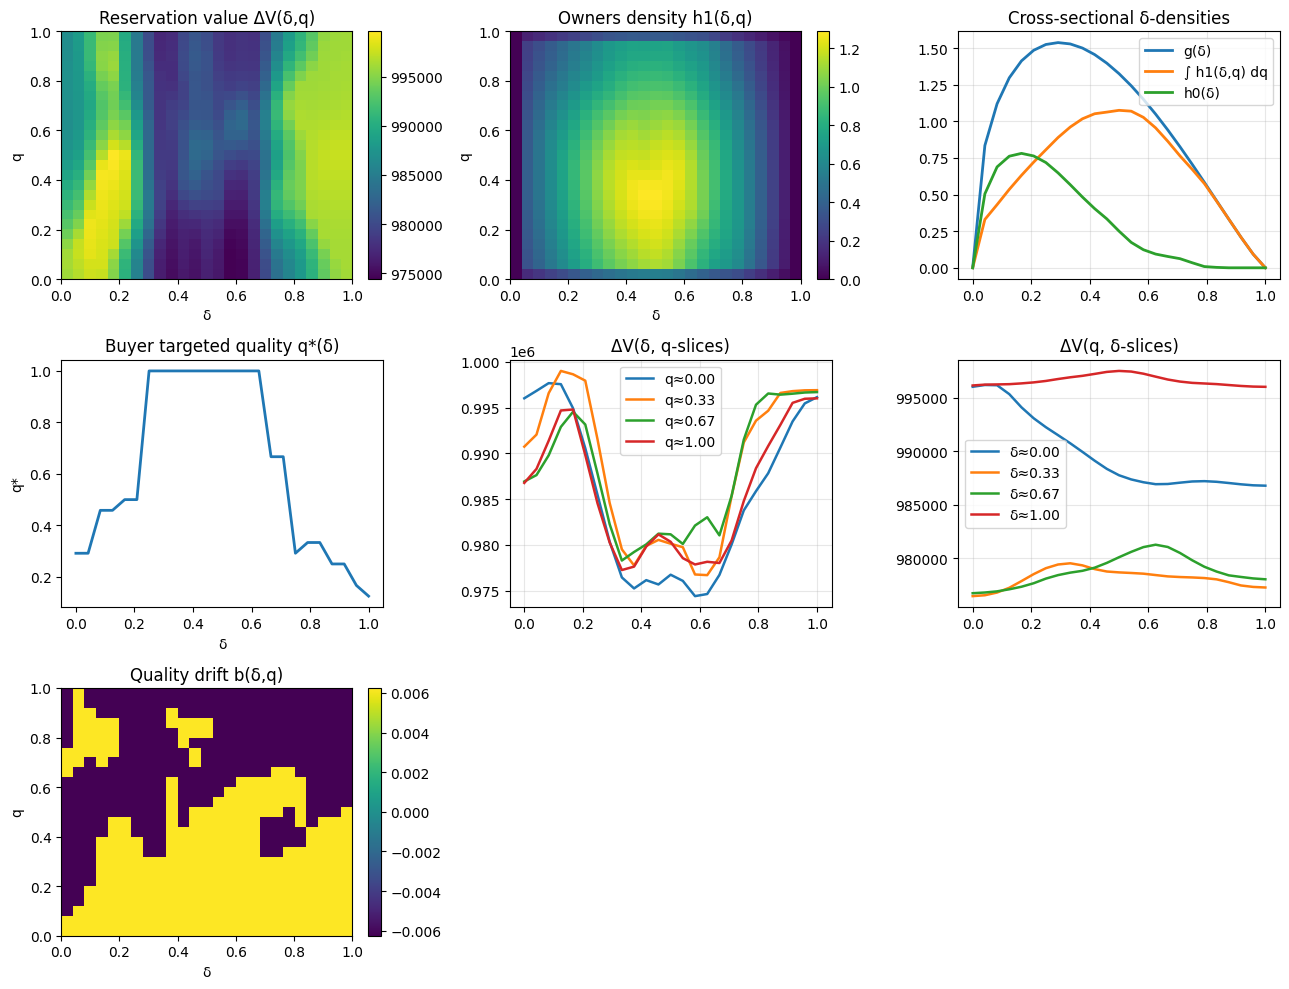

In [18]:
if __name__ == "__main__":
    # --- SPEED PROFILE: coarse grids + well-conditioned solves ---
    p = Params(
        # Econ (same as your data-ish calibration)
        r=0.0362, gamma=0.468305, rho=0.408321, s=0.6884,

        # Grids: coarsen aggressively for speed (≈ 625 unknowns total)
        dmin=0.0, dmax=1.0, N=25,
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=25,

        # Flows / buyer side
        phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6,
        # Softmax is slightly smoother than "parabolic" and avoids argmax kinks.
        # It tends to help outer convergence on coarse grids.
        softmax_tau=0.03, policy_mode="softmax",

        # Quality drift (keep economics intact)
        use_drift=True, delta_q=0.10, kappa_const=1.0, a_max=3.0,

        # Numerics: keep dt small-ish for better conditioning (faster solves overall)
        dt_hjb=6.0,          # smaller -> (r + 1/dt) larger diagonal; better conditioned HJB
        dt_kfe=2.0,          # smaller implicit step, fewer artifacts
        kfe_substeps=2,      # still implicit; 2 is enough at this resolution

        # Iterations: fewer inner/outer passes for "fast-check"
        max_iter_inner=60,   # per HJB call
        max_iter_outer=40,   # outer fixed-point

        # Tolerances: slightly looser for speed
        tol_V=5e-7, tol_h=5e-7,

        # Regularization: a tad higher smoothing speeds convergence on coarse grids
        nu_delta=2e-2,       # smooth along δ
        nu_q=2e-3,           # smooth along q

        # Diagonal nudges: bigger eps -> faster/safer factorization
        hjb_diag_eps=1e-4,
        kfe_diag_eps=1e-4,

        # Picard + damping
        hjb_picard_iters=2,  # fewer picard passes per HJB
        h0_floor=1e-14,
        omega_V=0.6          # a touch more damping than 0.5 helps monotonicity
    )

    t0 = time.perf_counter()
    out = solve_stationary_quality_with_drift(p, verbose=True)
    print(f"[drift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]; g = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:, None] * wq[None, :]))
    print(f"[drift] Mass owners = {mass_owners:.6f} (target {p.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    κ_total = trade_volume_total(p, h1, out["h0q"], wδ)
    print(f"[drift] Total trade volume κ = {κ_total:.6f}")

    # Plotting is the slowest part on some machines — keep it optional.
    plot_results(out)


In [19]:
# ========== DIAGNOSTICS (append after your code; do NOT modify solver) ==========

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def _ones_qmajor(Nd, Nq):
    return np.ones(Nd*Nq)

def _row_sums(A, Nd, Nq):
    # row sums of A (as operator on column vector of ones)
    return (A @ _ones_qmajor(Nd, Nq))

def _col_sums(A, Nd, Nq):
    # column sums = (A^T @ 1)
    return (A.transpose() @ _ones_qmajor(Nd, Nq))

def check_generator_props(name, A, Nd, Nq):
    rs = _row_sums(A, Nd, Nq)
    cs = _col_sums(A, Nd, Nq)
    print(f"[{name}] max|row sums| = {np.max(np.abs(rs)):.3e}, "
          f"max|col sums| = {np.max(np.abs(cs)):.3e}")
    return rs, cs

def check_sign_structure(name, A):
    # For a Markov generator used in KFE via A^T, off-diagonals should be >= 0,
    # diagonals <= 0 (up to regularization/Laplacian terms).
    Acoo = A.tocoo()
    mask_off = (Acoo.row != Acoo.col)
    min_off = np.min(Acoo.data[mask_off]) if np.any(mask_off) else np.nan
    max_diag = np.max(Acoo.data[~mask_off]) if np.any(~mask_off) else np.nan
    print(f"[{name}] min offdiag = {min_off:.3e}, max diag = {max_diag:.3e}")

def diag_dominance_report(name, A):
    Acsr = A.tocsr()
    diag = Acsr.diagonal()
    offsum = (np.abs(Acsr)).sum(axis=1).A.ravel() - np.abs(diag)
    ratio = np.where(offsum>0, np.abs(diag)/offsum, np.inf)
    print(f"[{name}] Gershgorin diag/offs "
          f"max={np.max(ratio):.3e}, min={np.min(ratio):.3e}, median={np.median(ratio):.3e}")


def try_factorization(label, M):
    try:
        n = M.shape[0]
        rhs = np.random.default_rng(0).standard_normal(n)
        x = spla.spsolve(M, rhs)
        ok = np.all(np.isfinite(x))
        print(f"[{label}] solve ok={ok}, ||x||={np.linalg.norm(x):.3e}")
    except Exception as e:
        print(f"[{label}] FAILED: {type(e).__name__}: {e}")

def first_nonfinite(name, arr):
    if isinstance(arr, sp.spmatrix):
        data = arr.data
        if not np.all(np.isfinite(data)):
            print(f"[{name}] sparse data has non-finites.")
        else:
            print(f"[{name}] sparse data all finite.")
        return
    bad = ~np.isfinite(arr)
    if np.any(bad):
        idx = np.argwhere(bad)
        print(f"[{name}] found non-finite at {tuple(idx[0])}")
    else:
        print(f"[{name}] all finite.")

# --- Build one iteration's objects on a small grid to test invariants ---
p_test = Params(
    r=0.0362, gamma=0.468305, rho=0.408321, s=0.4,
    dmin=0.0, dmax=1.0, N=15,
    beta_a=1.5, beta_b=2.2,
    qmin=0.0, qmax=1.0, Nq=13,
    phi_linear=1.0,
    psi_eta=0.02, psi_qstar=0.6,
    softmax_tau=0.0, policy_mode="parabolic",
    dt_hjb=10.0, dt_kfe=2.5, kfe_substeps=1,
    max_iter_inner=1, max_iter_outer=1,
    tol_V=1e-9, tol_h=1e-9,
    nu_delta=1e-3, nu_q=1e-3,
    use_drift=True, delta_q=0.1, kappa_const=1.0, a_max=3.0,
    hjb_diag_eps=1e-6, kfe_diag_eps=1e-6,
    hjb_picard_iters=1, h0_floor=1e-14,
    omega_V=0.7
)

# Recreate the first-iteration state without looping:
δ, wδ = make_grid(p_test.N, p_test.dmin, p_test.dmax)
q, wq = make_grid(p_test.Nq, p_test.qmin, p_test.qmax)
g, G = beta_pdf_cdf_on_interval(δ, wδ, a=p_test.beta_a, b=p_test.beta_b, lo=p_test.dmin, hi=p_test.dmax)
phi_q = p_test.phi_linear * q

S0 = np.ones_like(q) / np.sum(wq)
h1_0 = (p_test.s * np.outer(g, S0))
Δ_0  = (δ[:,None] * phi_q[None,:]) / (p_test.r + p_test.gamma + 0.08)

# buyers
h0 = np.maximum(g - (h1_0 @ wq), 0.0)
h0q, Gmap, qstar = buyer_policy_update_using_DeltaV(
    Δ_0, h1_0, h0, δ, q, wδ,
    psi_eta=p_test.psi_eta, psi_qstar=p_test.psi_qstar,
    softmax_tau=p_test.softmax_tau, smooth_G_passes=1,
    policy_mode=p_test.policy_mode, h0_floor=p_test.h0_floor
)

# drift (with clipping inside b_from_Delta if you added it)
b_now, p_shadow = b_from_Delta(Δ_0, q, p_test)

# matrices
A_now = build_A_matrix_2d_qmajor(h1_0, h0q, g, wδ, q, p_test.rho, p_test.gamma,
                                 b=b_now,
                                 nu_delta=p_test.nu_delta, delta_grid=δ, nu_q=p_test.nu_q)
I = sp.eye(Nd*Nq_, format='csr')
dts = p_test.dt_kfe / max(1, p_test.kfe_substeps)

M_kfe = I - dts * A_now.transpose() + p_test.kfe_diag_eps * I
M_hjb = (p_test.r + 1.0/p_test.dt_hjb)*I - A_now + p_test.hjb_diag_eps*I

try_factorization("KFE M", M_kfe)
try_factorization("HJB M", M_hjb)


Nd, Nq_ = p_test.N, p_test.Nq

print("\n=== FINITENESS CHECKS ===")
first_nonfinite("Δ_0", Δ_0)
first_nonfinite("h1_0", h1_0)
first_nonfinite("h0q", h0q)
first_nonfinite("b_now", b_now)
first_nonfinite("A_now", A_now)

print("\n=== DRIFT SCALE vs TIME STEPS ===")
dq_min = np.min(np.diff(q)) if q.size>1 else 1.0
print(f"max|b| = {np.max(np.abs(b_now)):.3e}")
print(f"dq_min/dt_hjb = {dq_min/p_test.dt_hjb:.3e}, dq_min/dt_kfe = {dq_min/p_test.dt_kfe:.3e}")

print("\n=== GENERATOR PROPERTIES ===")
# B only
B_only = apply_upwind_drift_matrix(q, b_now)
check_generator_props("B_only", B_only, Nd, Nq_)
check_generator_props("A_now",  A_now,  Nd, Nq_)

print("\n=== SIGN STRUCTURE / DIAG DOMINANCE (A_now) ===")
check_sign_structure("A_now", A_now)
diag_dominance_report("A_now", A_now)

print("\n=== FACTORIZATION PROBES ===")
# One implicit KFE substep
dts = p_test.dt_kfe / max(1, p_test.kfe_substeps)
I = sp.eye(Nd*Nq_, format='csr')
M_kfe = I - dts * A_now.transpose()
M_kfe = M_kfe + p_test.kfe_diag_eps * I
try_factorization("KFE M", M_kfe)

# One HJB picard linear system with current A
M_hjb = (p_test.r + 1.0/p_test.dt_hjb)*I - A_now + p_test.hjb_diag_eps*I
try_factorization("HJB M", M_hjb)

print("\n=== BOUNDARY ROWS OF B (q-advection) ===")
Bcsr = B_only.tocsr()
rowsums_B = _row_sums(B_only, Nd, Nq_).reshape(Nq_, Nd)  # reshape per q-slice
print("row-sum at left-q boundary slice (k=0):",
      np.max(np.abs(rowsums_B[0])))
print("row-sum at right-q boundary slice (k=Nq-1):",
      np.max(np.abs(rowsums_B[-1])))


[KFE M] solve ok=True, ||x||=4.679e+00
[HJB M] solve ok=True, ||x||=2.032e+01

=== FINITENESS CHECKS ===
[Δ_0] all finite.
[h1_0] all finite.
[h0q] all finite.
[b_now] all finite.
[A_now] sparse data all finite.

=== DRIFT SCALE vs TIME STEPS ===
max|b| = 7.500e-03
dq_min/dt_hjb = 8.333e-03, dq_min/dt_kfe = 3.333e-02

=== GENERATOR PROPERTIES ===
[B_only] max|row sums| = 0.000e+00, max|col sums| = 9.000e-02
[A_now] max|row sums| = 2.498e-16, max|col sums| = 1.000e+00

=== SIGN STRUCTURE / DIAG DOMINANCE (A_now) ===
[A_now] min offdiag = 2.894e-16, max diag = -9.603e-01
[A_now] Gershgorin diag/offs max=1.000e+00, min=1.000e+00, median=1.000e+00

=== FACTORIZATION PROBES ===
[KFE M] solve ok=True, ||x||=4.679e+00
[HJB M] solve ok=True, ||x||=2.032e+01

=== BOUNDARY ROWS OF B (q-advection) ===
row-sum at left-q boundary slice (k=0): 0.0
row-sum at right-q boundary slice (k=Nq-1): 0.0


[drift iter   1] dV=9.976e+05  dh=4.206e-01
[drift iter  10] dV=1.311e+04  dh=1.682e-01
[drift iter  20] dV=1.513e+04  dh=1.430e-01
[drift iter  30] dV=1.179e+04  dh=1.209e-01
[drift iter  40] dV=1.225e+04  dh=2.259e-01
[drift iter  50] dV=2.951e+04  dh=1.780e-01
[drift iter  60] dV=1.652e+04  dh=1.590e-01
[drift] Solve time = 1005.476 s
[drift] Mass owners = 0.688400 (target 0.6884) ; non-owners = 0.311600
[drift] Total trade volume κ = 0.020097


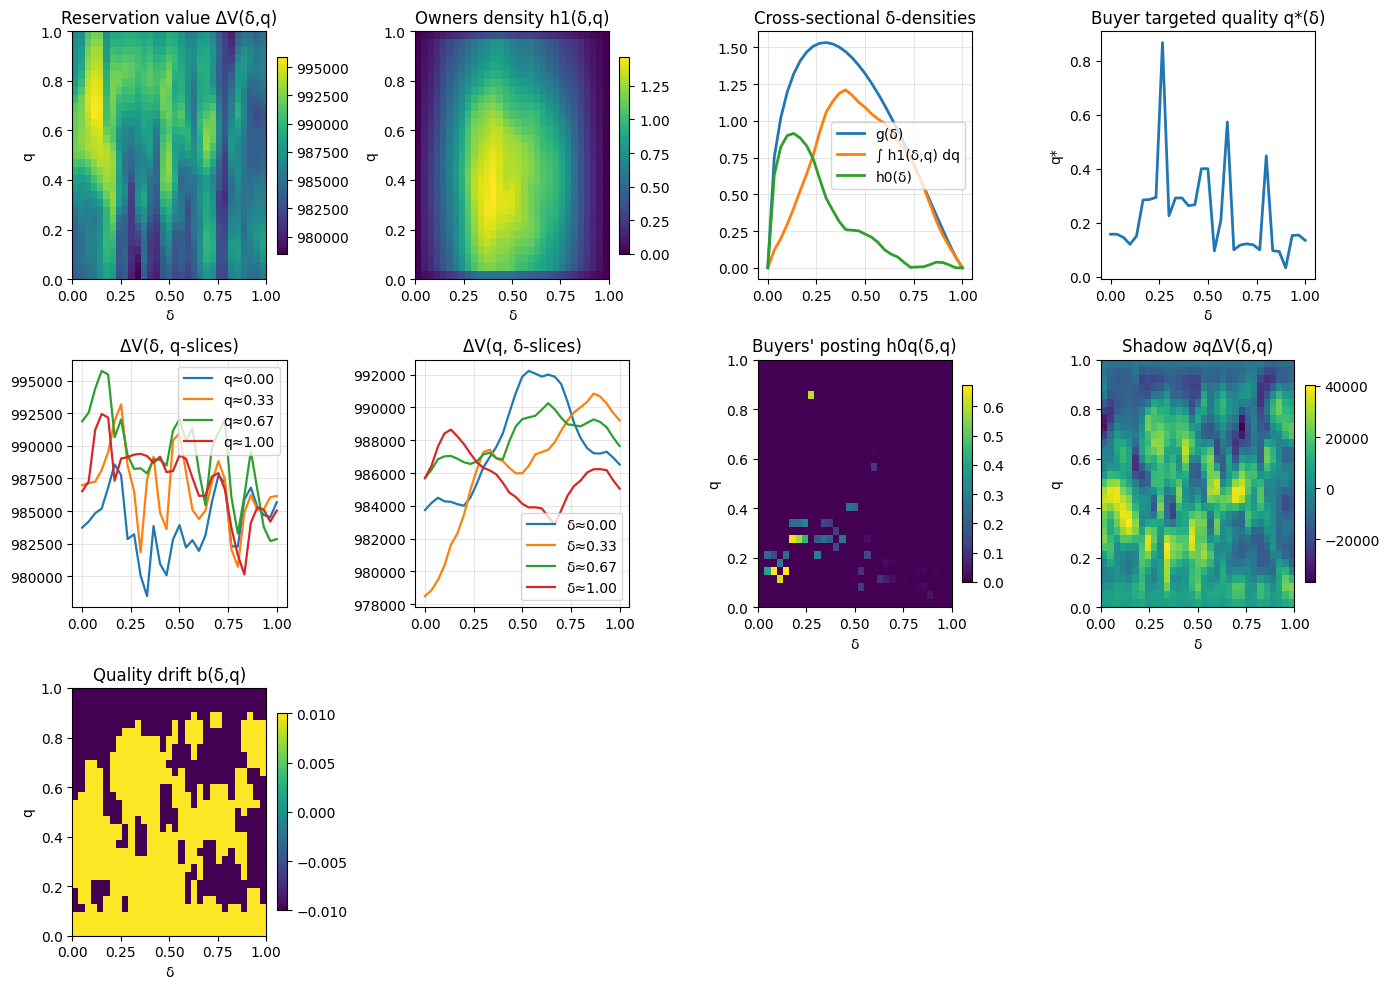

In [21]:
# =========================
# Model 3 (stable-fast): Directed search with endogenous quality drift
# q-major stacking, upwind advection, simple regularization
# Key fixes:
#  (1) CFL cap for b uses dt_kfe (not dt_hjb),
#  (2) default policy back to "parabolic" (softmax optional),
#  (3) adaptive damping for Δ to avoid stalls/oscillations.
# =========================

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt
import copy, time

# -----------------
# Parameters
# -----------------
@dataclass
class Params:
    # Econ
    r: float = 0.05
    gamma: float = 0.20       # type reset rate
    rho: float = 0.50         # meeting rate
    s: float = 0.40           # housing stock share

    # δ grid
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 201

    beta_a: float = 2.0
    beta_b: float = 5.0

    # q grid
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 81

    # Flows
    phi_linear: float = 1.0   # φ(q) = phi_linear * q

    # Directed search cost ψ(q)=0.5*eta*(q-q_star)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6

    # Buyer choice (default back to parabolic; softmax optional)
    softmax_tau: float = 0.0
    policy_mode: str = "parabolic"    # "parabolic" or "softmax"

    # Quality dynamics (owner’s control)
    use_drift: bool = True
    delta_q: float = 0.10             # depreciation in q
    kappa_const: float = 1.0          # c(a,q)=0.5*kappa a^2
    a_max: float = 3.0                # cap on |a*|

    # Numerics
    dt_hjb: float = 40.0
    dt_kfe: float = 10.0
    kfe_substeps: int = 4
    max_iter_inner: int = 60
    max_iter_outer: int = 80
    tol_V: float = 1e-7
    tol_h: float = 1e-7

    # Small regularization (Neumann)
    nu_delta: float = 1e-2
    nu_q: float = 1e-3

    # Tiny diagonals for linear systems
    hjb_diag_eps: float = 1e-10
    kfe_diag_eps: float = 1e-10

    # HJB Picard
    hjb_picard_iters: int = 3

    # Safety floors
    h0_floor: float = 1e-14

    # Under-relaxation
    omega_V: float = 0.6        # base mix for Δ (will be adapted)
    omega_h: float = 0.6        # owners density mixing
    omega_h0q: float = 0.6      # buyers posting mixing

    # Smoothing passes for ΔV in q before ∂q (keeps b tame)
    smooth_p_passes: int = 1


# -----------------
# Grids & Beta PDF
# -----------------
def make_grid(N, a=0.0, b=1.0):
    grid = np.linspace(a, b, N)
    h = (b - a) / (N - 1) if N > 1 else 1.0
    w = np.full(N, h)
    if N > 1:
        w[0] *= 0.5
        w[-1] *= 0.5
    return grid, w

def beta_pdf_cdf_on_interval(grid, w, a=2.0, b=5.0, lo=0.0, hi=1.0):
    x = (grid - lo) / max(hi - lo, 1e-14)
    x = np.clip(x, 1e-12, 1 - 1e-12)
    from math import gamma as Gamma
    B = Gamma(a) * Gamma(b) / Gamma(a + b)
    pdf_unit = (x**(a - 1) * (1 - x)**(b - 1)) / B
    g = pdf_unit / max(hi - lo, 1e-14)
    g = g / (g @ w)
    G = np.cumsum(g * w)
    return g, G


# -----------------
# Neumann Laplacians (1D)
# -----------------
def build_neumann_laplacian_1d(grid):
    N = grid.size
    if N <= 1:
        return sp.csr_matrix((N, N))
    h = grid[1] - grid[0]
    invh2 = 1.0 / (h*h)
    rows, cols, data = [], [], []
    # left (reflecting)
    rows += [0, 0]; cols += [0, 1]; data += [-2*invh2, 2*invh2]
    # interior
    for i in range(1, N-1):
        rows += [i, i, i]; cols += [i-1, i, i+1]; data += [invh2, -2*invh2, invh2]
    # right (reflecting)
    rows += [N-1, N-1]; cols += [N-2, N-1]; data += [2*invh2, -2*invh2]
    return sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()


# -----------------
# q-smoothing & q-derivative
# -----------------
def smooth_in_q(F, passes=1):
    if passes <= 0: return F
    G = F.copy()
    for _ in range(passes):
        G[:,1:-1] = 0.25*G[:,0:-2] + 0.5*G[:,1:-1] + 0.25*G[:,2:]
        G[:,0]    = 0.5*G[:,0]     + 0.5*G[:,1]
        G[:,-1]   = 0.5*G[:,-1]    + 0.5*G[:,-2]
    return G

def Dq_centered(F, qgrid):
    Nδ, Nq = F.shape
    D = np.zeros_like(F)
    if Nq == 1:
        return D
    D[:, 1:-1] = (F[:, 2:] - F[:, :-2]) / (qgrid[2:] - qgrid[:-2])
    D[:, 0]    = (F[:, 1]  - F[:, 0])  / (qgrid[1]  - qgrid[0])
    D[:, -1]   = (F[:, -1] - F[:, -2]) / (qgrid[-1] - qgrid[-2])
    return D

def apply_upwind_drift_matrix(qgrid, b):
    """
    Build sparse matrix B so (B f)_{i,k} ≈ b_{i,k} * ∂_q f|_{i,k}
    q-major stacking: (i,k) -> k*Nδ + i.
    Reflecting at q bounds to keep A·1 = 0.
    """
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []

    def idx(i,k): return k*Nδ + i
    if Nq == 1: return sp.csr_matrix((Nδ, Nδ))

    dqL = np.empty(Nq); dqR = np.empty(Nq)
    dqL[0]  = qgrid[1] - qgrid[0]
    dqR[-1] = qgrid[-1] - qgrid[-2]
    for k in range(1, Nq):   dqL[k] = qgrid[k]   - qgrid[k-1]
    for k in range(0, Nq-1): dqR[k] = qgrid[k+1] - qgrid[k]

    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i, k]; r = idx(i, k)
            if bij > 0.0:
                if k == 0: continue
                inv = 1.0 / dqL[k]
                rows += [r, r]; cols += [r, idx(i,k-1)]; data += [ +bij*inv, -bij*inv ]
            elif bij < 0.0:
                if k == Nq-1: continue
                inv = 1.0 / dqR[k]
                rows += [r, r]; cols += [r, idx(i,k+1)]; data += [ -bij*inv, +bij*inv ]
    return sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()


# -----------------
# Meeting operator in δ (triangular) — exact row-sum zero per q-slice
# -----------------
def build_T_meetings_slice(h1_slice, h0q_slice, wδ):
    N = h1_slice.size
    h0w = h0q_slice * wδ
    h1w = h1_slice  * wδ
    rows, cols, data = [], [], []

    # inflows (buyers above)
    for j in range(1, N):
        i_idx = np.arange(0, j)
        rows.extend(i_idx.tolist()); cols.extend([j]*j); data.extend([+h0w[j]]*j)
    # outflows (owners sell to buyers above)
    for j in range(0, N-1):
        i_idx = np.arange(j+1, N)
        rows.extend(i_idx.tolist()); cols.extend([j]*(N-j-1)); data.extend([-h1w[j]]*(N-j-1))

    T_off = sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()
    off_row_sum = np.array(T_off.sum(axis=1)).ravel()
    rows += list(range(N)); cols += list(range(N)); data += (-off_row_sum).tolist()
    return sp.coo_matrix((data, (rows, cols)), shape=(N, N)).tocsr()


# -----------------
# Generator A(h1,h0q,b)
# -----------------
def build_A_matrix_2d_qmajor(h1, h0q, g, wδ, qgrid, rho, gamma, b=None,
                             nu_delta=0.0, delta_grid=None, nu_q=0.0):
    """
    A = B(b) + Reset + (rho/2)*Meet  + nu_delta*Δ_δ + nu_q*Δ_q
    q-major stacking
    """
    Nδ, Nq = h1.shape
    one = np.ones(Nδ)

    # Reset block on each q-slice
    gw = g*wδ; gw = gw/np.sum(gw)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    R_slice  = gamma * (Pi_slice - sp.eye(Nδ, format='csr'))
    Reset = sp.block_diag([R_slice]*Nq, format='csr')

    # Meeting operator (per q-slice)
    T_blocks = [build_T_meetings_slice(h1[:, k], h0q[:, k], wδ) for k in range(Nq)]
    Meet = (rho/2.0) * sp.block_diag(T_blocks, format='csr')

    # Drift in q
    B = sp.csr_matrix((Nδ*Nq, Nδ*Nq)) if (b is None) else apply_upwind_drift_matrix(qgrid, b)

    A = B + Reset + Meet

    # Regularization Laplacians (Neumann)
    if nu_delta and nu_delta > 0.0:
        assert delta_grid is not None
        Lδ = build_neumann_laplacian_1d(delta_grid)
        A += nu_delta * sp.kron(sp.eye(Nq, format='csr'), Lδ, format='csr')

    if nu_q and nu_q > 0.0:
        Lq = build_neumann_laplacian_1d(qgrid)
        A += nu_q * sp.kron(Lq, sp.eye(Nδ, format='csr'), format='csr')

    return A.tocsr()


# -----------------
# Buyer objective and policy
# -----------------
def _parabolic_vertex(qm, q0, qp, Gm, G0, Gp):
    denom = (Gm - 2.0*G0 + Gp)
    if abs(denom) < 1e-14:
        return q0
    return q0 + 0.5*(Gm - Gp) * ((q0 - qm)*(qp - q0) / denom) / ((qp - qm)/2.0)

def _continuous_q_star_and_weights(G_row, qgrid):
    Nq = qgrid.size
    dG = np.zeros(Nq)
    if Nq >= 3:
        dG[1:-1] = (G_row[2:] - G_row[:-2]) / (qgrid[2:] - qgrid[:-2])
        dG[0] = (G_row[1]-G_row[0]) / (qgrid[1]-qgrid[0])
        dG[-1]= (G_row[-1]-G_row[-2]) / (qgrid[-1]-qgrid[-2])
    k0 = None
    for k in range(1, Nq-1):
        if dG[k-1] >= 0.0 and dG[k] <= 0.0:
            k0 = k; break
    if k0 is not None and 1 <= k0 <= Nq-2:
        qm,q0,qp = qgrid[k0-1], qgrid[k0], qgrid[k0+1]
        Gm,G0,Gp = G_row[k0-1], G_row[k0], G_row[k0+1]
        qstar = _parabolic_vertex(qm,q0,qp,Gm,G0,Gp)
        qstar = min(max(qstar, qm), qp)
        t = (qstar - qm) / (qp - qm + 1e-15)
        return qstar, k0-1, k0+1, (1.0 - t), t
    # boundary fallback
    if G_row[0] >= G_row[-1]:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[0], qgrid[1], qgrid[2],
                                      G_row[0], G_row[1], G_row[2])
            qstar = min(max(qstar, qgrid[0]), qgrid[2])
            t = (qstar - qgrid[0]) / (qgrid[2] - qgrid[0] + 1e-15)
            return qstar, 0, 2, (1.0 - t), t
        else:
            return qgrid[0], 0, 0, 1.0, 0.0
    else:
        if Nq >= 3:
            qstar = _parabolic_vertex(qgrid[-3], qgrid[-2], qgrid[-1],
                                      G_row[-3], G_row[-2], G_row[-1])
            qstar = min(max(qstar, qgrid[-3]), qgrid[-1])
            t = (qstar - qgrid[-3]) / (qgrid[-1] - qgrid[-3] + 1e-15)
            return qstar, Nq-3, Nq-1, (1.0 - t), t
        else:
            return qgrid[-1], Nq-1, Nq-1, 1.0, 0.0

def buyer_policy_update_using_DeltaV(DeltaV, h1, h0, dgrid, qgrid, wδ,
                                     psi_eta, psi_qstar,
                                     softmax_tau=0.0, smooth_G_passes=1,
                                     policy_mode="parabolic",
                                     h0_floor=1e-12):
    Nδ, Nq = DeltaV.shape
    psi = 0.5*psi_eta*(qgrid - psi_qstar)**2

    Hcum  = np.cumsum(h1 * wδ[:, None], axis=0)
    HVcum = np.cumsum(h1 * DeltaV * wδ[:, None], axis=0)

    G = np.empty((Nδ, Nq))
    for i in range(Nδ):
        mass_below = Hcum[i-1, :] if i > 0 else 0.0
        v_below    = HVcum[i-1, :] if i > 0 else 0.0
        G[i, :] = DeltaV[i, :] * mass_below - v_below - psi

    if smooth_G_passes and smooth_G_passes > 0:
        for _ in range(smooth_G_passes):
            G[1:-1, :] = 0.25*G[:-2, :] + 0.5*G[1:-1, :] + 0.25*G[2:, :]
            G[0, :]    = 0.5*G[0, :]    + 0.5*G[1, :]
            G[-1, :]   = 0.5*G[-1, :]   + 0.5*G[-2, :]

    if policy_mode == "softmax" and softmax_tau > 1e-12:
        expG = np.exp((G - G.max(axis=1, keepdims=True)) / softmax_tau)
        weights = expG / np.maximum(expG.sum(axis=1, keepdims=True), 1e-300)
        h0_safe = np.maximum(h0, h0_floor)
        h0q = h0_safe[:, None] * weights
        qstar_cont = (weights * qgrid[None, :]).sum(axis=1)
        return h0q, G, qstar_cont

    # parabolic (default)
    h0q = np.zeros_like(DeltaV)
    qstar_cont = np.zeros(Nδ)
    for i in range(Nδ):
        h0i = max(h0[i], h0_floor)
        qstar, kL, kR, wL, wR = _continuous_q_star_and_weights(G[i, :], qgrid)
        qstar_cont[i] = qstar
        if kL == kR:
            h0q[i, kL] += h0i
        else:
            h0q[i, kL] += h0i*wL
            h0q[i, kR] += h0i*wR
    return h0q, G, qstar_cont


# -----------------
# Projections & KFE
# -----------------
def project_h1_nonneg_and_rowcaps(h1, g, wq, tol=1e-12):
    h1 = np.maximum(h1, 0.0)
    row_mass = h1 @ wq
    scale = np.ones_like(row_mass)
    mask_over = row_mass > (g + tol)
    safe_mass = np.maximum(row_mass, 1e-16)
    scale[mask_over] = g[mask_over] / safe_mass[mask_over]
    return (h1.T * scale).T

def renormalize_total_owners(h1, wδ, wq, s, tol=1e-12):
    mass = np.sum(h1 * (wδ[:, None] * wq[None, :]))
    if not np.isfinite(mass) or abs(mass - s) <= tol or mass <= 1e-16:
        return h1
    return h1 * (s / mass)

def renormalize_total_owners_with_caps(h1, g, wδ, wq, s, tol=1e-12, max_iter=60):
    h1 = np.maximum(h1, 0.0)
    m = h1 @ wq
    G_cap = np.sum(g * wδ)
    assert G_cap >= s - 1e-14, "Infeasible: total mass target exceeds caps."
    M = np.sum(m * wδ)
    if np.max(m - g) <= tol and abs(M - s) <= tol:
        return h1

    def total_mass_at(lmb): return np.sum(np.minimum(g, lmb*m) * wδ)
    lo, hi = 0.0, 1.0
    while total_mass_at(hi) < s:
        hi *= 2.0
        if hi > 1e16:
            h1_cap = (h1.T * np.where(m > 0, g/np.maximum(m, 1e-16), 0.0)).T
            return renormalize_total_owners(h1_cap, wδ, wq, s)

    for _ in range(max_iter):
        mid = 0.5*(lo+hi)
        M_mid = total_mass_at(mid)
        if abs(M_mid - s) <= tol: break
        if M_mid < s: lo = mid
        else:         hi = mid
    s_row = np.minimum(0.5*(lo+hi), g/np.maximum(m, 1e-16))
    h1_new = (h1.T * s_row).T
    h1_new[h1_new < 0.0] = 0.0
    return renormalize_total_owners(h1_new, wδ, wq, s)

def kfe_implicit_substeps(A, h1, g, wδ, wq, s, dt, n_sub=4, diag_eps=1e-12):
    Ndof = h1.size
    if dt == 0 or (hasattr(A, "nnz") and A.nnz == 0) or n_sub <= 0:
        return h1
    h1 = np.nan_to_num(h1, nan=0.0, posinf=0.0, neginf=0.0)
    dts = dt / n_sub
    I = sp.eye(Ndof, format='csr')
    M = I - dts * A.transpose()
    if diag_eps and diag_eps > 0.0:
        M = M + diag_eps*I
    x = h1.reshape(-1)
    for _ in range(n_sub):
        x = spla.spsolve(M, x)
        x = np.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)
    h1_lin = x.reshape(h1.shape)
    h1_lin[h1_lin < 0.0] = 0.0
    return renormalize_total_owners_with_caps(h1_lin, g, wδ, wq, s, tol=1e-12)


# -----------------
# Cost / conjugate / drift helpers (quadratic with |a|<=a_max)
# -----------------
def kappa_vector(params: Params, qgrid):
    if np.isscalar(params.kappa_const):
        return np.full(qgrid.size, float(params.kappa_const))
    v = np.asarray(params.kappa_const, float)
    assert v.size == qgrid.size, "kappa_const must be scalar or size Nq."
    return v

def c_star_huber(p, kappa_q, a_max):
    k = kappa_q[None, :]
    T = k * a_max
    abs_p = np.abs(p)
    quad = 0.5 * (p**2) / (k + 1e-300)
    lin  = a_max*abs_p - 0.5 * k * (a_max**2)
    return np.where(abs_p <= T, quad, lin)

def a_star_clamped(p, kappa_q, a_max):
    a = p / (kappa_q[None, :] + 1e-300)
    return np.clip(a, -a_max, a_max)

def b_from_Delta(DeltaV, qgrid, params: Params):
    if not params.use_drift:
        return np.zeros_like(DeltaV), np.zeros_like(DeltaV)
    Δ_smooth = smooth_in_q(DeltaV, passes=params.smooth_p_passes)
    p = Dq_centered(Δ_smooth, qgrid)  # ∂qΔ (smoothed)
    kq = kappa_vector(params, qgrid)
    a_star = a_star_clamped(p, kq, params.a_max)
    b = a_star - params.delta_q * qgrid[None, :]

    # ---- FIX: CFL cap tied to dt_kfe (advection in KFE) ----
    dq_min = np.min(np.diff(qgrid)) if qgrid.size > 1 else 1.0
    cap = 0.9 * dq_min / max(params.dt_kfe, 1e-12)
    b = np.clip(b, -cap, +cap)

    return b, p


# -----------------
# HJB implicit with drift (Picard on b and RHS terms)
# -----------------
def hjb_implicit_solve_with_drift(A_builder, params, dgrid, qgrid,
                                  DeltaV_init, h1_for_A, h0q_for_A,
                                  tol=1e-9, max_iter=60, picard_iters=3,
                                  omegaV_base=0.6):
    Nδ = dgrid.size; Nq = qgrid.size
    Ndof = Nδ*Nq
    I = sp.eye(Ndof, format='csr')
    phi_q = params.phi_linear * qgrid
    RHS_base = np.outer(dgrid, phi_q)

    Δ = np.nan_to_num(DeltaV_init.copy(), nan=0.0, posinf=0.0, neginf=0.0)
    max_abs_clip = 1e6
    dv_prev = np.inf
    omegaV = float(omegaV_base)

    for _outer in range(max_iter):
        Δ_prev = Δ.copy()
        for _ in range(max(1, picard_iters)):
            np.nan_to_num(Δ, copy=False)
            Δ = np.clip(Δ, -max_abs_clip, max_abs_clip)

            b, p = b_from_Delta(Δ, qgrid, params)
            A = A_builder(h1_for_A, h0q_for_A, b)

            M = (params.r + 1.0/params.dt_hjb)*I - A
            if params.hjb_diag_eps and params.hjb_diag_eps > 0.0:
                M = M + params.hjb_diag_eps*I

            kq = kappa_vector(params, qgrid)
            cstar = c_star_huber(p, kq, params.a_max) if params.use_drift else 0.0

            rhs = RHS_base + cstar + (1.0/params.dt_hjb)*Δ
            rhs = np.nan_to_num(rhs, nan=0.0, posinf=0.0, neginf=0.0)

            Δ_new = spla.spsolve(M, rhs.reshape(-1)).reshape(Nδ, Nq)
            Δ_new = np.nan_to_num(Δ_new, nan=0.0, posinf=max_abs_clip, neginf=-max_abs_clip)
            Δ_new = np.clip(Δ_new, -max_abs_clip, max_abs_clip)

            # ---- adaptive damping on Δ ----
            trial = omegaV*Δ_new + (1.0 - omegaV)*Δ
            dv_now = np.max(np.abs(trial - Δ))
            if dv_now > 0.95*dv_prev:
                omegaV = max(0.15, 0.6*omegaV)   # back off
                trial  = omegaV*Δ_new + (1.0 - omegaV)*Δ
            else:
                omegaV = min(0.8, omegaV*1.05)   # gently increase
            Δ = trial
            dv_prev = dv_now

        if np.max(np.abs(Δ - Δ_prev)) < tol:
            return Δ
    return Δ


# -----------------
# Outer fixed-point
# -----------------
def solve_stationary_quality_with_drift(params: Params, warm=None, verbose=True):
    p = copy.deepcopy(params)
    δ_grid, wδ = make_grid(p.N, p.dmin, p.dmax)
    q_grid, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g, G = beta_pdf_cdf_on_interval(δ_grid, wδ, a=p.beta_a, b=p.beta_b,
                                    lo=p.dmin, hi=p.dmax)

    if warm is not None and all(k in warm for k in ["h1", "DeltaV"]):
        h1 = project_h1_nonneg_and_rowcaps(np.maximum(warm["h1"].copy(), 0.0), g, wq)
        h1 = renormalize_total_owners(h1, wδ, wq, p.s)
        Δ = warm["DeltaV"].copy()
    else:
        S0 = np.ones_like(q_grid) / np.sum(wq)
        h1 = (p.s * np.outer(g, S0))
        phi_q = p.phi_linear * q_grid
        Δ = (δ_grid[:, None] * phi_q[None, :]) / (p.r + p.gamma + 0.08)

    def A_builder_given(h1_now, h0q_now, b_now=None):
        return build_A_matrix_2d_qmajor(h1_now, h0q_now, g, wδ, q_grid, p.rho, p.gamma,
                                        b=b_now if p.use_drift else None,
                                        nu_delta=p.nu_delta, delta_grid=δ_grid,
                                        nu_q=p.nu_q)

    h0q_prev = None
    for it in range(1, p.max_iter_outer+1):
        # Buyer policy
        h1_row = h1 @ wq
        h0 = np.maximum(g - h1_row, 0.0)
        h0q_raw, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
            Δ, h1, h0, δ_grid, q_grid, wδ,
            psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
            softmax_tau=p.softmax_tau, smooth_G_passes=1,
            policy_mode=p.policy_mode, h0_floor=p.h0_floor
        )
        # under-relax h0q
        h0q = h0q_raw if (h0q_prev is None) else p.omega_h0q*h0q_raw + (1.0-p.omega_h0q)*h0q_prev

        # KFE step
        b_now, _ = b_from_Delta(Δ, q_grid, p)
        A_now = A_builder_given(h1, h0q, b_now)
        h1_new_raw = kfe_implicit_substeps(A_now, h1, g, wδ, wq, p.s,
                                           dt=p.dt_kfe, n_sub=p.kfe_substeps,
                                           diag_eps=p.kfe_diag_eps)
        h1_new = p.omega_h*h1_new_raw + (1.0 - p.omega_h)*h1  # under-relax h1

        # HJB (Picard inside) with adaptive Δ damping
        Δ_new = hjb_implicit_solve_with_drift(
            A_builder=A_builder_given, params=p, dgrid=δ_grid, qgrid=q_grid,
            DeltaV_init=Δ, h1_for_A=h1_new, h0q_for_A=h0q,
            tol=p.tol_V, max_iter=p.max_iter_inner, picard_iters=p.hjb_picard_iters,
            omegaV_base=p.omega_V
        )

        dv = float(np.max(np.abs(Δ_new - Δ)))
        dh = float(np.max(np.abs(h1_new - h1)))
        if verbose and (it % 10 == 0 or it == 1):
            print(f"[drift iter {it:3d}] dV={dv:.3e}  dh={dh:.3e}")

        Δ, h1, h0q_prev = Δ_new, h1_new, h0q

        if dv < p.tol_V and dh < p.tol_h:
            if verbose:
                print(f"[drift] Converged in {it} iterations: dV={dv:.3e}, dh={dh:.3e}")
            break

    # final policy & operator (clean)
    h0 = np.maximum(g - (h1 @ wq), 0.0)
    h0q, Gmap, qstar_cont = buyer_policy_update_using_DeltaV(
        Δ, h1, h0, δ_grid, q_grid, wδ,
        psi_eta=p.psi_eta, psi_qstar=p.psi_qstar,
        softmax_tau=p.softmax_tau, smooth_G_passes=1,
        policy_mode=p.policy_mode, h0_floor=p.h0_floor
    )
    b_final, p_shadow = b_from_Delta(Δ, q_grid, p)
    A_mat = A_builder_given(h1, h0q, b_final)

    return {
        "delta_grid": δ_grid, "q_grid": q_grid, "wδ": wδ, "wq": wq,
        "g": g, "G": G, "h1": h1, "h0": h0, "h0q": h0q,
        "DeltaV": Δ, "A": A_mat, "params": p, "Gmap": Gmap,
        "qstar_cont": qstar_cont, "b": b_final, "p_q": p_shadow
    }


# -----------------
# Reporting
# -----------------
def trade_volume_total(params: Params, h1, h0q, wδ):
    Nδ, Nq = h1.shape; κ = 0.0
    for k in range(Nq):
        a = h1[:, k]*wδ; b = h0q[:, k]*wδ
        b_above = np.cumsum(b[::-1])[::-1]
        κ += np.sum(a[:-1] * b_above[:-1])
    return params.rho * κ

def plot_results(out):
    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]
    g  = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]; Gmap = out["Gmap"]
    qstar_cont = out.get("qstar_cont", None)
    b = out.get("b", None); h0q = out.get("h0q", None); p_q = out.get("p_q", None)

    fig = plt.figure(figsize=(14,10))
    gs = fig.add_gridspec(3,4)

    ax0 = fig.add_subplot(gs[0,0]); im0 = ax0.imshow(ΔV.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax0.set_title("Reservation value ΔV(δ,q)"); ax0.set_xlabel("δ"); ax0.set_ylabel("q")
    fig.colorbar(im0, ax=ax0, fraction=0.046)

    ax1 = fig.add_subplot(gs[0,1]); im1 = ax1.imshow(h1.T, origin='lower', aspect='auto',
                     extent=[δ[0], δ[-1], q[0], q[-1]])
    ax1.set_title("Owners density h1(δ,q)"); ax1.set_xlabel("δ"); ax1.set_ylabel("q")
    fig.colorbar(im1, ax=ax1, fraction=0.046)

    ax2 = fig.add_subplot(gs[0,2])
    h1_δ = h1 @ wq; h0 = g - h1_δ
    ax2.plot(δ, g, lw=2, label='g(δ)'); ax2.plot(δ, h1_δ, lw=2, label='∫ h1(δ,q) dq'); ax2.plot(δ, h0, lw=2, label='h0(δ)')
    ax2.set_title("Cross-sectional δ-densities"); ax2.legend(); ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[0,3])
    if qstar_cont is None:
        q_star_idx = np.argmax(Gmap, axis=1); ax3.plot(δ, q[q_star_idx], lw=2)
    else:
        ax3.plot(δ, qstar_cont, lw=2)
    ax3.set_title("Buyer targeted quality q*(δ)"); ax3.set_xlabel("δ"); ax3.set_ylabel("q*")

    ax4 = fig.add_subplot(gs[1,0])
    q_sel = np.linspace(q[0], q[-1], 4)
    for qq in q_sel:
        k = np.argmin(np.abs(q-qq)); ax4.plot(δ, ΔV[:, k], lw=1.6, label=f"q≈{q[k]:.2f}")
    ax4.set_title("ΔV(δ, q-slices)"); ax4.legend(); ax4.grid(alpha=0.3)

    ax5 = fig.add_subplot(gs[1,1])
    δ_sel = np.linspace(δ[0], δ[-1], 4)
    for dd in δ_sel:
        i = np.argmin(np.abs(δ-dd)); ax5.plot(q, ΔV[i, :], lw=1.6, label=f"δ≈{δ[i]:.2f}")
    ax5.set_title("ΔV(q, δ-slices)"); ax5.legend(); ax5.grid(alpha=0.3)

    ax6 = fig.add_subplot(gs[1,2])
    if h0q is not None:
        imh = ax6.imshow(h0q.T, origin='lower', aspect='auto', extent=[δ[0], δ[-1], q[0], q[-1]])
        ax6.set_title("Buyers' posting h0q(δ,q)"); ax6.set_xlabel("δ"); ax6.set_ylabel("q")
        fig.colorbar(imh, ax=ax6, fraction=0.046)
    else: ax6.axis('off')

    ax7 = fig.add_subplot(gs[1,3])
    if p_q is not None:
        imp = ax7.imshow(p_q.T, origin='lower', aspect='auto', extent=[δ[0], δ[-1], q[0], q[-1]])
        ax7.set_title("Shadow ∂qΔV(δ,q)"); ax7.set_xlabel("δ"); ax7.set_ylabel("q")
        fig.colorbar(imp, ax=ax7, fraction=0.046)
    else: ax7.axis('off')

    ax8 = fig.add_subplot(gs[2,0])
    if b is not None:
        imb = ax8.imshow(b.T, origin='lower', aspect='auto', extent=[δ[0], δ[-1], q[0], q[-1]])
        ax8.set_title("Quality drift b(δ,q)"); ax8.set_xlabel("δ"); ax8.set_ylabel("q")
        fig.colorbar(imb, ax=ax8, fraction=0.046)
    else: ax8.axis('off')

    plt.tight_layout(); plt.show()


# -----------------
# Example (FAST + conservative)
# -----------------
if __name__ == "__main__":
    # speed/robustness close to the profile you said *did* reach a fixed point
    p = Params(
        r=0.0362, gamma=0.468305, rho=0.408321, s=0.6884,
        dmin=0.0, dmax=1.0, N=31,             # modest grids (≈ 961 unknowns)
        beta_a=1.5, beta_b=2.2,
        qmin=0.0, qmax=1.0, Nq=31,
        phi_linear=1.0,
        psi_eta=0.02, psi_qstar=0.6,
        softmax_tau=0.0, policy_mode="parabolic",   # back to parabolic
        dt_hjb=8.0, dt_kfe=3.0, kfe_substeps=3,
        max_iter_inner=80, max_iter_outer=60,
        tol_V=2e-7, tol_h=2e-7,
        nu_delta=1e-2, nu_q=1e-3,
        use_drift=True, delta_q=0.10, kappa_const=1.0, a_max=3.0,
        hjb_diag_eps=1e-5, kfe_diag_eps=1e-5,
        hjb_picard_iters=3, h0_floor=1e-14,
        omega_V=0.6, omega_h=0.6, omega_h0q=0.6,
        smooth_p_passes=1
    )

    t0 = time.perf_counter()
    out = solve_stationary_quality_with_drift(p, verbose=True)
    print(f"[drift] Solve time = {time.perf_counter()-t0:.3f} s")

    δ = out["delta_grid"]; q = out["q_grid"]
    wδ = out["wδ"]; wq = out["wq"]; g = out["g"]
    h1 = out["h1"]; ΔV = out["DeltaV"]

    mass_owners = np.sum(h1 * (wδ[:, None] * wq[None, :]))
    print(f"[drift] Mass owners = {mass_owners:.6f} (target {p.s}) ; non-owners = {(1.0-mass_owners):.6f}")

    κ_total = trade_volume_total(p, h1, out["h0q"], wδ)
    print(f"[drift] Total trade volume κ = {κ_total:.6f}")

    plot_results(out)


[iter   1] dV1=3.151e-01  dh1=1.038e+00  mass=0.688400
[iter  10] dV1=2.000e+06  dh1=4.961e+00  mass=0.688400
[iter  20] dV1=2.000e+06  dh1=5.505e+00  mass=0.688400
[iter  30] dV1=2.000e+06  dh1=3.333e+00  mass=0.688400
[iter  40] dV1=2.000e+06  dh1=4.857e+00  mass=0.688400
[iter  50] dV1=2.000e+06  dh1=4.653e+00  mass=0.688400
[iter  60] dV1=1.998e+06  dh1=8.043e+00  mass=0.688400
[iter  70] dV1=2.000e+06  dh1=7.000e+00  mass=0.688400
[iter  80] dV1=2.000e+06  dh1=1.116e+01  mass=0.688400
[iter  90] dV1=2.000e+06  dh1=6.567e+00  mass=0.688400
[iter 100] dV1=2.000e+06  dh1=8.748e+00  mass=0.688400
[iter 110] dV1=2.000e+06  dh1=7.378e+00  mass=0.688400
[iter 120] dV1=1.998e+06  dh1=1.465e+01  mass=0.688400
[iter 130] dV1=2.000e+06  dh1=6.392e+00  mass=0.688400
[iter 140] dV1=1.998e+06  dh1=4.654e+00  mass=0.688400
[iter 150] dV1=2.000e+06  dh1=5.840e+00  mass=0.688400
[iter 160] dV1=1.982e+06  dh1=1.156e+01  mass=0.688400
[iter 170] dV1=2.000e+06  dh1=4.213e+00  mass=0.688400
[iter 180]

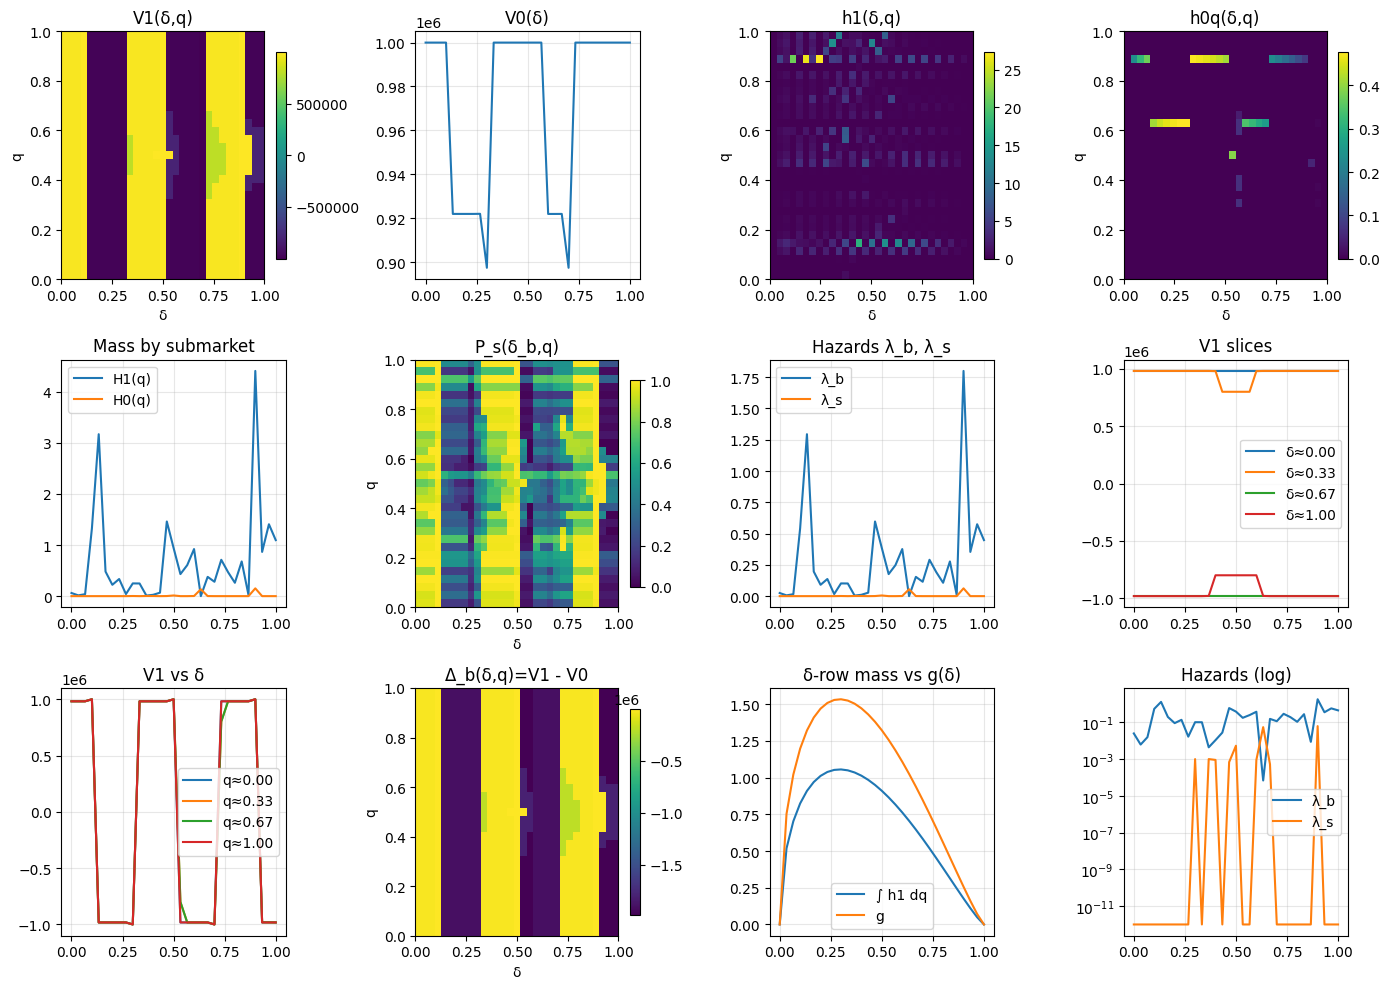

In [29]:
# ============================================
# Directed Search + Endogenous Quality Drift
# Consistent HJBs (no drift operator in HJB),
# Drift only in KFE, Nash acceptance (J >= 0)
# ============================================

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from dataclasses import dataclass
import matplotlib.pyplot as plt
import time
import copy

# -----------------
# Parameters
# -----------------
@dataclass
class Params:
    # Econ
    r: float = 0.0362
    gamma: float = 0.468305
    rho: float = 0.408321
    s: float = 0.6884
    beta_barg: float = 0.5   # buyer bargaining share β (acceptance uses J>=0)

    # Grids
    dmin: float = 0.0
    dmax: float = 1.0
    N: int = 31
    qmin: float = 0.0
    qmax: float = 1.0
    Nq: int = 31

    # Type density g ~ Beta(a,b) on [dmin,dmax]
    beta_a: float = 1.5
    beta_b: float = 2.2

    # Flows (tame the scale a bit)
    phi_linear: float = 0.10      # φ(q)=phi_linear*q  (smaller -> safer scale)

    # Buyer posting cost ψ(q)=0.5*eta*(q-q*)^2
    psi_eta: float = 0.02
    psi_qstar: float = 0.6

    # Quality dynamics (chosen by owners)
    delta_q: float = 0.10        # natural depreciation in q
    kappa_const: float = 1.0     # c(a)=0.5*kappa*a^2
    a_max: float = 3.0

    # Solver controls
    max_outer: int = 200
    tol_V: float = 2e-7
    tol_h: float = 2e-7

    # HJB (implicit step for stabilization)
    dt_hjb: float = 8.0

    # KFE (implicit) step
    dt_kfe: float = 3.0
    kfe_substeps: int = 3

    # Regularization
    nu_delta: float = 1e-2
    nu_q: float = 1e-3
    diag_eps_hjb: float = 1e-5
    diag_eps_kfe: float = 1e-5

    # Policy smoothing / relaxation
    softmax_tau: float = 0.20    # larger → less spiky h0^q
    theta_V0: float = 0.75       # under-relax V0 updates
    theta_V1: float = 0.9        # a bit of damping on V1
    theta_h1: float = 0.7        # under-relax h1 (KFE output)

    # Floors / caps
    h0_floor: float = 1e-14
    V_cap: float = 1e6           # hard cap to avoid numerical runaway


# -----------------
# Utilities
# -----------------
def make_grid(N, a, b):
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1) if N > 1 else 1.0
    w = np.full(N, h)
    if N > 1:
        w[0] *= 0.5
        w[-1] *= 0.5
    return x, w

def beta_pdf_on_interval(x, w, a, b, lo, hi):
    z = (x - lo) / max(hi - lo, 1e-14)
    z = np.clip(z, 1e-12, 1-1e-12)
    from math import gamma as Gamma
    B = Gamma(a)*Gamma(b)/Gamma(a+b)
    g_unit = z**(a-1) * (1-z)**(b-1) / B
    g = g_unit / max(hi - lo, 1e-14)
    g = g / (g @ w)
    return g

def neumann_laplacian_1d(grid):
    N = grid.size
    if N <= 1:
        return sp.csr_matrix((N, N))
    h = grid[1] - grid[0]
    invh2 = 1.0/(h*h)
    rows, cols, data = [], [], []
    # left
    rows += [0,0]; cols += [0,1]; data += [-2*invh2, 2*invh2]
    # interior
    for i in range(1, N-1):
        rows += [i,i,i]; cols += [i-1,i,i+1]; data += [invh2, -2*invh2, invh2]
    # right
    rows += [N-1, N-1]; cols += [N-2, N-1]; data += [2*invh2, -2*invh2]
    return sp.coo_matrix((data,(rows,cols)), shape=(N,N)).tocsr()

def Dq_centered(F, qgrid):
    Nδ, Nq = F.shape
    D = np.zeros_like(F)
    if Nq == 1: return D
    D[:,1:-1] = (F[:,2:] - F[:,:-2])/(qgrid[2:] - qgrid[:-2])
    D[:,0]    = (F[:,1] - F[:,0])/(qgrid[1] - qgrid[0])
    D[:,-1]   = (F[:,-1] - F[:,-2])/(qgrid[-1] - qgrid[-2])
    return D

def kappa_vec(params: Params, qgrid):
    if np.isscalar(params.kappa_const):
        return np.full(qgrid.size, float(params.kappa_const))
    v = np.asarray(params.kappa_const, float)
    assert v.size == qgrid.size
    return v

def c_star_quad(p, kappa_q, a_max):
    """
    Safe convex conjugate c*(p) of c(a)=0.5*kappa(q) a^2 with |a|<=a_max.
    Works elementwise with proper broadcasting:
      p         : (Nδ, Nq)
      kappa_q   : (Nq,)
    """
    # Broadcast κ(q) to (Nδ, Nq)
    k = np.broadcast_to(kappa_q[None, :], p.shape)
    T = k * a_max
    ap = np.abs(p)

    # Branch masks
    mask_q = (ap <= T)            # quadratic branch
    mask_l = ~mask_q              # linear branch

    cstar = np.empty_like(p)

    # Quadratic branch (only where valid to avoid overflow)
    if np.any(mask_q):
        pq = p[mask_q]
        kq = k[mask_q]
        cstar[mask_q] = 0.5 * (pq * pq) / (kq + 1e-300)

    # Linear (Huber) branch
    if np.any(mask_l):
        pl = ap[mask_l]
        kl = k[mask_l]
        cstar[mask_l] = a_max * pl - 0.5 * kl * (a_max ** 2)

    return cstar


def drift_from_V1(V1, qgrid, params: Params):
    """Owner policy for KFE: a*(δ,q)=clip(∂q V1 / κ(q)) ; b = a* - δ_q q. (No use in HJB.)"""
    p = Dq_centered(V1, qgrid)
    kq = kappa_vec(params, qgrid)
    a = np.clip(p/(kq[None,:] + 1e-300), -params.a_max, params.a_max)
    b = a - params.delta_q * qgrid[None,:]
    # CFL cap (advection in KFE)
    if qgrid.size > 1:
        dq_min = np.min(np.diff(qgrid))
        cap = 0.9 * dq_min / max(params.dt_kfe, 1e-12)
        b = np.clip(b, -cap, +cap)
    return b, p

def upwind_advection_matrix_q(qgrid, b):
    """(B f)_{i,k} ≈ b_{i,k} * ∂_q f|_{i,k} with reflecting BC in q."""
    Nδ, Nq = b.shape
    rows, cols, data = [], [], []
    def idx(i,k): return k*Nδ + i
    if Nq == 1:
        return sp.csr_matrix((Nδ, Nδ))
    dqL = np.empty(Nq); dqR = np.empty(Nq)
    dqL[0]  = qgrid[1] - qgrid[0]
    dqR[-1] = qgrid[-1] - qgrid[-2]
    for k in range(1, Nq):   dqL[k] = qgrid[k]   - qgrid[k-1]
    for k in range(0, Nq-1): dqR[k] = qgrid[k+1] - qgrid[k]
    for i in range(Nδ):
        for k in range(Nq):
            bij = b[i,k]; r = idx(i,k)
            if bij > 0:
                if k == 0: continue
                inv = 1.0/dqL[k]
                rows += [r,r]; cols += [r, idx(i,k-1)]; data += [ +bij*inv, -bij*inv ]
            elif bij < 0:
                if k == Nq-1: continue
                inv = 1.0/dqR[k]
                rows += [r,r]; cols += [r, idx(i,k+1)]; data += [ -bij*inv, +bij*inv ]
    return sp.coo_matrix((data,(rows,cols)), shape=(Nδ*Nq, Nδ*Nq)).tocsr()


# -----------------
# Directed search objects
# -----------------
def acceptance_stats(V0, V1, h1, h0q, wδ):
    """
    Nash acceptance (J >= 0). Build μ_s(.|q), μ_b(.|q) and then:
    P_s(i,q), T_s(i,q); P_b(i,q), T_b(i,q).
    """
    Nδ, Nq = V1.shape
    eps = 1e-300

    H1q = (h1 * wδ[:,None]).sum(axis=0) + eps
    H0q = (h0q * wδ[:,None]).sum(axis=0) + eps

    mu_s = (h1 * wδ[:,None]) / H1q[None,:]   # (Nδ,Nq)
    mu_b = (h0q * wδ[:,None]) / H0q[None,:]

    Delta_b = V1 - V0[:,None]
    Delta_s = V0[:,None] - V1

    P_s = np.zeros_like(V1)
    T_s = np.zeros_like(V1)
    P_b = np.zeros_like(V1)
    T_b = np.zeros_like(V1)

    for k in range(Nq):
        ds = Delta_s[:,k]
        db = Delta_b[:,k]
        ms = mu_s[:,k]
        mb = mu_b[:,k]

        # Buyer i acceptance wrt sellers j
        order_s = np.argsort(ds)
        ds_sorted = ds[order_s]
        ms_sorted = ms[order_s]
        cdf_ms = np.cumsum(ms_sorted)
        cdf_ms_ds = np.cumsum(ms_sorted * ds_sorted)

        thr = -db
        idx = np.searchsorted(ds_sorted, thr, side="left")
        mass_tail = 1.0 - np.where(idx>0, cdf_ms[idx-1], 0.0)
        sum_tail = (cdf_ms_ds[-1] - np.where(idx>0, cdf_ms_ds[idx-1], 0.0))
        P_s[:,k] = np.clip(mass_tail, 0.0, 1.0)
        T_s[:,k] = sum_tail

        # Seller j acceptance wrt buyers i
        order_b = np.argsort(db)
        db_sorted = db[order_b]
        mb_sorted = mb[order_b]
        cdf_mb = np.cumsum(mb_sorted)
        cdf_mb_db = np.cumsum(mb_sorted * db_sorted)

        thr2 = -ds
        idx2 = np.searchsorted(db_sorted, thr2, side="left")
        mass_tail_b = 1.0 - np.where(idx2>0, cdf_mb[idx2-1], 0.0)
        sum_tail_b = (cdf_mb_db[-1] - np.where(idx2>0, cdf_mb_db[idx2-1], 0.0))
        P_b[:,k] = np.clip(mass_tail_b, 0.0, 1.0)
        T_b[:,k] = sum_tail_b

    return P_s, T_s, P_b, T_b

def buyer_posting_policy(V0, V1, h1, g, wδ, wq, qgrid, params: Params):
    """
    h0^q(δ,q) via softmax over the instantaneous gain:
      Gain(i,q) = -ψ(q) + λ_b(q)[ β E[J 1{·}] + P_s(i,q)*(V1(i,q)-V0(i)) ].
    """
    Nδ, Nq = V1.shape
    psi = 0.5*params.psi_eta*(qgrid - params.psi_qstar)**2

    # buyer mass by row from stock constraint:
    h1_row = h1 @ wq
    h0 = np.maximum(g - h1_row, 0.0)

    # Only sellers’ distribution matters for buyers’ acceptance
    P_s, T_s, _, _ = acceptance_stats(V0, V1, h1, np.zeros_like(h1), wδ)

    H1 = (h1 * wδ[:,None]).sum(axis=0)      # (Nq,)
    lam_b = params.rho * H1[None,:]         # (Nδ,Nq)

    J_trunc = (V1 - V0[:,None]) * P_s + T_s
    gain = -psi[None,:] + lam_b * (params.beta_barg * J_trunc + P_s * (V1 - V0[:,None]))

    # Softmax weights across q
    gain = np.nan_to_num(gain, copy=False)
    gain_c = gain - gain.max(axis=1, keepdims=True)
    w = np.exp(gain_c / max(params.softmax_tau, 1e-8))
    w = w / np.maximum(w.sum(axis=1, keepdims=True), 1e-300)

    h0q = h0[:,None] * w
    H0 = (h0q * wδ[:,None]).sum(axis=0)
    return h0q, H1, H0


# -----------------
# HJB solvers
# -----------------
def owner_HJB1_implicit(V0, V1_guess, P_b, T_b, lam_s, g, wδ, qgrid, params: Params):
    """
    Backward-Euler stabilized:
      [(r + γ + 1/dt) + λ_s P_b] V1  - γ Π V1
        = φ(q) + c*(∂q V1_guess) + λ_s[(1-β)(T_b + Δ_s P_b) + P_b V0] + (1/dt) V1_guess
    """
    Nδ = g.size; Nq = qgrid.size
    Ndof = Nδ*Nq

    # Reset operator Π per q-slice
    gw = (g * wδ); gw = gw/np.sum(gw)
    one = np.ones(Nδ)
    Pi_slice = sp.csr_matrix(np.outer(one, gw))
    Reset = sp.block_diag([Pi_slice]*Nq, format='csr')

    # Diagonal
    diag_vals = (params.r + params.gamma + 1.0/params.dt_hjb) + lam_s * P_b
    Diag = sp.diags(diag_vals.reshape(-1))

    # Mild regularization
    Lδ = neumann_laplacian_1d(np.linspace(0,1,Nδ)) if params.nu_delta>0 else sp.csr_matrix((Nδ,Nδ))
    Lq = neumann_laplacian_1d(qgrid) if params.nu_q>0 else sp.csr_matrix((Nq,Nq))
    Reg = params.nu_delta * sp.kron(sp.eye(Nq,format='csr'), Lδ, format='csr') \
        + params.nu_q    * sp.kron(Lq, sp.eye(Nδ,format='csr'), format='csr')

    A = Diag - params.gamma*Reset + Reg
    if params.diag_eps_hjb>0:
        A = A + params.diag_eps_hjb * sp.eye(Ndof, format='csr')

    # RHS
    phi_q = params.phi_linear * qgrid
    Phi = np.tile(phi_q[None,:], (Nδ,1))

    _, p = drift_from_V1(V1_guess, qgrid, params)  # slope only for c*
    cstar = c_star_quad(p, kappa_vec(params, qgrid), params.a_max)

    Delta_s = V0[:,None] - V1_guess
    RHS_meet = lam_s * ((1.0-params.beta_barg) * (T_b + Delta_s * P_b) + P_b * V0[:,None])

    RHS = (Phi + cstar + RHS_meet + (1.0/params.dt_hjb)*V1_guess).reshape(-1)

    V1 = spla.spsolve(A, RHS).reshape(Nδ, Nq)
    V1 = np.nan_to_num(V1, copy=False)
    V1 = np.clip(V1, -params.V_cap, params.V_cap)
    return V1


def buyer_V0_update(V0_guess, V1, P_s, T_s, lam_b, g, wδ, qgrid, params: Params):
    """
    For each i:
      (r + γ + λ_b P_s) V0 = γ E_g[V0] - ψ(q) + λ_b [ β(Δ_b P_s + T_s) + P_s V1 ].
    Take best q per i, then under-relax.
    """
    Nδ, Nq = V1.shape
    psi = 0.5*params.psi_eta*(qgrid - params.psi_qstar)**2

    EgV0 = (V0_guess * g * wδ).sum()

    Delta_b = V1 - V0_guess[:,None]
    RHS_piece = -psi[None,:] + lam_b * (params.beta_barg*((Delta_b*P_s)+T_s) + P_s * V1)
    denom = (params.r + params.gamma) + lam_b * P_s

    V0_q = (params.gamma * EgV0 + RHS_piece) / np.maximum(denom, 1e-12)
    V0_new = V0_q.max(axis=1)

    V0 = params.theta_V0 * V0_new + (1.0 - params.theta_V0) * V0_guess
    V0 = np.nan_to_num(V0, copy=False)
    V0 = np.clip(V0, -params.V_cap, params.V_cap)
    return V0


# -----------------
# KFE for h1
# -----------------
def kfe_step(h1, V0, V1, h0q, g, wδ, wq, qgrid, params: Params):
    Nδ, Nq = h1.shape
    Ndof = Nδ*Nq

    H1 = (h1 * wδ[:,None]).sum(axis=0)
    H0 = (h0q * wδ[:,None]).sum(axis=0)
    lam_b = params.rho * H1[None,:]
    lam_s = params.rho * H0[None,:]

    P_s, T_s, P_b, T_b = acceptance_stats(V0, V1, h1, h0q, wδ)

    b, _ = drift_from_V1(V1, qgrid, params)
    B = upwind_advection_matrix_q(qgrid, b)

    Reset_in = params.gamma * np.outer(g, H1)
    In_meet  = lam_b * P_s * h0q
    Out_meet = lam_s * P_b * h1

    I = sp.eye(Ndof, format='csr')
    M = I - (params.dt_kfe/params.kfe_substeps) * B.transpose()
    if params.diag_eps_kfe>0:
        M = M + params.diag_eps_kfe * I

    x = h1.reshape(-1)
    for _ in range(params.kfe_substeps):
        RHS = x.reshape(Nδ,Nq) + (params.dt_kfe/params.kfe_substeps) * (Reset_in + In_meet - Out_meet)
        x = spla.spsolve(M, RHS.reshape(-1))

    h1_new = np.maximum(x.reshape(Nδ,Nq), 0.0)

    # Row caps and total mass s
    row_mass = h1_new @ wq
    scale = np.ones_like(row_mass)
    mask = row_mass > g + 1e-12
    safe = np.maximum(row_mass, 1e-16)
    scale[mask] = g[mask]/safe[mask]
    h1_new = (h1_new.T * scale).T

    total = (h1_new * (wδ[:,None]*wq[None,:])).sum()
    if total > 1e-16:
        h1_new *= params.s / total

    return h1_new


# -----------------
# Solve loop
# -----------------
def solve_equilibrium(params: Params, verbose=True):
    p = copy.deepcopy(params)

    δ, wδ = make_grid(p.N, p.dmin, p.dmax)
    q, wq = make_grid(p.Nq, p.qmin, p.qmax)
    g = beta_pdf_on_interval(δ, wδ, p.beta_a, p.beta_b, p.dmin, p.dmax)

    # initial densities and values (small scale)
    S0 = np.ones_like(q); S0 = S0 / (S0 @ wq)
    h1 = p.s * np.outer(g, S0)

    V0 = (δ - δ.min() + 0.05) * (p.phi_linear*np.mean(q)) / (p.r + p.gamma + 0.5)
    V1 = V0[:,None] + q[None,:] * (p.phi_linear)/(p.r + p.gamma + 0.5)

    t0 = time.perf_counter()
    for it in range(1, p.max_outer+1):
        # 1) Buyer postings h0^q
        h0q, H1, H0 = buyer_posting_policy(V0, V1, h1, g, wδ, wq, q, p)

        # 2) Hazards
        lam_b = p.rho * H1[None,:]
        lam_s = p.rho * H0[None,:]

        # 3) Acceptance stats
        P_s, T_s, P_b, T_b = acceptance_stats(V0, V1, h1, h0q, wδ)

        # 4) Buyer V0
        V0_new = buyer_V0_update(V0, V1, P_s, T_s, lam_b, g, wδ, q, p)

        # 5) Owner V1 (implicit, stabilized)
        V1_new = owner_HJB1_implicit(V0_new, V1, P_b, T_b, lam_s, g, wδ, q, p)

        # diagnostics BEFORE overwriting
        dV1 = float(np.max(np.abs(V1_new - V1)))

        # update values
        V1 = p.theta_V1 * V1_new + (1.0 - p.theta_V1) * V1
        V0 = V0_new

        # 6) KFE for h1
        h1_new = kfe_step(h1, V0, V1, h0q, g, wδ, wq, q, p)
        dh1 = float(np.max(np.abs(h1_new - h1)))
        h1 = p.theta_h1 * h1_new + (1.0 - p.theta_h1) * h1

        mass = float((h1 * (wδ[:,None]*wq[None,:])).sum())
        if verbose and (it == 1 or it % 10 == 0):
            print(f"[iter {it:3d}] dV1={dV1:.3e}  dh1={dh1:.3e}  mass={mass:.6f}")

        if max(dV1, dh1) < max(p.tol_V, p.tol_h):
            if verbose: print(f"[converged in {it} iters]")
            break

    if verbose:
        print(f"[time] {time.perf_counter() - t0:.2f} s")
        mass = float((h1 * (wδ[:,None]*wq[None,:])).sum())
        print(f"[mass owners] {mass:.6f} (target {p.s})  non-owners={1.0-mass:.6f}")

    out = dict(params=p, delta_grid=δ, q_grid=q, wδ=wδ, wq=wq, g=g,
               V0=V0, V1=V1, h1=h1)

    # market objects at the current point
    h0q, H1, H0 = buyer_posting_policy(V0, V1, h1, g, wδ, wq, q, p)
    P_s, T_s, P_b, T_b = acceptance_stats(V0, V1, h1, h0q, wδ)
    out.update(dict(h0q=h0q, H1=H1, H0=H0, P_s=P_s, P_b=P_b,
                    lam_b=p.rho*H1, lam_s=p.rho*H0,
                    Delta_b=V1 - V0[:,None], Delta_s=V0[:,None] - V1))
    return out


# -----------------
# Plotting (quick sanity set)
# -----------------
def quick_plots(out):
    δ, q = out["delta_grid"], out["q_grid"]
    wδ, wq = out["wδ"], out["wq"]
    V0, V1 = out["V0"], out["V1"]
    h1, h0q = out["h1"], out["h0q"]
    H1, H0 = out["H1"], out["H0"]
    lam_b, lam_s = out["lam_b"], out["lam_s"]

    fig = plt.figure(figsize=(14,10))
    gs = fig.add_gridspec(3,4)

    ax = fig.add_subplot(gs[0,0])
    im = ax.imshow(V1.T, origin='lower', aspect='auto', extent=[δ[0],δ[-1],q[0],q[-1]])
    ax.set_title("V1(δ,q)"); ax.set_xlabel("δ"); ax.set_ylabel("q"); fig.colorbar(im, ax=ax, fraction=0.046)

    ax = fig.add_subplot(gs[0,1])
    ax.plot(δ, V0); ax.set_title("V0(δ)"); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[0,2])
    im = ax.imshow(h1.T, origin='lower', aspect='auto', extent=[δ[0],δ[-1],q[0],q[-1]])
    ax.set_title("h1(δ,q)"); ax.set_xlabel("δ"); ax.set_ylabel("q"); fig.colorbar(im, ax=ax, fraction=0.046)

    ax = fig.add_subplot(gs[0,3])
    im = ax.imshow(h0q.T, origin='lower', aspect='auto', extent=[δ[0],δ[-1],q[0],q[-1]])
    ax.set_title("h0q(δ,q)"); ax.set_xlabel("δ"); ax.set_ylabel("q"); fig.colorbar(im, ax=ax, fraction=0.046)

    ax = fig.add_subplot(gs[1,0])
    ax.plot(q, H1, label="H1(q)"); ax.plot(q, H0, label="H0(q)")
    ax.set_title("Mass by submarket"); ax.legend(); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[1,1])
    im = ax.imshow(out["P_s"].T, origin='lower', aspect='auto', extent=[δ[0],δ[-1],q[0],q[-1]])
    ax.set_title("P_s(δ_b,q)"); ax.set_xlabel("δ"); ax.set_ylabel("q"); fig.colorbar(im, ax=ax, fraction=0.046)

    ax = fig.add_subplot(gs[1,2])
    yb = lam_b if np.ndim(lam_b)==1 else lam_b.mean(axis=0)
    ys = lam_s if np.ndim(lam_s)==1 else lam_s.mean(axis=0)
    ax.plot(q, yb, label="λ_b"); ax.plot(q, ys, label="λ_s")
    ax.set_title("Hazards λ_b, λ_s"); ax.legend(); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[1,3])
    for θ in np.linspace(0,1,4):
        i = np.argmin(np.abs(δ-θ))
        ax.plot(q, V1[i,:], label=f"δ≈{δ[i]:.2f}")
    ax.set_title("V1 slices"); ax.legend(); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[2,0])
    for θ in np.linspace(0,1,4):
        k = np.argmin(np.abs(q-θ))
        ax.plot(δ, V1[:,k], label=f"q≈{q[k]:.2f}")
    ax.set_title("V1 vs δ"); ax.legend(); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[2,1])
    Δb = out["Delta_b"]
    im = ax.imshow(Δb.T, origin='lower', aspect='auto', extent=[δ[0],δ[-1],q[0],q[-1]])
    ax.set_title("Δ_b(δ,q)=V1 - V0"); ax.set_xlabel("δ"); ax.set_ylabel("q"); fig.colorbar(im, ax=ax, fraction=0.046)

    ax = fig.add_subplot(gs[2,2])
    ax.plot(δ, (h1@wq), label="∫ h1 dq"); ax.plot(δ, out["g"], label="g")
    ax.set_title("δ-row mass vs g(δ)"); ax.legend(); ax.grid(alpha=0.3)

    ax = fig.add_subplot(gs[2,3])
    ax.semilogy(q, np.maximum(yb, 1e-12), label="λ_b")
    ax.semilogy(q, np.maximum(ys, 1e-12), label="λ_s")
    ax.set_title("Hazards (log)"); ax.legend(); ax.grid(alpha=0.3)

    plt.tight_layout(); plt.show()


# -----------------
# Example run
# -----------------
if __name__ == "__main__":
    p = Params()
    out = solve_equilibrium(p, verbose=True)
    quick_plots(out)
